<a href="https://colab.research.google.com/github/HectorGtz27/FlameForeCastModel/blob/main/PheonixEye_ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# PhoenixEye Machine Learning

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEg1vYnO373J4Edv4m_L2jmn0FxxYGzXBPSVsFcXARl7gIhuqCZd4PYlIjKra2vk7CGAWoreCKALi1IHn8CBL-Kn1I7mSjJ-2AvYnFhl8PdrOF0MyJeUcTjWjj1rldHjtahHRkW9rTSi8Ujw5uX-qWjcGwTf9I31tSJuflW662xA2FvtJERCvNJ-ksFtwjM/s1024/logo_oficial.png" width="500" height="500">

The notebook is designed to predict the path of fires in a specific area of ​​Nogales, Sonora, covering a sampling area of ​​64 km x 64 km. The data, which ranges from 2016 to 2023, comes from the FIRMS system (Fire Information for Resource Management System). Popular Python libraries such as matplotlib, seaborn, pandas, and numpy are used for data analysis and visualization. Additionally, the machine learning model implements convolutional neural networks (CNN) and long short-term memory networks (LSTM). The notebook starts by importing these libraries and loading the data set from a CSV file. The data is then binned into 6-hour time intervals to facilitate subsequent analysis.

</center>



# **Data Analysis and Visualization of Time-based Records from 2016 to 2023**



Import libraries

In [ ]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter



Read the data

In [ ]:
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])
print(df.head())


   Unnamed: 0  brightness  confidence daynight      hour        date  \
0           0       322.0          68        D  21:00:00  24/02/2016   
1           1       313.8          32        D  18:00:00  30/03/2016   
2           2       325.5          67        D  17:00:00  03/04/2016   
3           3       339.3          86        D  17:00:00  03/04/2016   
4           4       301.6          43        N  09:00:00  04/04/2016   

             Datetime  Fire  latitude  longitude  
0 2016-02-24 21:00:00     1   30.8342  -110.8534  
1 2016-03-30 18:00:00     1   31.2519  -110.9623  
2 2016-03-04 17:00:00     1   31.0972  -110.8965  
3 2016-03-04 17:00:00     1   31.0988  -110.9110  
4 2016-04-04 09:00:00     1   30.7656  -110.8255  


Group the records by day

In [ ]:
# Group the records by day
vPd = df.groupby([pd.Grouper(key='Datetime', freq='6H')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPd


Datetime  count
0     2016-02-24 18:00:00      1
1     2016-02-25 00:00:00      0
2     2016-02-25 06:00:00      0
3     2016-02-25 12:00:00      0
4     2016-02-25 18:00:00      0
...                   ...    ...
11364 2023-12-05 18:00:00      0
11365 2023-12-06 00:00:00      0
11366 2023-12-06 06:00:00      0
11367 2023-12-06 12:00:00      0
11368 2023-12-06 18:00:00      2

[11369 rows x 2 columns]

Group the record by month

In [ ]:
# Group the records by month
vPm = df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPm


Datetime  count
0  2016-02-29      1
1  2016-03-31      3
2  2016-04-30      4
3  2016-05-31      2
4  2016-06-30      1
..        ...    ...
90 2023-08-31      1
91 2023-09-30     19
92 2023-10-31      2
93 2023-11-30      1
94 2023-12-31      3

[95 rows x 2 columns]

Get the names of the months



In [ ]:
# Get the names of the months from the 'Datetime' column in the vPm DataFrame
month_names = vPm["Datetime"].dt.month_name()
month_names


0      February
1         March
2         April
3           May
4          June
        ...    
90       August
91    September
92      October
93     November
94     December
Name: Datetime, Length: 95, dtype: object

It generates a graph with the frequencies of the records by day from 2016 to 2023.


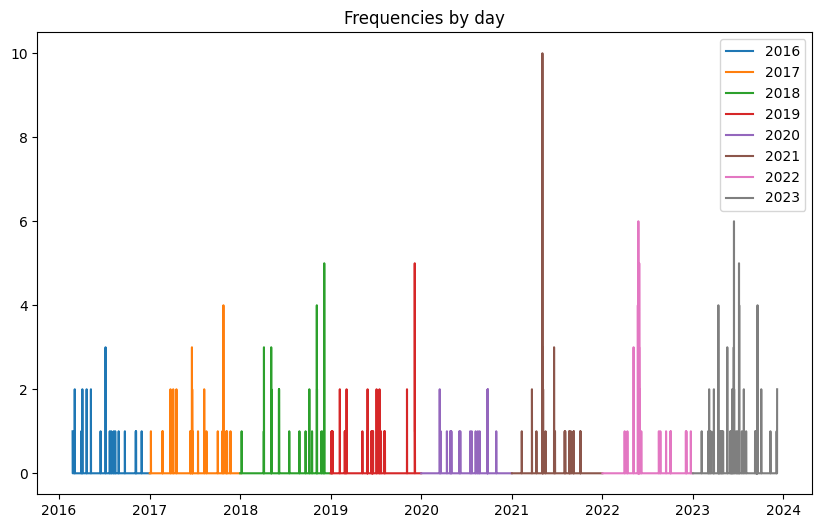

In [ ]:
# Define a function to format the y-axis labels
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

# Plot the data
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
    data = vPd[vPd['Datetime'].dt.year == year]
    plt.plot(data['Datetime'], data['count'], label=year)

plt.title('Frequencies by day')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))
plt.legend()
plt.show()


Frequencies of the records by month.

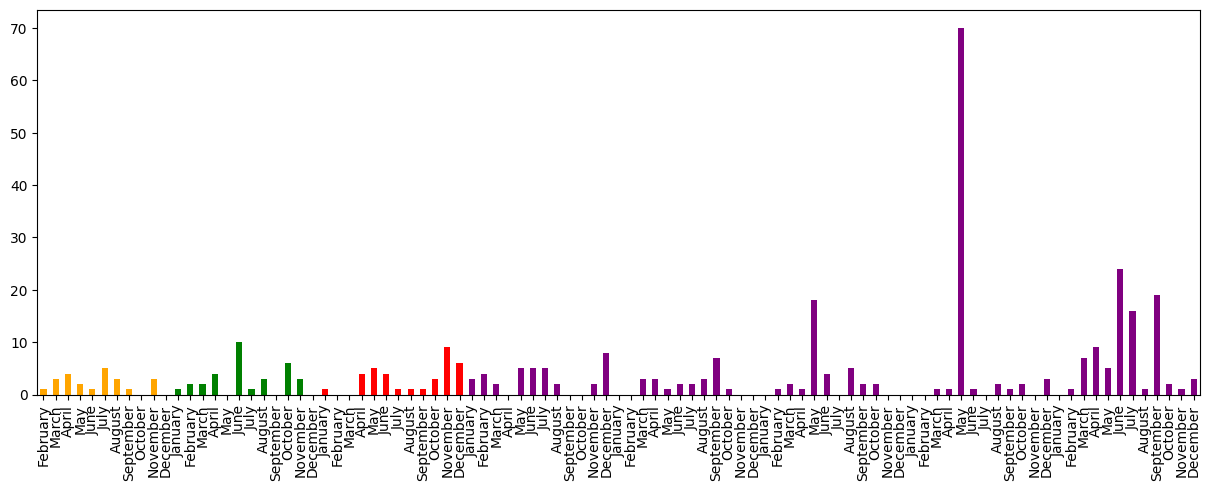

In [ ]:
# Define a function to assign a color to each year
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPm.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


Frecuencies of the records by month.

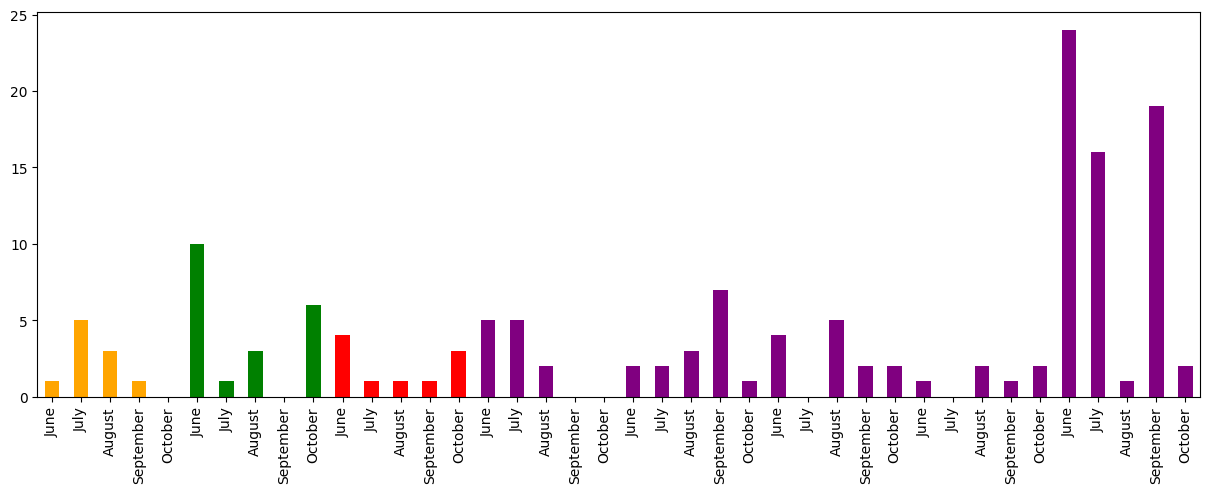

In [ ]:
# Filter the data to include only the months from June to October
vPmPrincipal = vPm[(vPm["Datetime"].dt.month > 5) & (vPm["Datetime"].dt.month < 11)]

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPmPrincipal.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


# **Multi-faceted Data Analysis and Visualization of Fire Incidents and Environmental Factors**

Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install numpy

In [ ]:
pip install scipy

It loads a different dataset, this one would be used to know more deeper how other variables can affect the wildfires.

In [ ]:

file_path = 'DataSet22.csv'
df = pd.read_csv(file_path)

df


Index  latitude  longitude  brightness  scan  track satellite instrument  \
0        1  30.83420 -110.85340      322.00  1.90   1.30      Aqua      MODIS   
1        2  31.25190 -110.96230      313.80  1.10   1.00     Terra      MODIS   
2        3  31.09720 -110.89650      325.50  1.40   1.20     Terra      MODIS   
3        4  31.09880 -110.91100      339.30  1.40   1.20     Terra      MODIS   
4        5  30.76560 -110.82550      301.60  1.00   1.00      Aqua      MODIS   
..     ...       ...        ...         ...   ...    ...       ...        ...   
347    348  30.81045 -110.98147      324.69  1.12   1.05      Aqua      MODIS   
348    349  30.86238 -110.95789      332.71  1.12   1.05      Aqua      MODIS   
349    350  30.87167 -110.95984      333.47  1.12   1.05      Aqua      MODIS   
350    351  30.87224 -110.97795      305.98  1.90   1.35     Terra      MODIS   
351    352  30.87553 -110.96106      307.48  1.89   1.34     Terra      MODIS   

     confidence version  ...  temperature  apparent_temperature heat_index  \
0            68    6.03  ...         15.6                  12.8       15.6   
1            32    6.03  ...         14.5                  15.2       14.5   
2            67    6.03  ...         25.3                  29.0       25.3   
3            86    6.03  ...         25.3                  29.0       25.3   
4            43    6.03  ...         12.6                  11.8       12.6   
..          ...     ...  ...          ...                   ...        ...   
347          11  6.1NRT  ...         28.3                  24.7       28.3   
348          74  6.1NRT  ...         28.3                  24.7       28.3   
349          56  6.1NRT  ...         28.3                  24.7       28.3   
350          66  6.1NRT  ...         18.1                  16.7       18.1   
351          72  6.1NRT  ...         18.1                  16.7       18.1   

    precipitation humidity wind_speed  solar_radiation  cloudiness  \
0             0.0     20.0        1.5              0.0         0.0   
1             0.0     27.2        5.0            340.4         0.3   
2             0.0      9.9        2.1            873.7         0.0   
3             0.0      9.9        2.1            873.7         0.0   
4             0.0     31.2        1.6             34.3         0.0   
..            ...      ...        ...              ...         ...   
347           0.0     22.6        4.2              0.0         0.0   
348           0.0     22.6        4.2              0.0         0.0   
349           0.0     22.6        4.2              0.0         0.0   
350           0.0     51.6        1.7              0.0         0.0   
351           0.0     51.6        1.7              0.0         0.0   

     wind_direction  Fire  
0             285.6     1  
1             234.2     1  
2             181.4     1  
3              81.6     1  
4             272.7     1  
..              ...   ...  
347           240.5     1  
348           240.5     1  
349           240.5     1  
350           156.5     1  
351           156.5     1  

[352 rows x 26 columns]

It obtains the number of columns in the dataframe

In [ ]:

num_columns = df.shape[1]

num_columns


26

Read only the specified columns from the CSV file

In [ ]:
# Read only the specified columns from the CSV file
# frp, fire radiation power
desired_columns = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hour',
                   'date','temperature', 'apparent_temperature', 'heat_index', 'precipitation', 'humidity',
                   'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction', 'Fire']

# Load only the desired columns from the new dataset
filtered_df = pd.read_csv('DataSet22.csv', usecols=desired_columns)  # Make sure to include the '.csv' extension

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_df.shape[0]

# Display the first rows of the filtered DataFrame and the number of rows
print(filtered_df.head())
print(f'The DataFrame has {num_rows_filtered} rows.')


   brightness  scan  track satellite  confidence   frp daynight      hour  \
0       322.0   1.9    1.3      Aqua          68  21.2        D  21:00:00   
1       313.8   1.1    1.0     Terra          32   5.8        D  18:00:00   
2       325.5   1.4    1.2     Terra          67  17.3        D  17:00:00   
3       339.3   1.4    1.2     Terra          86  46.8        D  17:00:00   
4       301.6   1.0    1.0      Aqua          43   7.8        N  09:00:00   

         date  temperature  apparent_temperature  heat_index  precipitation  \
0  24/02/2016         15.6                  12.8        15.6            0.0   
1  30/03/2016         14.5                  15.2        14.5            0.0   
2  03/04/2016         25.3                  29.0        25.3            0.0   
3  03/04/2016         25.3                  29.0        25.3            0.0   
4  04/04/2016         12.6                  11.8        12.6            0.0   

   humidity  wind_speed  solar_radiation  cloudiness  wind_dir

It print the head of the dataset.

In [ ]:
df.head()

Index  latitude  longitude  brightness  scan  track satellite instrument  \
0      1   30.8342  -110.8534       322.0   1.9    1.3      Aqua      MODIS   
1      2   31.2519  -110.9623       313.8   1.1    1.0     Terra      MODIS   
2      3   31.0972  -110.8965       325.5   1.4    1.2     Terra      MODIS   
3      4   31.0988  -110.9110       339.3   1.4    1.2     Terra      MODIS   
4      5   30.7656  -110.8255       301.6   1.0    1.0      Aqua      MODIS   

   confidence version  ...  temperature  apparent_temperature heat_index  \
0          68    6.03  ...         15.6                  12.8       15.6   
1          32    6.03  ...         14.5                  15.2       14.5   
2          67    6.03  ...         25.3                  29.0       25.3   
3          86    6.03  ...         25.3                  29.0       25.3   
4          43    6.03  ...         12.6                  11.8       12.6   

  precipitation humidity wind_speed  solar_radiation  cloudiness  \
0           0.0     20.0        1.5              0.0         0.0   
1           0.0     27.2        5.0            340.4         0.3   
2           0.0      9.9        2.1            873.7         0.0   
3           0.0      9.9        2.1            873.7         0.0   
4           0.0     31.2        1.6             34.3         0.0   

   wind_direction  Fire  
0           285.6     1  
1           234.2     1  
2           181.4     1  
3            81.6     1  
4           272.7     1  

[5 rows x 26 columns]

1. Fire-related factors: 'brightness' and 'frp' (fire radiative power) are strongly correlated. This suggests that these two factors could be good indicators for evaluating the intensity of a fire.

2. Atmospheric Conditions: Variables such as 'temperature', 'apparent_temperature' and 'heat_index' are moderately correlated with each other. This indicates that these variables tend to increase or decrease together, which makes sense since they are all related to the temperature of the environment.

3. Wind and Cloudiness: There is a negative correlation between 'wind_speed' and 'cloudiness'. Although the correlation is not strong, it could suggest that windier days tend to be less cloudy, or vice versa.

4. Fire Indicator: Surprisingly, the 'Fire' variable does not show a strong correlation with any of the other variables in the data set. This could mean that the presence of a fire is not easily predictable from these variables alone. It might be useful to explore more variables or factors that might be more closely related to fire occurrence.

5. Day and Night: The 'daynight' variable also does not show strong correlations, which could indicate that the time of day (day or night) does not have a significant impact on the other variables considered.

6. Lack of Strong Negative Correlations: There are no strong negative correlations in the matrix, suggesting that there are no variables acting as clear "antagonists" to each other in this data set.

<ipython-input-16-4a1dfd4a61fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df['daynight'] = correlation_df['daynight'].apply(lambda x: 1 if x == 'D' else 0)
<ipython-input-16-4a1dfd4a61fc>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


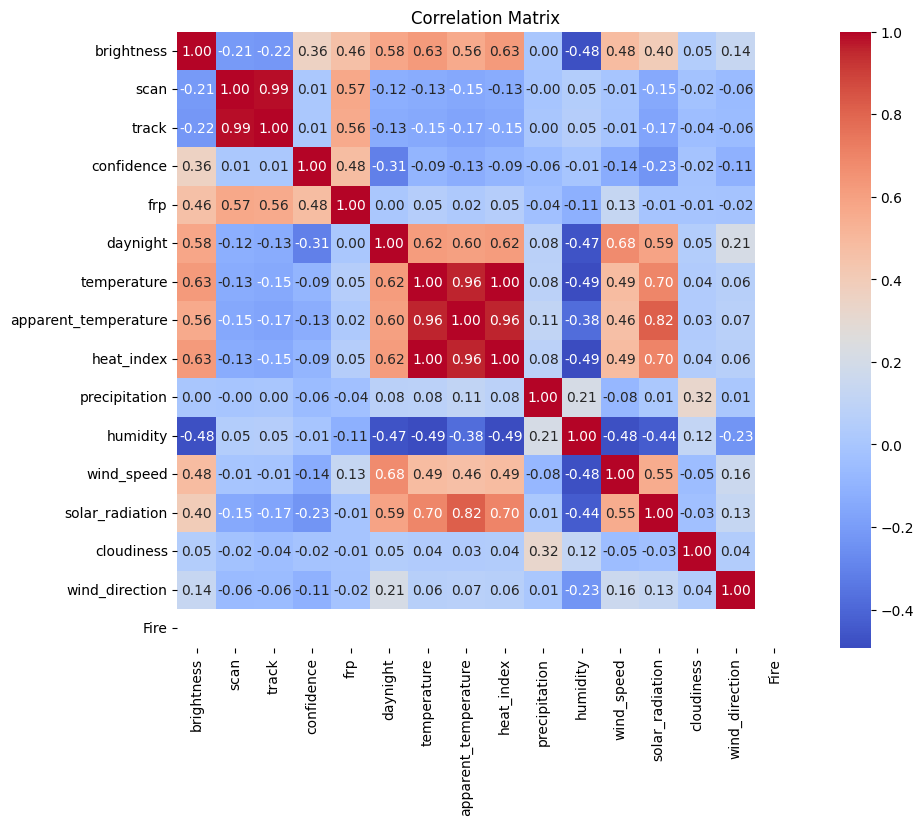

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Read the DataFrame from the CSV file
df = pd.read_csv('DataSet22.csv')

# Select the desired columns
selected_columns = ['brightness', 'scan', 'track', 'satellite', 'confidence','frp','daynight','hour',
                   'date','temperature', 'apparent_temperature', 'heat_index', 'precipitation', 'humidity',
                   'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction', 'Fire']

# Filter the DataFrame to only include the selected columns
correlation_df = df[selected_columns]

# Convert the 'daynight' column to a numeric variable (D = 1, N = 0)
correlation_df['daynight'] = correlation_df['daynight'].apply(lambda x: 1 if x == 'D' else 0)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create the visual correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



**Observations:**


1.   Brightness: The matrix shows a variation of colors, indicating that there are a variety of values ​​for brightness. This could suggest different levels of intensity in the observed fires.

2.   Scan and Track: These matrices show less variation in colors, which could suggest that the 'Scan' and 'Track' variables do not vary significantly in the data set.

3. Confidence: There is notable variation in colors, indicating different levels of confidence in fire detection.

4. FRP (Fire Radiative Power): Similar to 'Brightness', there is a variation in colors, suggesting different levels of fire intensity.

5. Daynight: The matrix shows a significant presence of a single color, which could mean that the majority of the data falls into one category (Day or Night).

6. Temperature: There is considerable variation in colors, suggesting that temperature could vary significantly at different fires or times.



**Conclusions:**


*   Variables such as 'Brightness' and 'FRP' could be good indicators of fire
*   intensity, as they show a wide range of values.
'Scan' and 'Track' might not be very useful in differentiating between different fires, as their values ​​do not show much variation.
*   'Confidence' and 'Temperature' could also be important variables to consider, as they show significant variation in their values.






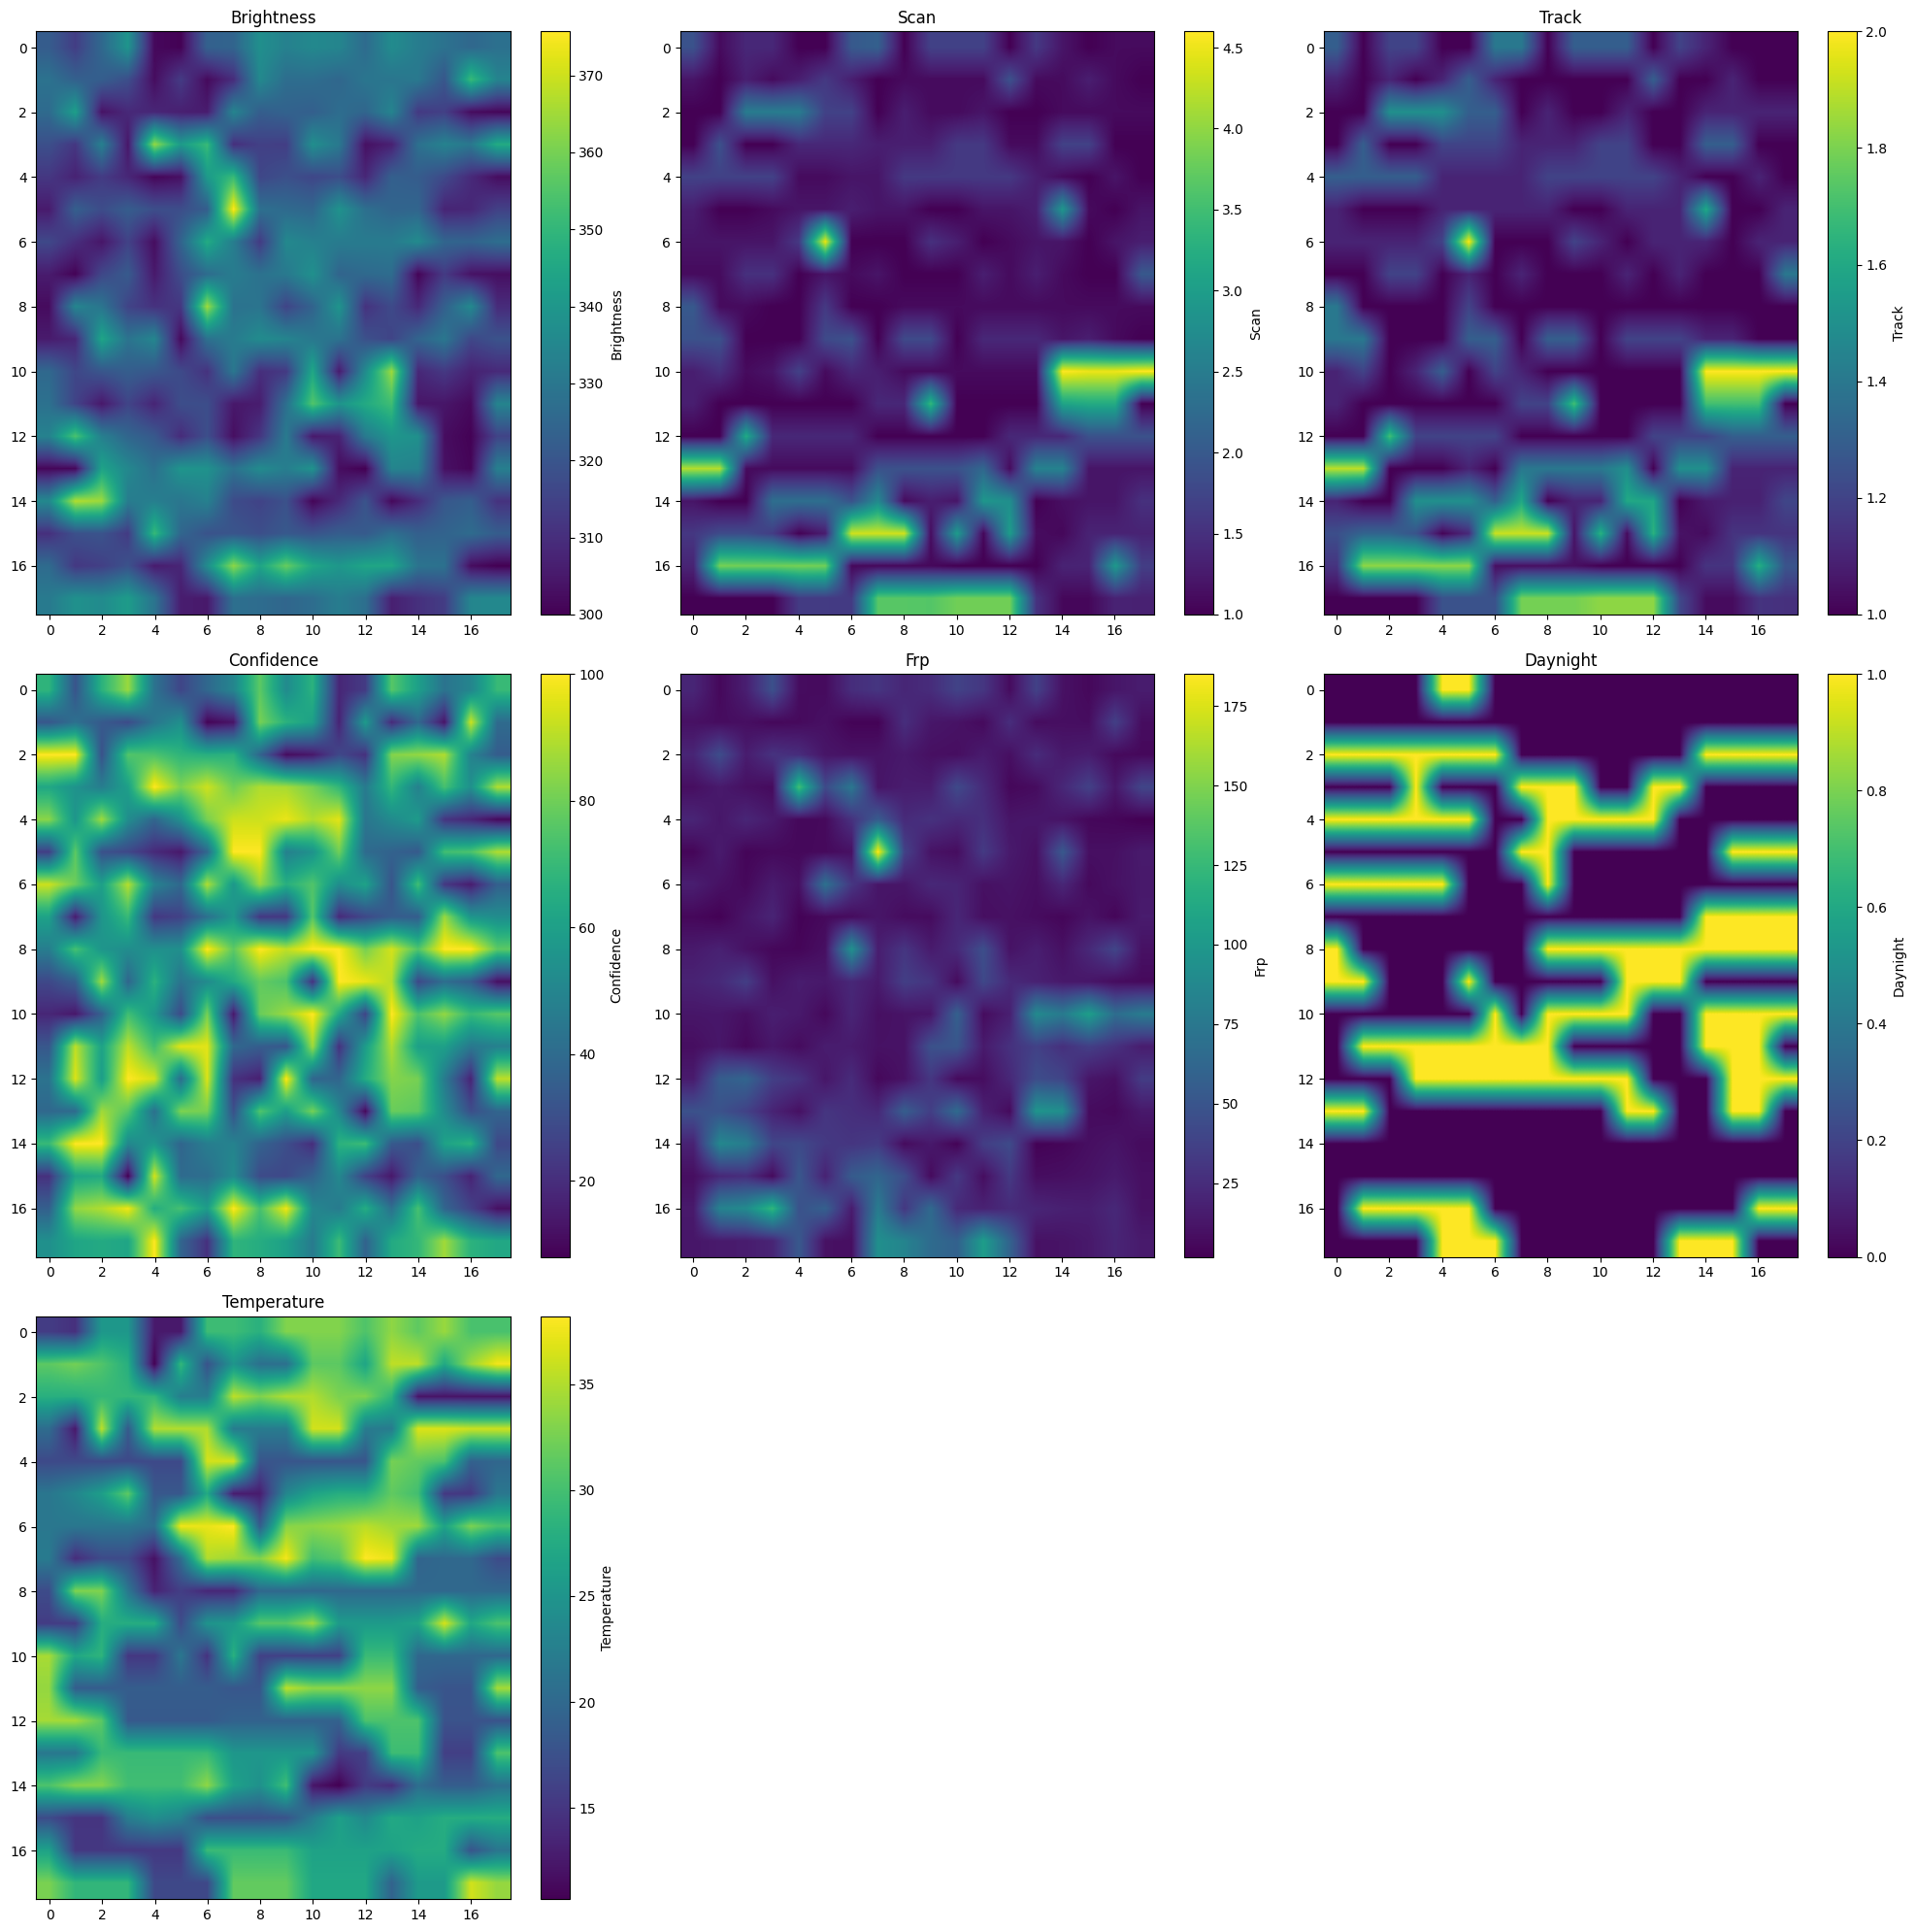

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

# Define the columns to plot
columns_to_plot = ['brightness', 'scan', 'track', 'confidence', 'frp', 'daynight', 'temperature']

# Function to prepare data and create 18x18 matrix
def prepare_matrix(column_name, dim=18):
    column_data = df[column_name].dropna()
    if column_name in ['daynight']:  # Encoding the categorical column
        label_encoder = LabelEncoder()
        column_data = label_encoder.fit_transform(column_data)
    if isinstance(column_data, pd.Series):
        column_data = column_data.to_numpy()
    # Ensure that we have enough data to fill an 18x18 matrix, if not, pad with NaN
    required_elements = dim * dim
    if len(column_data) < required_elements:
        padding_count = required_elements - len(column_data)
        column_data = np.concatenate([column_data, np.full(padding_count, np.nan)])
    matrix = column_data[:required_elements].reshape(dim, dim)
    return matrix

# Read in the dataset
df = pd.read_csv('DataSet22.csv')

# Prepare 18x18 matrices and store them in the dictionary
matrices_dict = {}
for col in columns_to_plot:
    matrices_dict[col.capitalize()] = prepare_matrix(col)

# Plotting
plt.figure(figsize=(20, 20))
for i, (title, matrix) in enumerate(matrices_dict.items()):
    plt.subplot(3, 3, i + 1)  # Grid size is 3x3 to accommodate 7 plots
    plt.imshow(matrix, cmap='viridis', interpolation='bilinear', aspect='auto')
    plt.colorbar(label=title)
    plt.title(title)

plt.tight_layout()
plt.show()



**Observations:**

1. Apparent Temperature and Heat Index: Both matrices show a diversity of colors, suggesting variation in these climate-related factors.
2. Precipitation: The matrix displays predominantly a single color, which could indicate that precipitation is generally low or absent in the data collected.
3. Humidity: There is considerable variation in colors, suggesting that humidity varies in different situations.
4. Wind Speed: The variation in colors indicates a diversity in wind speed, which could be a relevant factor in the spread of fires.
5. Solar Radiation and Cloudiness: Both matrices show a diversity of colors, which suggests variations in climatic conditions.
6. Wind Direction: The matrix shows a variation of colors, suggesting that the wind direction varies significantly.

**Conclusions:**


*   Variables such as 'Apparent Temperature', 'Heat Index' and 'Humidity' could offer valuable information about atmospheric conditions during a fire.
*   'Wind Speed' and 'Wind Direction' could also be critical variables in understanding how a fire spreads.
*   'Precipitation' might not be a significant factor in this data set, possibly because fires are more likely under conditions of little or no rainfall.









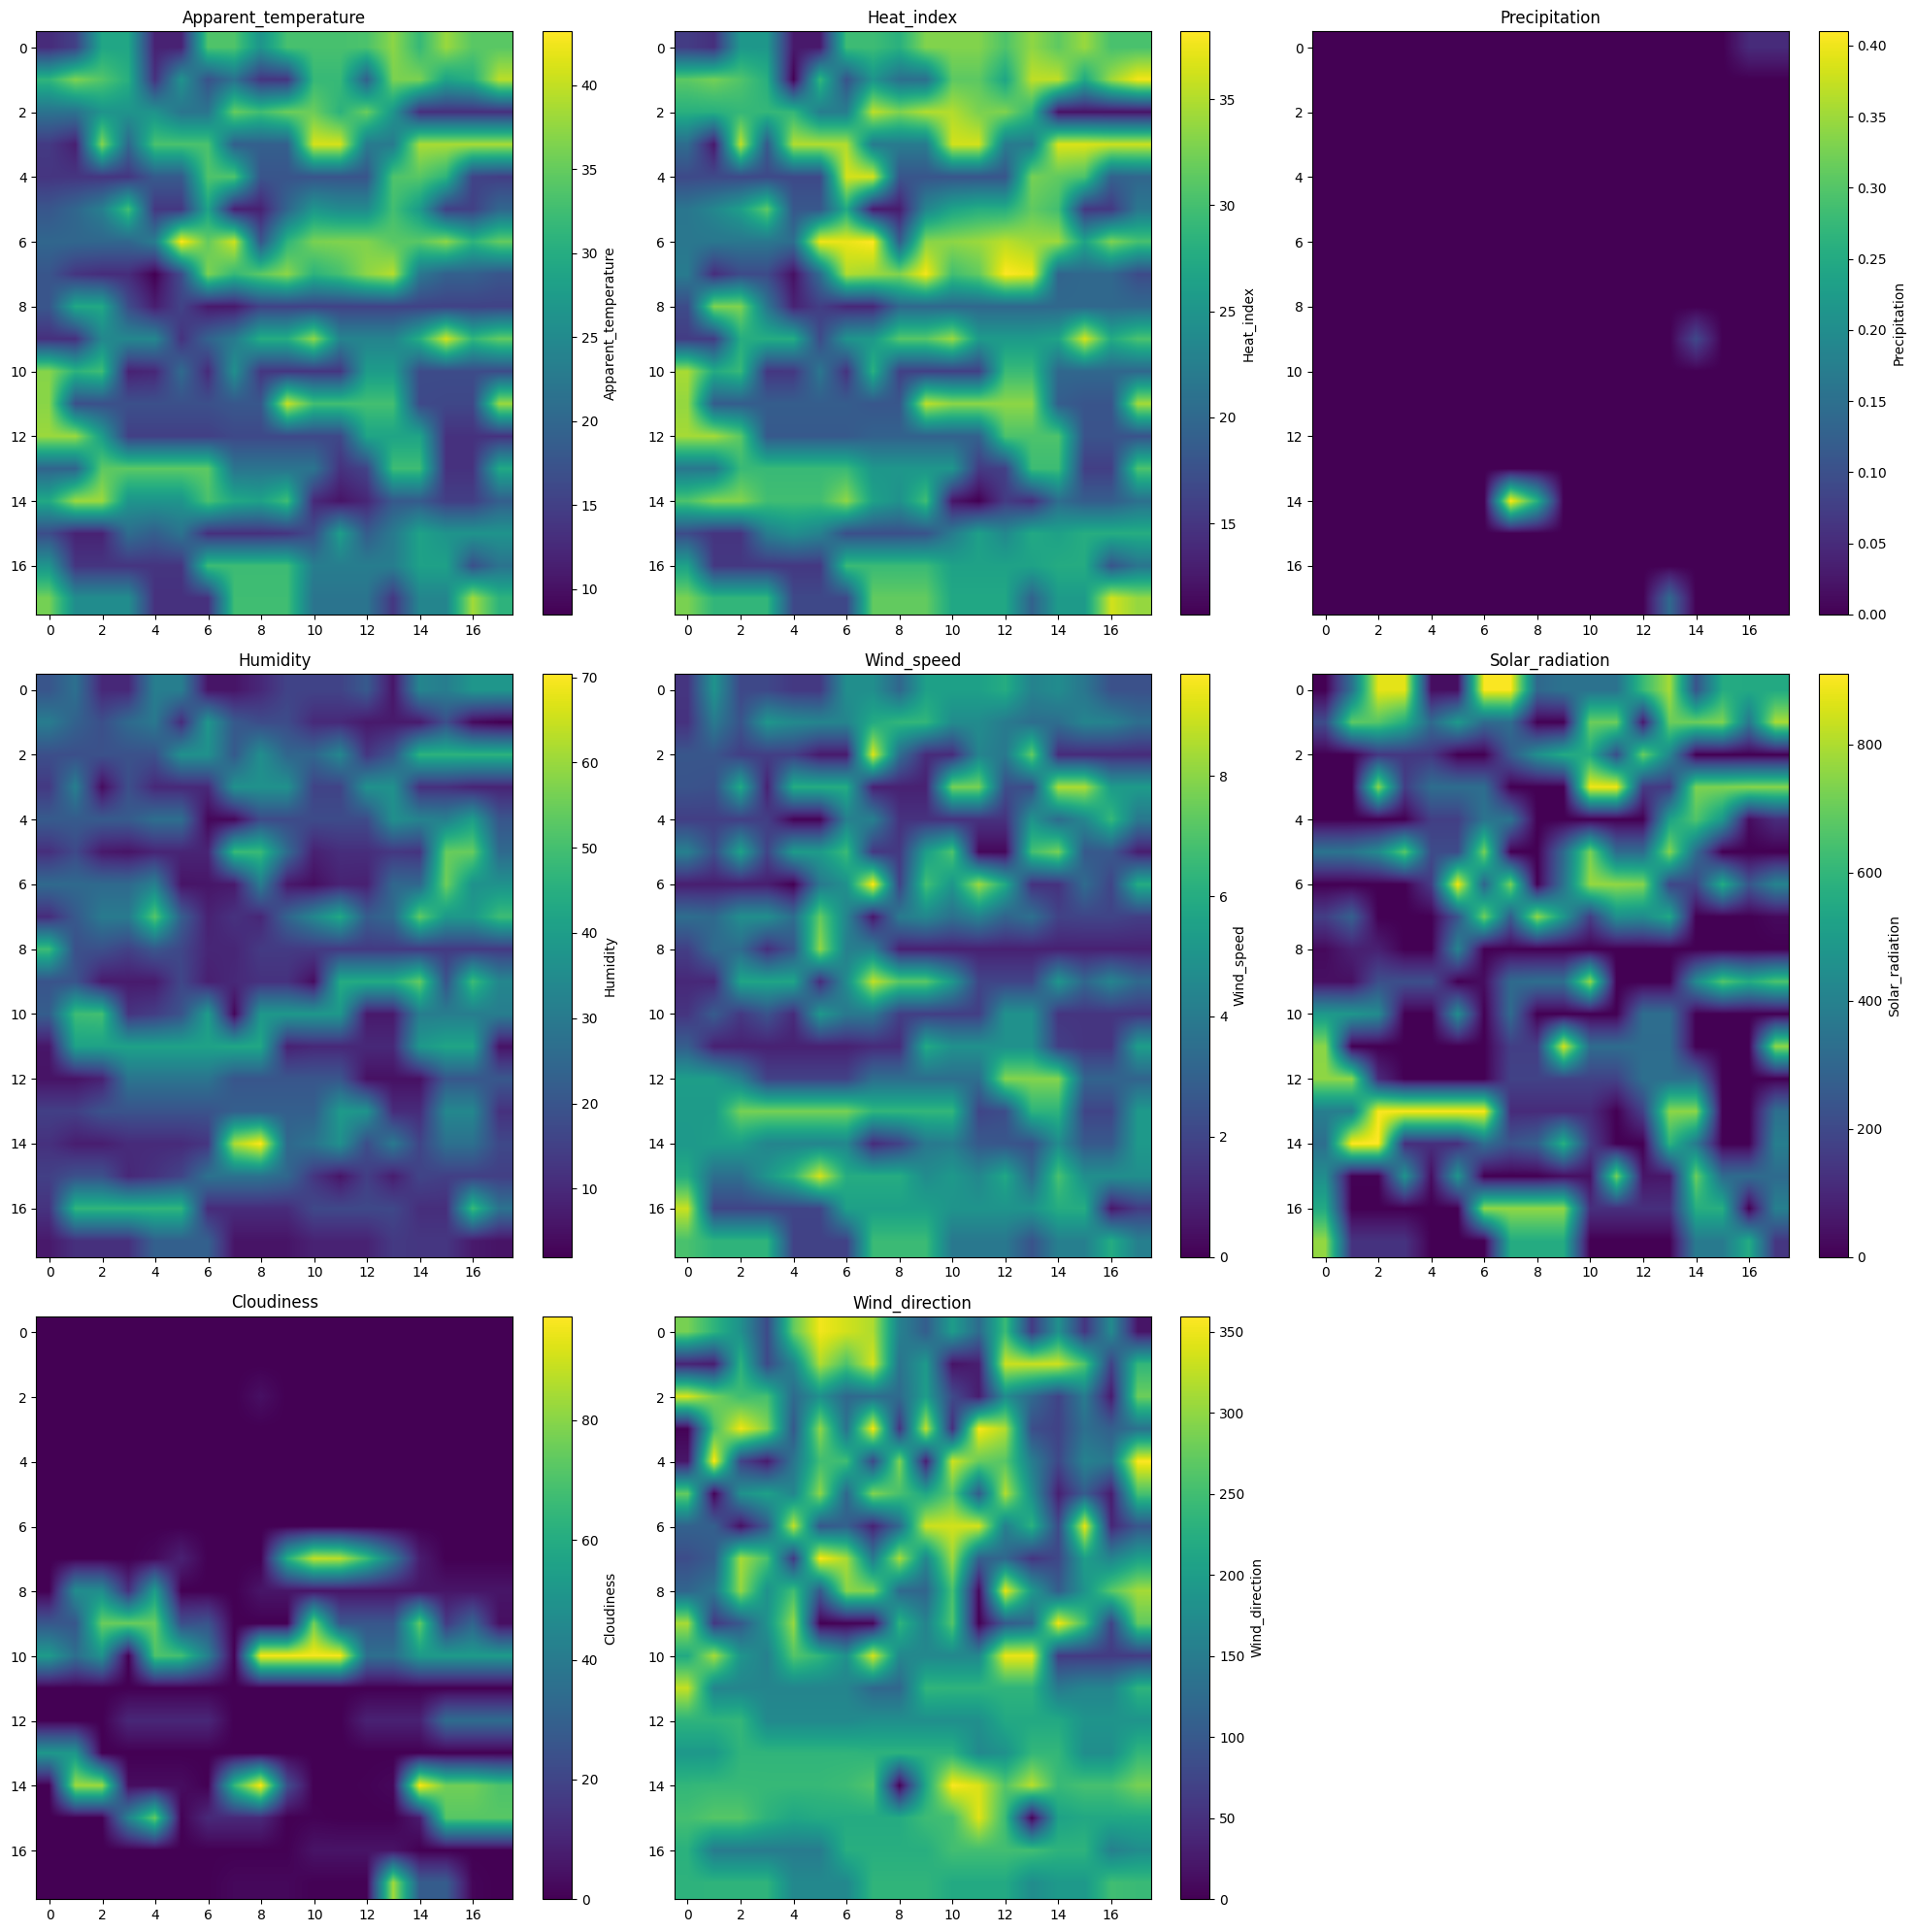

In [ ]:
# Define the columns to plot for the second grid
columns_to_plot_second_grid = ['apparent_temperature', 'heat_index', 'precipitation',
                               'humidity', 'wind_speed', 'solar_radiation', 'cloudiness', 'wind_direction']

# Prepare 18x18 matrices for the second grid and store them in a new dictionary
matrices_dict_second_grid = {}
for col in columns_to_plot_second_grid:
    matrices_dict_second_grid[col.capitalize()] = prepare_matrix(col)

# Plotting the second grid
plt.figure(figsize=(20, 20))
for i, (title, matrix) in enumerate(matrices_dict_second_grid.items()):
    plt.subplot(3, 3, i + 1)  # Grid size is 3x3 to accommodate 8 plots
    plt.imshow(matrix, cmap='viridis', interpolation='bilinear', aspect='auto')
    plt.colorbar(label=title)
    plt.title(title)

plt.tight_layout()
plt.show()


The bar graph above shows the frequency of data points specifically for the Aqua and Terra satellites in the original dataset. This gives us a focused view on how many data points are attributed to each of these two satellites.

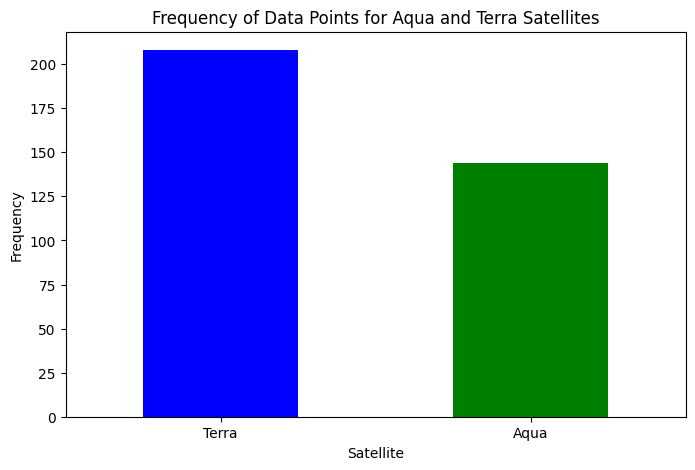

In [ ]:
# Filter the data to include only 'Aqua' and 'Terra' in the 'satellite' column
filtered_satellite_data = df[df['satellite'].isin(['Aqua', 'Terra'])]

# Check the frequency of 'Aqua' and 'Terra'
filtered_satellite_frequency = filtered_satellite_data['satellite'].value_counts()

# Plotting the frequency of 'Aqua' and 'Terra'
plt.figure(figsize=(8, 5))
filtered_satellite_frequency.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Satellite')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points for Aqua and Terra Satellites')
plt.xticks(rotation=0)
plt.show()


The bar graph above shows the frequency of data points for each hour in the dataset. This allows us to see how many data points are collected at different hours of the day thorught 2016 and 2023. This show us that most of the time wildfires present at 18:00 and 20:00.

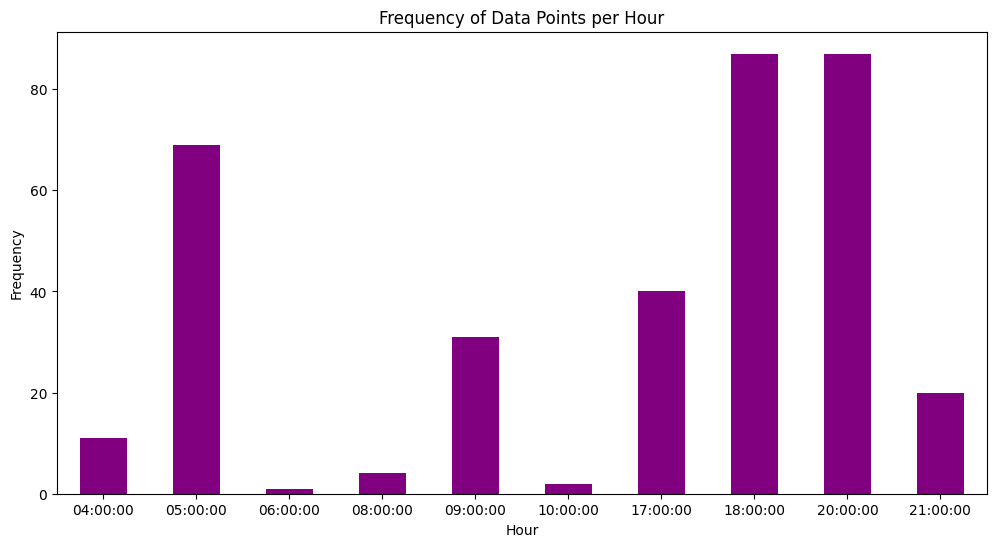

In [ ]:
# Since 'hout' exists in the new dataset, let's proceed to plot its frequency.
hora_frequency = df['hour'].value_counts().sort_index()

# Plotting the frequency of each unique value in the 'hora' column
plt.figure(figsize=(12, 6))
hora_frequency.plot(kind='bar', color='purple')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points per Hour')
plt.xticks(rotation=0)
plt.show()


The wind rose plot provides a visual summary of wind patterns, highlighting both the frequency and direction of wind occurrences. In this specific plot, the length or density of each "petal" points to how often the wind blows from a particular cardinal direction, such as North or South. By identifying the longest or densest petals, we can discern the dominant wind directions, offering valuable insights for applications like renewable energy sourcing, aviation, or agriculture. Short or sparse petals indicate directions from which the wind rarely comes, helping to identify any directional biases or gaps in wind activity.

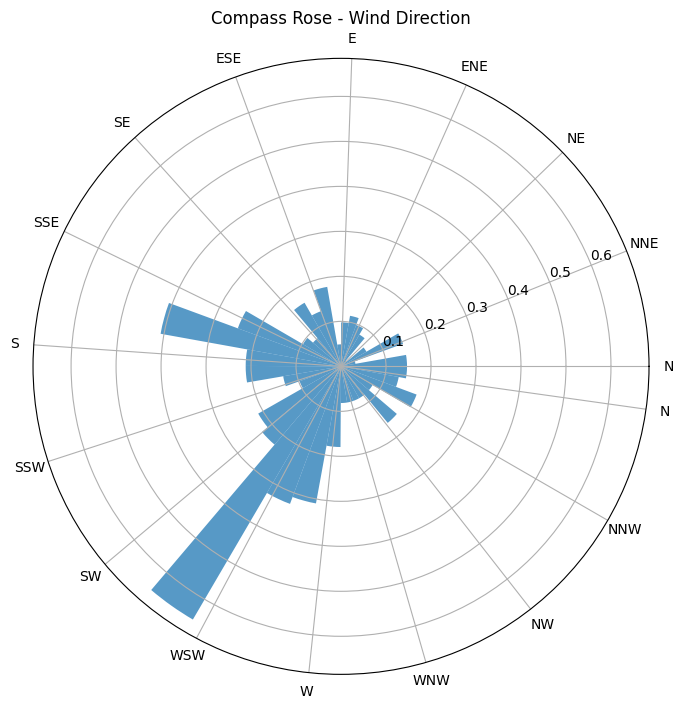

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'wind_direction' column
wind_direction_data = filtered_df['wind_direction']

# Filter out non-null values and convert to numbers
wind_direction_data = wind_direction_data.dropna()
wind_direction_degrees = pd.to_numeric(wind_direction_data, errors='coerce')
wind_direction_degrees = wind_direction_degrees.dropna()

# Convert wind direction to radians
wind_direction_rad = np.radians(wind_direction_degrees)

# Create a wind rose plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Create a histogram of wind direction
n, bins, patches = plt.hist(wind_direction_rad, bins=36, density=True, alpha=0.75)

# Add labels to sectors
direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW', 'N']
ax.set_xticks(np.radians(range(0, 360, 360 // len(direction_labels) + 1)))  # +1 to match the number of labels and sectors
ax.set_xticklabels(direction_labels)

# Add a title
plt.title('Compass Rose - Wind Direction')

# Display the plot
plt.show()


**Observations:**

1. Brightness: When stratified by 'satellite' and 'daynight', differences in brightness distribution can be observed. There is also variability across different hours ('hour').

2. Scan and Track: The boxplots for these variables show that there is less variability in their values ​​compared to other variables.

3. Confidence: There is notable variability in confidence values, which could suggest different levels of certainty in fire detection.

4. FRP (Fire Radiative Power): This boxplot shows a distribution with several outliers, which could indicate high intensity fire events.

5. Temperature and Related Variables: 'Temperature', 'Apparent Temperature' and 'Heat Index' have similar distributions, which is expected.

6. Climate Variables: 'Precipitation', 'Humidity', 'Wind Speed', etc., also show significant variability that could influence the spread of fires.

**Conclusions:**

*   Variables such as 'Brightness' and 'FRP' could be good indicators of fire intensity, as evidenced by the variability of their distributions.
*   'Confidence' could also be an important variable to consider when evaluating fire detection.
*   Climatic and atmospheric variables such as 'Temperature', 'Humidity' and 'Wind Speed' can also play a significant role in the spread of fires.








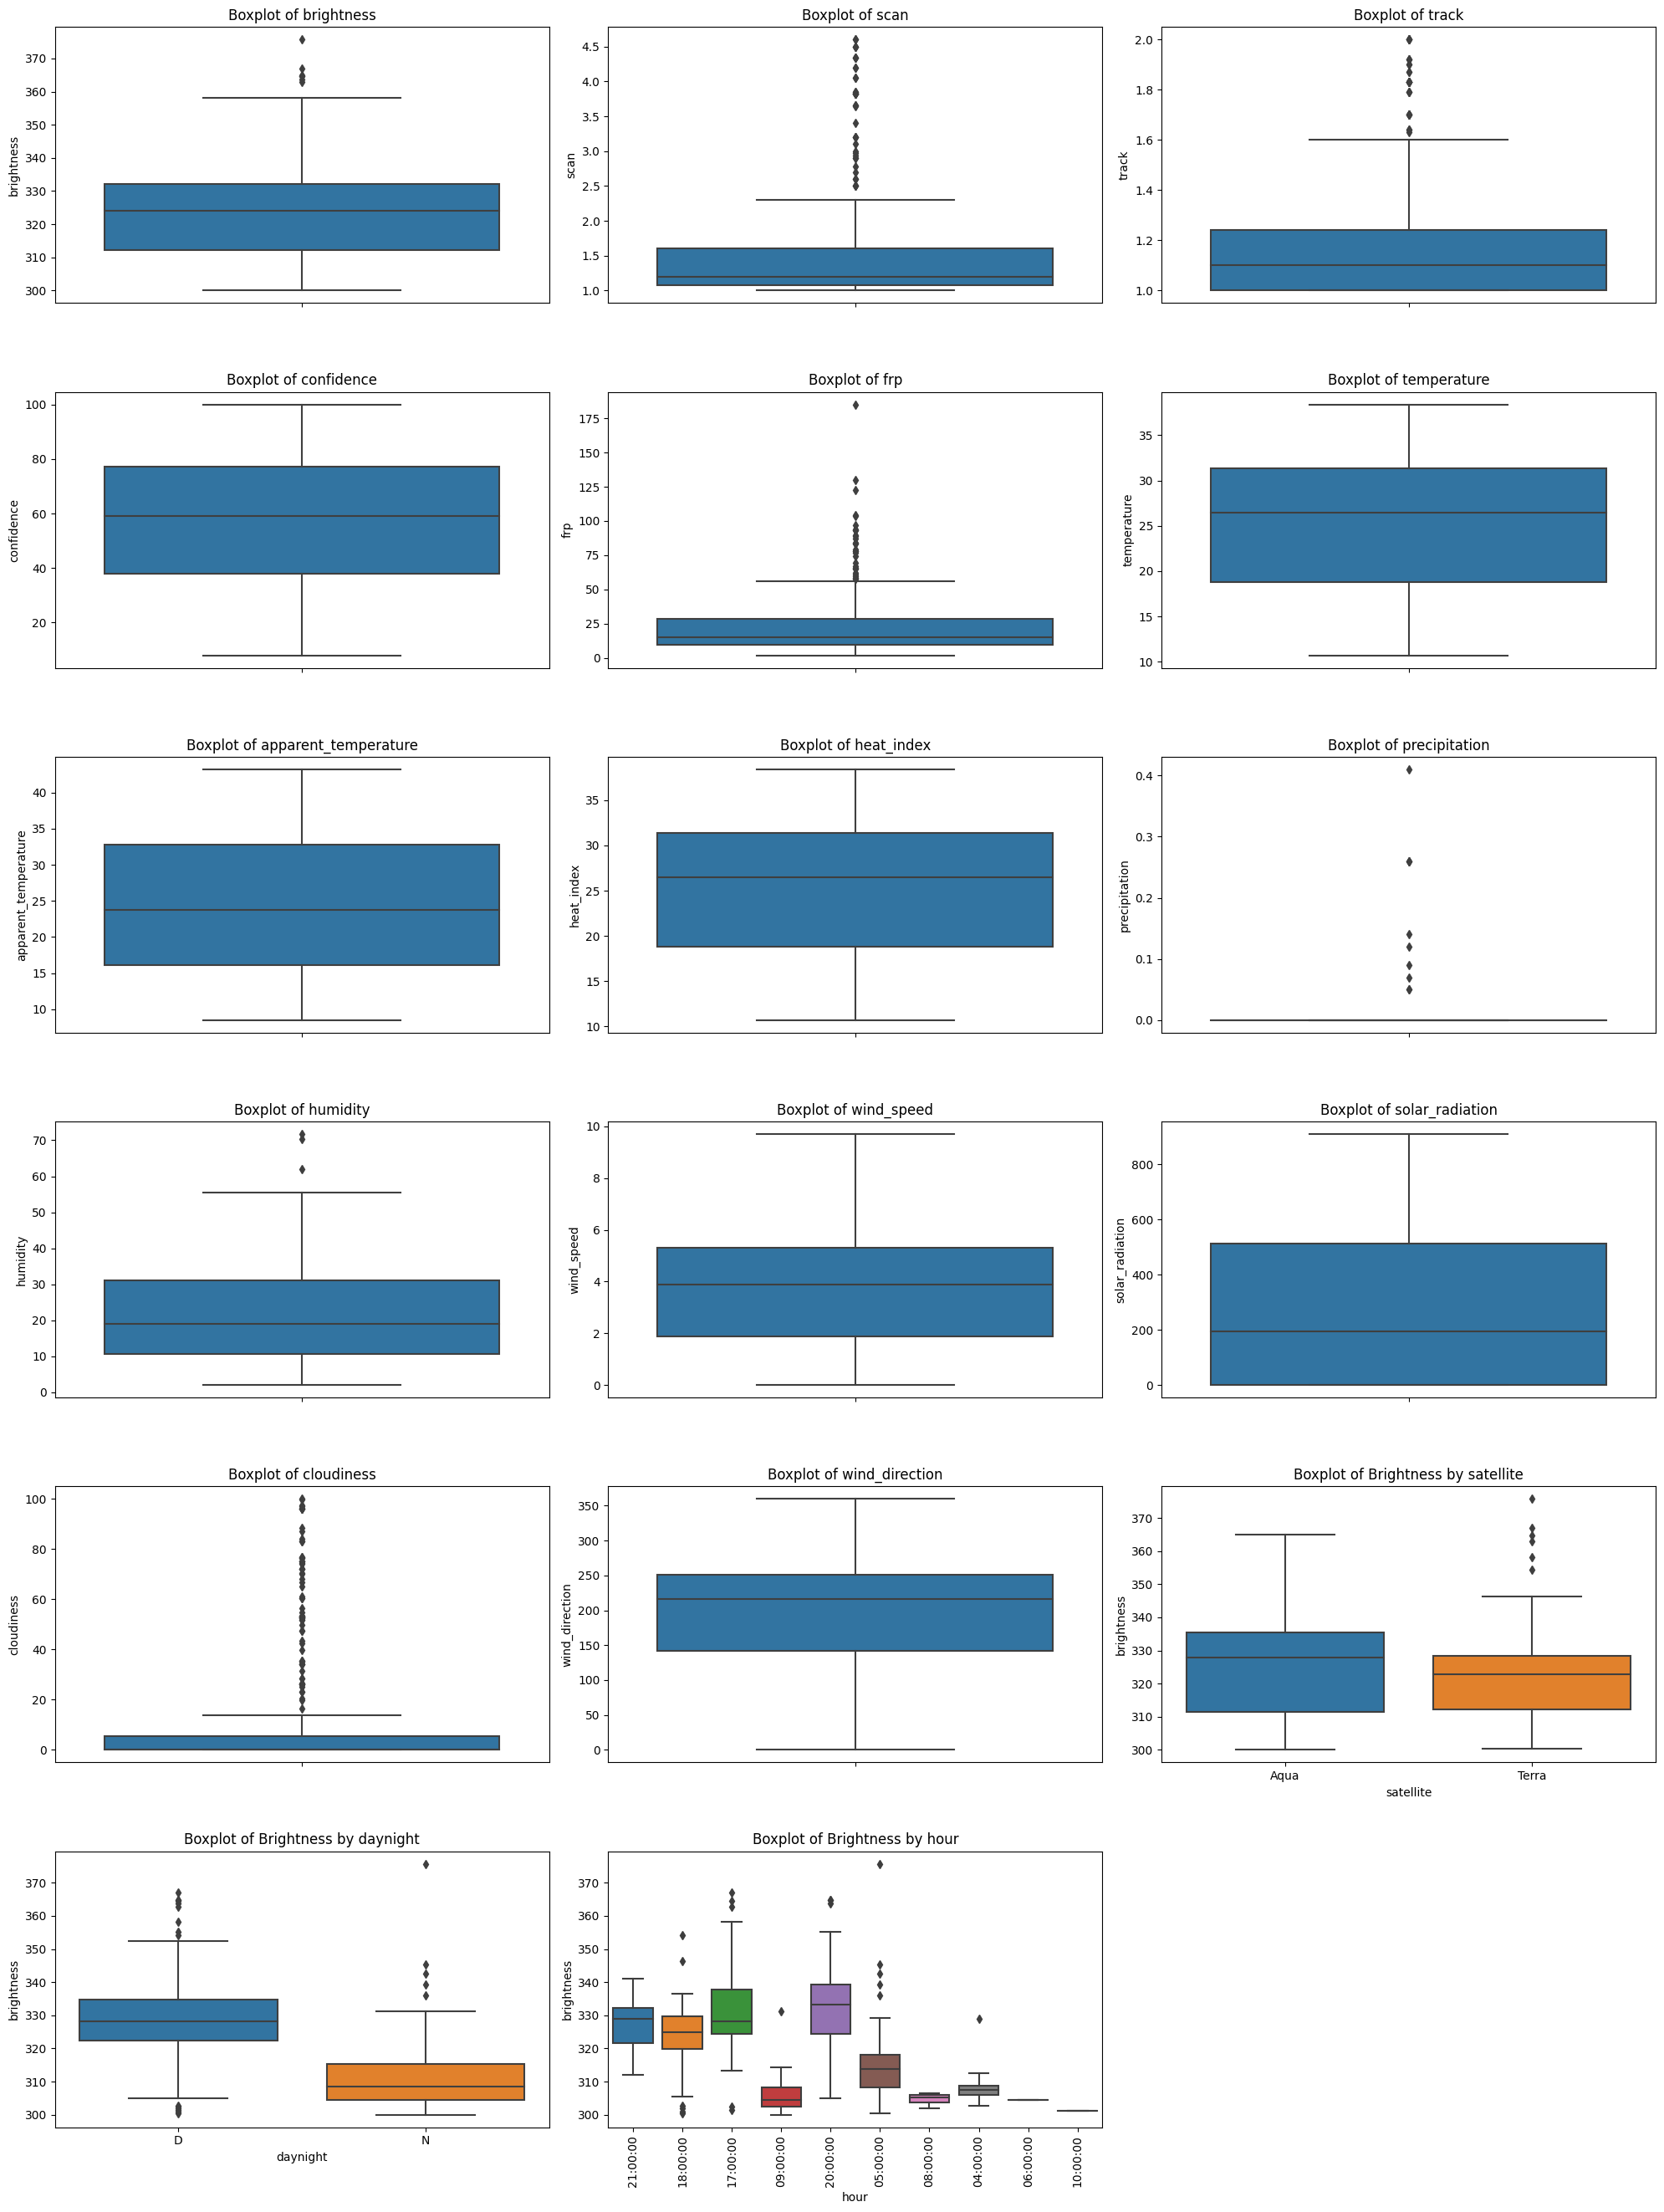

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# Remove 'Incendio' from the list of selected columns, if it exists
if 'Fire' in selected_columns:
    selected_columns.remove('Fire')

# Filter the dataset to include only the selected columns and make an explicit copy
filtered_data_for_boxplot = df[selected_columns].copy()

# For categorical columns like 'satellite' and 'daynight', convert them to category type for better boxplot visualization
categorical_columns = ['satellite', 'daynight']
filtered_data_for_boxplot[categorical_columns] = filtered_data_for_boxplot[categorical_columns].astype('category')

# Re-define the list of numeric columns based on the filtered dataset
numeric_columns = filtered_data_for_boxplot.select_dtypes(include=[np.number]).columns.tolist()

# Define the categorical columns for boxplot
categorical_columns_for_boxplot = ['satellite', 'daynight', 'hour']  # Add or remove columns as needed

# Create vertical boxplots in a grid for the numeric and selected categorical columns
plt.figure(figsize=(20, 30))
for i, column in enumerate(numeric_columns + categorical_columns_for_boxplot, 1):
    plt.subplot(7, 3, i)  # Adjusted the grid size to fit the additional plots
    if column in categorical_columns_for_boxplot:
        sns.boxplot(x=column, y='brightness', data=filtered_data_for_boxplot)
        plt.title(f'Boxplot of Brightness by {column}')
        if column == 'hour':  # Rotate x-axis labels for better visibility
            plt.xticks(rotation=90)
    else:
        sns.boxplot(y=filtered_data_for_boxplot[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()




# **Spatiotemporal Analysis and Visualization of Fire Incidents**

This script focuses on analyzing and filtering a set of fire-related data. In here we resample the data at 6-hour intervals, and calculate aggregate metrics like mean and sum for certain columns. It then creates an auxiliary column to mark the continued presence of fire, identified by at least four consecutive '1s', and filters the DataFrame based on this criteria. Finally, the data set is sorted by the date and time column and duplicate rows are removed, leaving a data set focused on significant and sustained fire events.

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime']).rename({'Fire ': 'Fire'}, axis=1)

# Resample the DataFrame by 6-hour intervals and calculate the mean for each interval
agg_dict = {
    'Unnamed: 0': 'mean',
    'brightness': 'mean',
    'confidence': 'mean',
    'Fire': 'sum',
    'latitude': 'mean',
    'longitude': 'mean'
}

df = df.set_index('Datetime').resample('6H').agg(agg_dict).reset_index().sort_values('Datetime').drop_duplicates()


df['helper_Fire'] = df['Fire']
df['helper_Fire'] = df['helper_Fire'].fillna(0)
df['helper_Fire'] = df['helper_Fire'] > 0
df['helper_Fire'] = df['helper_Fire'].astype(int)



def get_consecutive_ones_indices(series):
    indices = []
    count = 0
    for i, value in enumerate(series):
        if value == 1:
            count += 1
            if count >= 4:
                indices.extend(range(i - count + 1, i + 1))
        else:
            count = 0  # Reset count on encountering a 0
    return indices


indices = get_consecutive_ones_indices(df['helper_Fire'])

df = df.iloc[indices].sort_values('Datetime').drop_duplicates()
df = df.set_index('Datetime').reset_index()


CPU times: user 79.9 ms, sys: 11 µs, total: 80 ms
Wall time: 114 ms


Calculate the minimum and maximum latitude and longitude

In [ ]:
from numpy.ma.core import product
# Calculate the minimum and maximum latitude and longitude
latMin = df["latitude"].min()
latMax = df["latitude"].max()
lonMin = df["longitude"].min()
lonMax = df["longitude"].max()

# Define the grid size in degrees
degrees = 0.05

print("Minimum latitude in the data: " + str(latMin))
print("Maximum latitude in the data: " + str(latMax))
print("Minimum longitude in the data: " + str(lonMin))
print("Maximum longitude in the data: " + str(lonMax))

degrees = 0.05  # grid size in degrees, 0.009 is approximately 1 km (1/111.1)
print("Resolution in degrees: " + str(degrees))

product([latMin, latMax], [lonMin, lonMax])


1. **Upper Left Corner (UL)**:
    - Latitude: 30.66197790921712∘ N
    - Longitude: −109.9774042164748∘ W
2. **Upper Right Corner (UR)**:
    - Latitude: 30.66197790921712∘ N
    - Longitude: −109.4014042164748∘ W
3. **Lower Left Corner (LL)**:
    - Latitude: 30.08597790921712∘ N
    - Longitude: -109.9774042164748∘ W
4. **Lower Right Corner (LR)**:
    - Latitude: 30.08597790921712∘ N
    - Longitude: −109.4014042164748∘ W



Minimum latitude in the data: 30.7387
Maximum latitude in the data: 31.3099
Minimum longitude in the data: -111.23656
Maximum longitude in the data: -110.6363
Resolution in degrees: 0.05


TypeError: ignored

Dimensions are calculated based on latitude and longitude

In [ ]:
import math

# Calculate the length of the grid in the y-axis (latitude)
yLen = math.ceil((latMax - latMin) / 0.045 + 1)

# Calculate the length of the grid in the x-axis (longitude)
xLen = math.ceil(abs((lonMin - lonMax) / 0.045 - 1))

(yLen, xLen)


(13, 8)

The X and Y grid coordinates are calculated for each data point and stored in new columns in the DataFrame. Columns X and Y have been converted to integers.

In [ ]:
# Calculate the grid coordinates for each data point and store them in new columns 'x' and 'y'
df["y"] = ((latMax - df["latitude"]) / degrees)
df["x"] = ((abs(lonMin - df["longitude"])) / degrees)

# Convert the 'x' and 'y' columns to integers
df = df.astype({'x': 'int', 'y': 'int'})

# Show the first few rows of the dataframe to confirm the new columns
df.head()


Datetime  Unnamed: 0  brightness  confidence  Fire  latitude  \
0 2019-12-06 00:00:00       109.0      312.08        82.2     5   30.9923   
1 2019-12-06 06:00:00       112.0      302.50        49.0     1   31.0057   
2 2019-12-06 12:00:00       113.0      324.20        39.0     1   31.0072   
3 2019-12-06 18:00:00       114.0      346.40        89.0     1   31.0022   
4 2022-05-25 18:00:00       198.0      328.20        33.0     1   31.2519   

   longitude  helper_Fire  y  x  
0 -111.01892            1  5  0  
1 -111.02540            1  4  0  
2 -111.02390            1  4  0  
3 -111.03290            1  4  0  
4 -110.96210            1  0  1

DataSet

In [ ]:
df

Datetime  Unnamed: 0  brightness  confidence  Fire   latitude  \
0  2019-12-06 00:00:00       109.0  312.080000   82.200000     5  30.992300   
1  2019-12-06 06:00:00       112.0  302.500000   49.000000     1  31.005700   
2  2019-12-06 12:00:00       113.0  324.200000   39.000000     1  31.007200   
3  2019-12-06 18:00:00       114.0  346.400000   89.000000     1  31.002200   
4  2022-05-25 18:00:00       198.0  328.200000   33.000000     1  31.251900   
5  2022-05-26 00:00:00       201.5  313.216667   84.500000     6  30.903533   
6  2022-05-26 06:00:00       205.5  305.400000   37.000000     2  30.906050   
7  2022-05-26 12:00:00       207.0  327.700000   33.000000     1  30.905700   
8  2022-05-26 18:00:00       209.5  348.275000   64.000000     4  30.903850   
9  2022-05-28 18:00:00       229.0  336.333333   76.333333     3  30.914100   
10 2022-05-29 00:00:00       232.0  306.100000   51.333333     3  30.913400   
11 2022-05-29 06:00:00       234.5  301.250000   39.500000     2  30.933350   
12 2022-05-29 12:00:00       238.0  336.980000   73.600000     5  30.914400   
13 2022-05-29 18:00:00       242.5  333.975000   61.500000     4  30.930450   
14 2022-05-30 00:00:00       245.0  302.700000   51.000000     1  30.933500   
15 2022-05-30 06:00:00       246.0  300.000000   10.000000     1  30.937500   
16 2023-06-14 00:00:00       304.0  302.550000   26.000000     1  30.747390   
17 2023-06-14 06:00:00       305.0  300.060000   12.000000     1  30.740830   
18 2023-06-14 12:00:00       306.0  330.880000   54.000000     1  30.754930   
19 2023-06-14 18:00:00       308.0  338.713333   62.666667     3  30.749807   
20 2023-06-15 00:00:00       311.0  313.410000   53.000000     3  30.755830   
21 2023-09-18 06:00:00       341.0  302.540000   38.000000     1  30.871940   
22 2023-09-18 12:00:00       343.5  328.237500   50.250000     4  30.862380   
23 2023-09-18 18:00:00       347.5  332.782500   55.500000     4  30.853597   
24 2023-09-19 00:00:00       350.5  306.730000   69.000000     2  30.873885   

     longitude  helper_Fire   y  x  
0  -111.018920            1   5  0  
1  -111.025400            1   4  0  
2  -111.023900            1   4  0  
3  -111.032900            1   4  0  
4  -110.962100            1   0  1  
5  -110.776600            1   6  5  
6  -110.771800            1   6  5  
7  -110.770900            1   6  5  
8  -110.783825            1   6  4  
9  -110.744633            1   6  5  
10 -110.757533            1   6  5  
11 -110.757800            1   6  5  
12 -110.743440            1   6  5  
13 -110.777025            1   6  5  
14 -110.772700            1   6  5  
15 -110.757200            1   6  5  
16 -110.770040            1  10  5  
17 -110.744210            1  10  5  
18 -110.764780            1   9  5  
19 -110.765137            1  10  5  
20 -110.736940            1   9  5  
21 -110.950500            1   7  1  
22 -110.953452            1   7  1  
23 -110.967480            1   7  1  
24 -110.969505            1   7  1

This code groups the data by both hour and day. This way, we can understand how many records we have in each time interval. vPh gives us the count per hour, and vPd gives us the count per day.

In [ ]:
# Group the records by hour and by day
vPh = df.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')



In [ ]:
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')



In [ ]:
# Show the first few rows of the dataframe grouped by hour to confirm its structure
vPh.head()

Datetime  count
0 2019-12-06 00:00:00      1
1 2019-12-06 01:00:00      0
2 2019-12-06 02:00:00      0
3 2019-12-06 03:00:00      0
4 2019-12-06 04:00:00      0

In [ ]:
vPh

Datetime  count
0     2019-12-06 00:00:00      1
1     2019-12-06 01:00:00      0
2     2019-12-06 02:00:00      0
3     2019-12-06 03:00:00      0
4     2019-12-06 04:00:00      0
...                   ...    ...
33188 2023-09-18 20:00:00      0
33189 2023-09-18 21:00:00      0
33190 2023-09-18 22:00:00      0
33191 2023-09-18 23:00:00      0
33192 2023-09-19 00:00:00      1

[33193 rows x 2 columns]

In [ ]:
vPd

Datetime  count
0    2019-12-06      4
1    2019-12-07      0
2    2019-12-08      0
3    2019-12-09      0
4    2019-12-10      0
...         ...    ...
1379 2023-09-15      0
1380 2023-09-16      0
1381 2023-09-17      0
1382 2023-09-18      3
1383 2023-09-19      1

[1384 rows x 2 columns]

This code displays the first rows of the valuesPerHour DataFrame, which contains the data grouped by time and X and Y coordinates. This gives us a quick view of what the data looks like after grouping, allowing us to confirm that the structure of the DataFrame is what we expect .

In [ ]:
# Group the records by hour, x, and y coordinates, then count the number of records for each group
valoresPorHora = df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')


In [ ]:
# Show the first few rows of the dataframe to confirm its structure
valoresPorHora.head()

Datetime  x  y  count
0 2019-12-06 00:00:00  0  5      1
1 2019-12-06 06:00:00  0  4      1
2 2019-12-06 12:00:00  0  4      1
3 2019-12-06 18:00:00  0  4      1
4 2022-05-25 18:00:00  1  0      1

This block of code creates a list of arrays, where each array represents data for a specific time from February 24, 2016 to January 6, 2023. Each array has dimensions based on the previously calculated X and Y lengths.

Within each matrix, the cell at position (y,x) shows the number of records at that specific location and for that specific time. For example, if there are 5 fires recorded at a specific location at 3 PM on a given day, then the matrix corresponding to that time will have a '5' in the cell representing that location.

Finally, the code displays the first generated array to verify that everything worked as expected.

In [ ]:
from datetime import datetime, timedelta
import numpy as np

# Initialize start and end times for the loop
start_time = datetime(2016, 2, 24, 21, 0)
end_time = datetime(2023, 9, 19, 4, 0)


# Initialize an empty list to store matrices
matrices = []

# Loop through each hour between start_time and end_time
while start_time < end_time:
    # Filter the DataFrame for records corresponding to the current hour
    temp = valoresPorHora[valoresPorHora["Datetime"] == start_time]

    # Initialize a zeros matrix of dimensions (yLen, xLen)
    a = np.zeros((yLen, xLen))

    # If there are records for the current hour, populate the matrix
    if len(temp) > 0:
        for index, row in temp.iterrows():
            a[row["y"], row["x"]] = row["count"]

    # Append the matrix to the list
    matrices.append(a)

    # Increment start_time by one hour
    start_time += timedelta(hours=1)

# Show the first matrix for verification
matrices[0] if matrices else "No matrices generated"


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

This code block calculates the total sum of values ​​contained in the matrices generated during the analysis. Each array represents the activity recorded at a specific time within a date range. The code loops through all the arrays, adds the values ​​in each one, and displays the total result.

In [ ]:
# Initialize an empty numpy array to store the values
valores = np.array([])

# Loop through each matrix in the 'matrices' list
for i in range(len(matrices)):
    # Calculate the sum of values in the current matrix and append it to 'valores'
    valores = np.append(valores, matrices[i].sum())

# Calculate the sum of all the values in 'valores'
total_sum = valores.sum()

# Display the total sum
total_sum


25.0

This block of code parses a list of values ​​and separates those that are equal to zero from those that are not. The indices of zero values ​​are stored in the zeroVal list, while the indices of non-zero values ​​are stored in the valIndex list. This allows you to identify and manage null or zero values ​​in the data.

In [ ]:
%%time
zeroVal = []
valIndex = []

# Loop through each value in 'valores'
for i in range(len(valores)):
    if valores[i] == 0:
        zeroVal.append(i)
    else:
        valIndex.append(i)


CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 20.9 ms


In this segment, the length of two lists is being calculated:

len(zeroVal) returns the number of elements in the zeroVal list. This list contains the indices of the values ​​in the original list that are equal to zero.

len(valIndex) returns the number of elements in the valIndex list. This list contains the indices of the values ​​in the original list that are not equal to zero.


In [ ]:
len(zeroVal)

66294

In [ ]:
len(valIndex)

25

Generate the heatmap with a custom color palette ranging from red to yellow

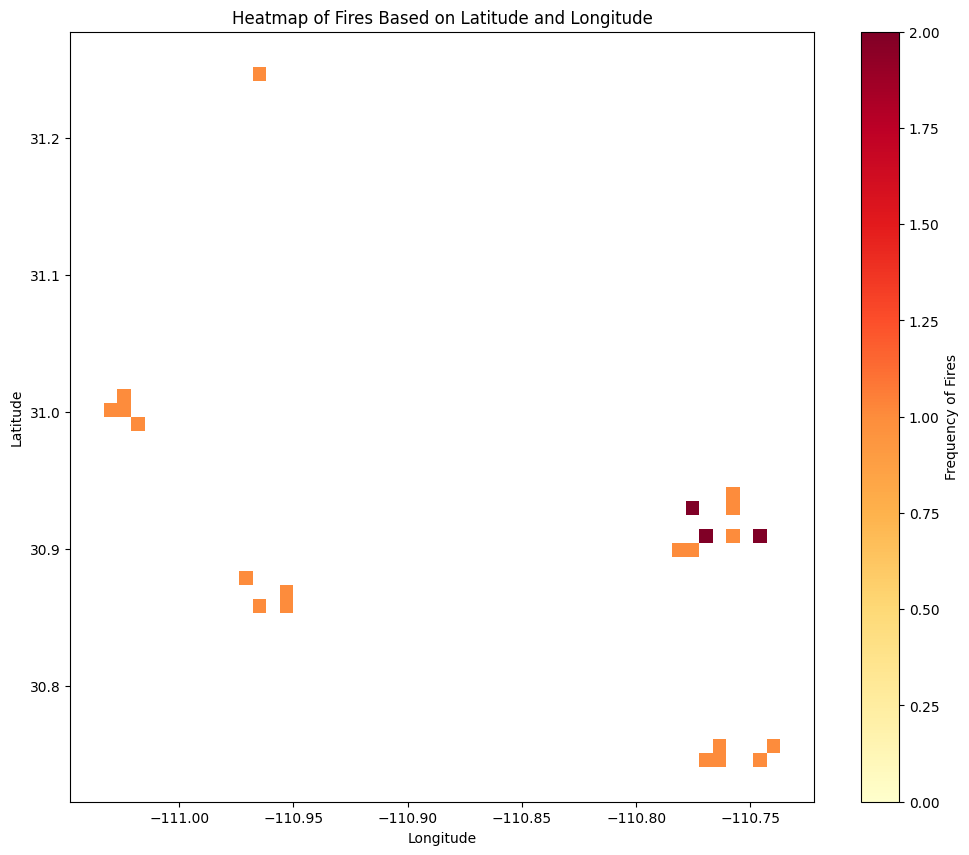

In [ ]:
# Generate the heatmap with a custom color palette ranging from red to yellow
plt.figure(figsize=(12, 10))
sns.histplot(df, x="longitude", y="latitude", bins=50, cmap="YlOrRd", cbar=True, cbar_kws={'label': 'Frequency of Fires'})
plt.title('Heatmap of Fires Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **Geotemporal Analysis and Visualization of Events in a Specific Area Over Time**


Libraries are imported

In [ ]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os, datetime
from shapely.geometry.polygon import Polygon, Point
from dateutil.rrule import rrule, MONTHLY
from dateutil.parser import parse

import folium
import matplotlib.colors as colors
from branca.element import Figure

A geospatial analysis originally designed for a large data set is adapted. The objective is to filter geographic points within a defined polygon, calculate the most frequent time at which events occur at those points, and visualize the results on monthly maps. The data set has 352 records and contains relevant columns such as 'latitude', 'longitude', and 'Datetime'.

In [ ]:
# Let's start by reading the uploaded CSV file and showing its basic information to understand its structure.
import pandas as pd

# Read the CSV file
df = pd.read_csv('DataSet23.csv', parse_dates=True, infer_datetime_format=True)

# Show the basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  352 non-null    int64  
 1   brightness  352 non-null    float64
 2   confidence  352 non-null    int64  
 3   daynight    352 non-null    object 
 4   hour        352 non-null    object 
 5   date        352 non-null    object 
 6   Datetime    352 non-null    object 
 7   Fire        352 non-null    int64  
 8   latitude    352 non-null    float64
 9   longitude   352 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 27.6+ KB



This code snippet uses NumPy to generate a set of geographic points. Intervals and limits are established for latitude and longitude. Lists of intervals are then created and points are generated by combining these intervals. At the end, the number of intervals and the total number of points generated are printed.

In [ ]:
# Importing numpy for numerical operations
import numpy as np

# Setting the interval and boundaries for latitude and longitude
intervalo = 0.05
latMin = 30.7387
latMax = 31.3099
lonMin = -111.23656
lonMax = -110.6363

# Creating intervals for latitude and longitude
latInterval = np.arange(latMin, latMax, intervalo * 2)
lonInterval = np.arange(abs(lonMax), abs(lonMin), intervalo * 2)

# Generating points based on the latitude and longitude intervals
points = []
for i in latInterval:
    for j in lonInterval:
        points.append([-j, i])

# Print the lengths of the latitude and longitude intervals and the total number of points
len(latInterval), len(lonInterval), len(points)


(6, 7, 42)

This code snippet uses the Matplotlib library to create a scatter plot of geographic data points. A new figure is prepared for the graph. Then, the scatter method is used to plot the data points based on their 'longitude' and 'latitude' coordinates from the DataFrame df. The points are colored red and given a size of 10. The graph is labeled with axis names 'Longitude' and 'Latitude' and given a title 'Data Points'. Finally, the graph is displayed with the show() method.

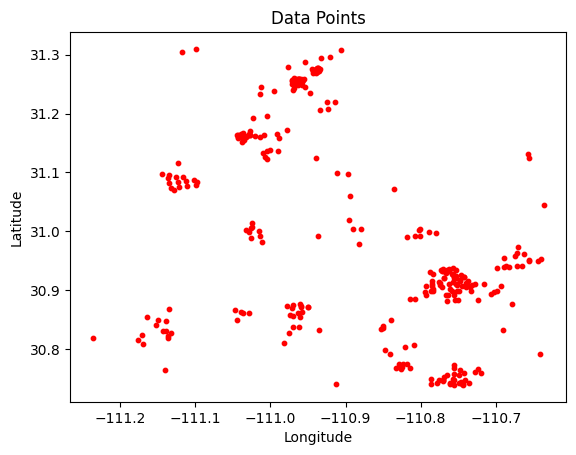

In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt



# Plotting the polygon
plt.figure()
plt.scatter(df['longitude'], df['latitude'], c='red', s=10)  # plot the data points from the dataset
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points')
plt.show()


This code snippet extracts the start and end date of the data set to determine the time range of the analysis. Additionally, it sets a 'distance' variable using a previously defined 'interval'. These variables will be used for future analysis and filtering in the notebook.

In [ ]:
# Importing the dateutil parser to convert string to datetime object
from dateutil.parser import parse

# Parsing the 'fecha' column to get the start and end dates
fecha_inicio = parse(df["date"][0])
fecha_fin = parse(df["date"].iloc[-1])  # Using iloc for better readability

# Using the intervalo defined earlier for distancia
distancia = intervalo


It performs geotemporal analysis. It iterates through each month in a date range and, for each month, examines a list of geographic points. For each point, the code looks for nearby events in the data set and determines the most frequent time of those events. The results are stored in a list of lists, where each sublist contains the most frequent times for all points in a specific month.

In [ ]:
%%time
from dateutil.rrule import rrule, MONTHLY
import pandas as pd
import numpy as np
from datetime import datetime

# Convert 'fecha' and 'hora' to a single datetime column
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'])

# Initialize an empty list to store the records
registros = []

# Loop through each month between the start and end date
for fecha in rrule(MONTHLY, dtstart=fecha_inicio, until=fecha_fin):

    # Filter the DataFrame to only include records within the current month
    dfTemp = df[(df['Datetime'] >= fecha) & (df['Datetime'] < fecha + pd.DateOffset(months=1))]
    row = []

    # Loop through each point in the list of points
    for iRow in points:

        # Find records that are close to the current point based on the 'distancia'
        cercanos = dfTemp.loc[np.sqrt((dfTemp['latitude'] - iRow[1])**2 + (dfTemp['longitude'] - iRow[0])**2) < distancia]

        # Find the most frequent hour if there are any nearby records
        if len(cercanos) != 0:
            horaMax = cercanos['Datetime'].groupby(cercanos['Datetime'].dt.hour).count().idxmax()
        else:
            horaMax = -1
        row.append(horaMax)

    registros.append(row)


CPU times: user 4.02 s, sys: 57.5 ms, total: 4.08 s
Wall time: 4.13 s


It takes a deep copy of the original list of geographic points and stores it in a new list. Then, for each month and each point in this new list, add the most frequent time of nearby events. This top time data is extracted from the 'records' list, which was generated in a previous step. In the end, each point in the copied list will have multiple most frequent times, one for each month analyzed.

In [ ]:
%%time
import copy

# Deep copy the original points list
pointsCopy = copy.deepcopy(points)

# Loop through each month in the 'registros' list
for mes in range(len(registros)):
    y = 0
    # Loop through each point in the deep-copied list
    for i in pointsCopy:
        # Append the most frequent hour for that point in that month
        i.append(registros[mes][y])
        y += 1


CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.62 ms


This code snippet prints a summary of key information from the geotemporal analysis. Shows the total number of coordinates analyzed, the number of months included in the study, the start and end dates of the analysis period, and the maximum distance in degrees used for spatial filtering.

In [ ]:
print("Summary of the information:")
print("Coordinates: " + str(len(pointsCopy)))
print("Months: " + str(len(registros)))

print("Start date: " + str(fecha_inicio))
print("End date: " + str(fecha_fin))

print("Maximum distance in degrees: " + str(distancia))



Summary of the information:
Coordinates: 42
Months: 91
Start date: 2016-02-24 00:00:00
End date: 2023-09-19 00:00:00
Maximum distance in degrees: 0.05


It creates a new directory to store the analysis results. The directory name includes the current date and time to ensure it is unique. If the directory does not exist, the code creates it automatically.


In [ ]:
import os
import datetime

# Create a unique directory path based on the current date and time
path = './Resultados/' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Create the directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

path


'./Resultados/2023-10-16_07-34-17'

This code snippet defines two important variables for analysis. The 'radiusMeters' variable sets a radius of 9000 meters to be used in geographic calculations. The 'months' list contains the names of the months in Spanish, which will be used to label results in temporal analyses.


In [ ]:
# Define the radius in meters for geographical calculations
radiusMeters = 9000

# Define a list of month names in English
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]



In here we used the Folium library to create interactive maps. For each month in the data set, it generates a new map showing points of interest represented by circles and markers. Circles are colored according to a color scale that represents the most frequent time of events near each point. The map for each month is saved as an HTML file in a specific directory.

The color scale represents the most frequent time of events near each point of interest for a given month. The code uses a linear color scale that goes from 0 to 23, corresponding to 24 hours a day.

For example, if the color of a circle on the map is green and the color scale indicates that green corresponds to the value 15, that means that for that specific geographic point and month, most nearby events occurred at 15: 00 hours.

The color scale provides a visually effective way to identify temporal patterns in geographic data.

In [ ]:
import folium
from branca.element import Figure
import branca.colormap as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Create a colormap
colors = cm.LinearColormap([mcolors.rgb2hex(rgba) for rgba in plt.cm.Spectral(np.linspace(0, 1, 24))], vmin=0, vmax=23, max_labels=24)



# Define the points of interest as an array of coordinates
puntos_de_interes = pointsCopy

# Add the points of interest to the map
for mes in range(len(puntos_de_interes[0]) - 2):

    # Initialize a new folium map
    mapa = folium.Map(location=[27.0862, -107.41912], zoom_start=7)

    for punto in puntos_de_interes:
        if punto[mes + 2] != -1:
            # Add a circle for each point of interest
            circle = folium.Circle(
                location=[punto[1], punto[0]],
                radius=radiusMeters,
                color=colors(punto[mes + 2]),
                fill=True,
                fill_color=colors(punto[mes + 2])
            )

            # Add a marker for each point of interest
            folium.Marker(
                location=[punto[1], punto[0]],
                icon=folium.DivIcon(html=f"""<div style="text-align:center; width: 10px; color: black;">{punto[mes+2]}</div>""")
            ).add_to(mapa)

            # Add the circle to the map
            circle.add_to(mapa)

    # Add the colormap to the map
    colors.caption = 'Color Scale'
    mapa.add_child(colors)

    # Save the map
    fig = Figure(width=1000, height=1200)
    fig.add_child(mapa)
    mapa.save(path + "/map_" + str(2015 + (mes // 12)) + "_" + str(months[mes % 12]) + ".html")



It creates a textual summary of key information related to the geotemporal analysis. The summary includes details such as the total number of coordinates analyzed, the time range covered, the maximum distance in degrees used for spatial filtering, and the radius of the circles on the maps. This information is saved in a text string for future reference or to be written to a file.


In [ ]:
r1 = "Summary of the information:\n\n"
r2 = "Coordinates: " + str(len(pointsCopy)) + "\n\n"
r3 = "Months: " + str(len(registros)) + "\n\n"
r4 = "Start date: " + str(fecha_inicio) + "\n\n"
r5 = "End date: " + str(fecha_fin) + "\n\n"
r6 = "Maximum distance in degrees: " + str(distancia) + "\n\n"
r7 = "Radius of each circle: " + str(radiusMeters) + "\n\n"
text = r1 + r2 + r3 + r4 + r5 + r6 + r7

print(text)



Summary of the information:

Coordinates: 42

Months: 91

Start date: 2016-02-24 00:00:00

End date: 2023-09-19 00:00:00

Maximum distance in degrees: 0.05

Radius of each circle: 9000




# **Generation and Preprocessing of Geotemporal Data for Predictive Models**

Import libraries

In [ ]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Read the .CSV
df = pd.read_csv('DataSet23.csv', index_col=0, parse_dates=["Datetime"])

df

CPU times: user 28.5 ms, sys: 26 µs, total: 28.5 ms
Wall time: 30.4 ms


brightness  confidence daynight      hour        date  \
0        322.00          68        D  21:00:00  24/02/2016   
1        313.80          32        D  18:00:00  30/03/2016   
2        325.50          67        D  17:00:00  03/04/2016   
3        339.30          86        D  17:00:00  03/04/2016   
4        301.60          43        N  09:00:00  04/04/2016   
..          ...         ...      ...       ...         ...   
347      324.69          11        D  20:00:00  18/09/2023   
348      332.71          74        D  20:00:00  18/09/2023   
349      333.47          56        D  20:00:00  18/09/2023   
350      305.98          66        N  04:00:00  19/09/2023   
351      307.48          72        N  04:00:00  19/09/2023   

               Datetime  Fire  latitude  longitude  
0   2016-02-24 21:00:00     1  30.83420 -110.85340  
1   2016-03-30 18:00:00     1  31.25190 -110.96230  
2   2016-03-04 17:00:00     1  31.09720 -110.89650  
3   2016-03-04 17:00:00     1  31.09880 -110.91100  
4   2016-04-04 09:00:00     1  30.76560 -110.82550  
..                  ...   ...       ...        ...  
347 2023-09-18 20:00:00     1  30.81045 -110.98147  
348 2023-09-18 20:00:00     1  30.86238 -110.95789  
349 2023-09-18 20:00:00     1  30.87167 -110.95984  
350 2023-09-19 04:00:00     1  30.87224 -110.97795  
351 2023-09-19 04:00:00     1  30.87553 -110.96106  

[352 rows x 9 columns]

**The study area and spatial resolution are established**

Latitude and longitude are used to determine the area of ​​analysis

The spatial resolution determines the size that each side of the pixel will have, in this case the study area will be divided into zones of
 0.00892499999999996 x 0.0.009379062499999868.

With the spatial resolution, the number of zones that the total area has can be calculated, so in this example it would be 64x64.

For this reason the matrices to generate the images must be 64x64




In [ ]:
import math

# Latitude and longitude limits
latF = 31.3099
latI = 30.7387
lonF = -110.6363
lonI = -111.23656

# Calculate the spatial resolution needed to get a 64x64 grid
resEspLat = (latF - latI) / 64
resEspLon = (lonF - lonI) / 64

print("\nNew spatial resolution for latitude:", resEspLat)
print("New spatial resolution for longitude:", resEspLon)

# Set the number of columns and rows directly to 60
cuaPcolumna = 64
cuaPrenglon = 64

print("\nMatrix dimensions:")
print("Number of columns:", cuaPcolumna)
print("Number of rows:", cuaPrenglon)




New spatial resolution for latitude: 0.00892499999999996
New spatial resolution for longitude: 0.009379062499999868

Matrix dimensions:
Number of columns: 64
Number of rows: 64



It focuses on setting initial and final dates based on the 'Datetime' column of a DataFrame, df. It selects the first and last datetime values from this column and then resets the time components (hour, minute, second) to midnight (00:00:00). The initial date, fI, is set to the first datetime value in the 'Datetime' column, and the final date, fF, is set to the last datetime value. Both dates are adjusted so that they represent the beginning of their respective days. This could be useful for aligning the data to a daily time frame.

In [ ]:
# Initial and final date
fI = df['Datetime'].iloc[0].replace(hour=0, minute=0, second=0)
fF = df['Datetime'].iloc[-1].replace(hour=0, minute=0, second=0)


**Generating the matrices**

In this part, a cycle is made between the initial date and the final date, reviewing the data obtained each day, with the data of each day the activity of that day is recorded in the matrix.

In the end, you will obtain a list with matrices that represent the number of days that this data contains.

In [ ]:
%%time
from datetime import timedelta
import numpy as np

matrices = []
fecha = fI
fechaFinal = fF + timedelta(days=1)

while fecha < fechaFinal:
    print(f"Processing date: {fecha}")
    a = df[(df['Datetime'] >= fecha) & (df['Datetime'] < (fecha + timedelta(days=1)))]
    m = np.zeros((cuaPcolumna, cuaPrenglon))

    for index, item in a.iterrows():
        latitud = item['latitude']  # Using the column'latitude'
        longitud = item['longitude']  # Using the column 'longitude'

        y = int((latitud - latI) / resEspLat)
        x = int((longitud - lonI) / resEspLon)

        if 0 <= y < cuaPcolumna and 0 <= x < cuaPrenglon:  # Check for limits
            m[y, x] = 1
        else:
            print(f"Skipping: index out of bounds for y: {y}, x: {x}")

    fecha = fecha + timedelta(days=1)
    matrices.append(m)


Processing date: 2016-02-24 00:00:00
Processing date: 2016-02-25 00:00:00
Processing date: 2016-02-26 00:00:00
Processing date: 2016-02-27 00:00:00
Processing date: 2016-02-28 00:00:00
Processing date: 2016-02-29 00:00:00
Processing date: 2016-03-01 00:00:00
Processing date: 2016-03-02 00:00:00
Processing date: 2016-03-03 00:00:00
Processing date: 2016-03-04 00:00:00
Processing date: 2016-03-05 00:00:00
Processing date: 2016-03-06 00:00:00
Processing date: 2016-03-07 00:00:00
Processing date: 2016-03-08 00:00:00
Processing date: 2016-03-09 00:00:00
Processing date: 2016-03-10 00:00:00
Processing date: 2016-03-11 00:00:00
Processing date: 2016-03-12 00:00:00
Processing date: 2016-03-13 00:00:00
Processing date: 2016-03-14 00:00:00
Processing date: 2016-03-15 00:00:00
Processing date: 2016-03-16 00:00:00
Processing date: 2016-03-17 00:00:00
Processing date: 2016-03-18 00:00:00
Processing date: 2016-03-19 00:00:00
Processing date: 2016-03-20 00:00:00
Processing date: 2016-03-21 00:00:00
P

In [ ]:
len(matrices)

2765

**Visualization**

The code snippet iterates through the last 180 matrices in a list called matrices, printing and visualizing each one. For each matrix, it prints the index and the sum of its values, then displays the matrix as a heat map using Matplotlib. The heat map uses the 'Reds' color scheme, with a color bar added for scale and a title indicating the matrix's index. This visualization can be useful for inspecting the matrices' values and understanding their differences or patterns over time.

Matrix 1, values: 0.0


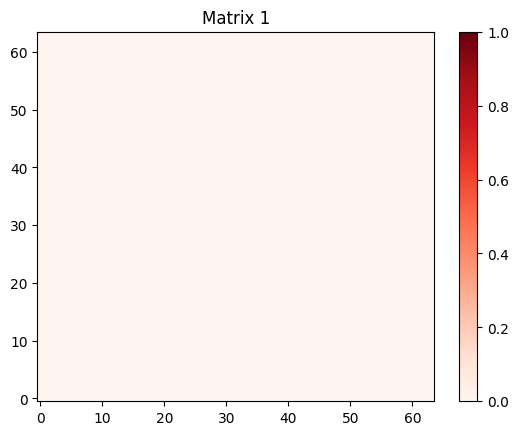

Matrix 2, values: 1.0


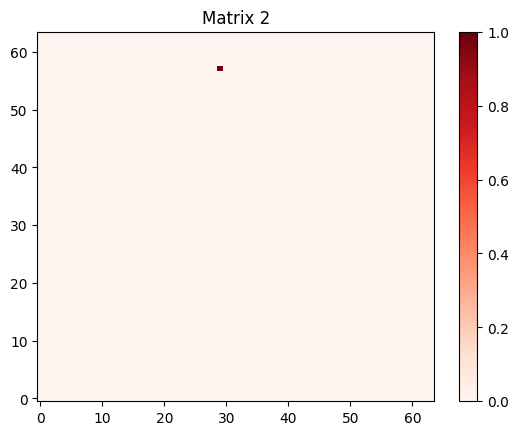

Matrix 3, values: 2.0


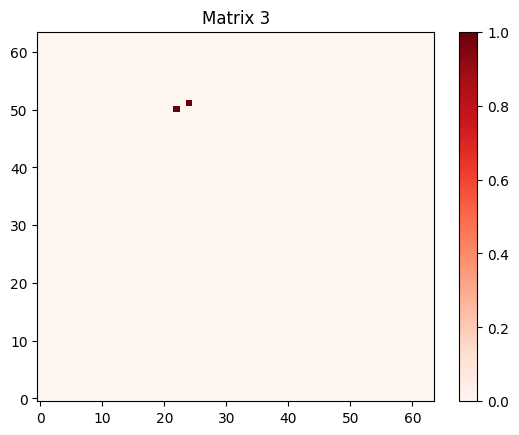

Matrix 4, values: 0.0


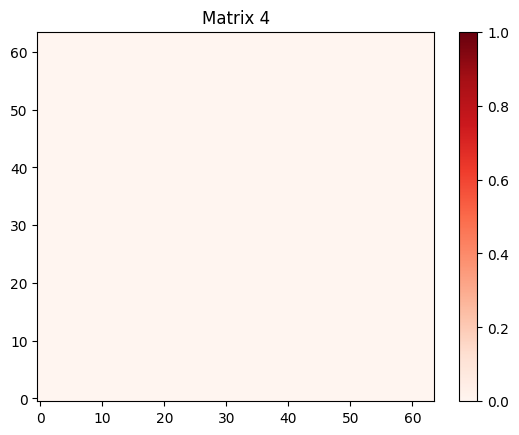

Matrix 5, values: 0.0


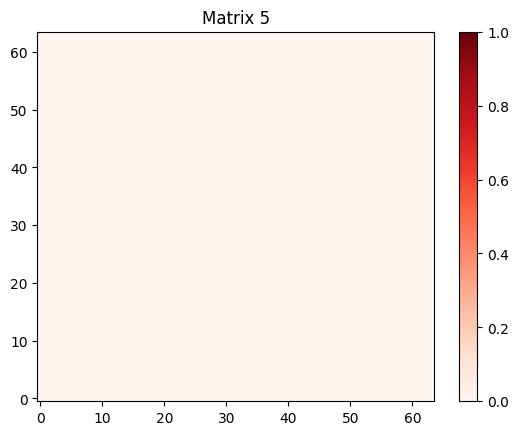

Matrix 6, values: 0.0


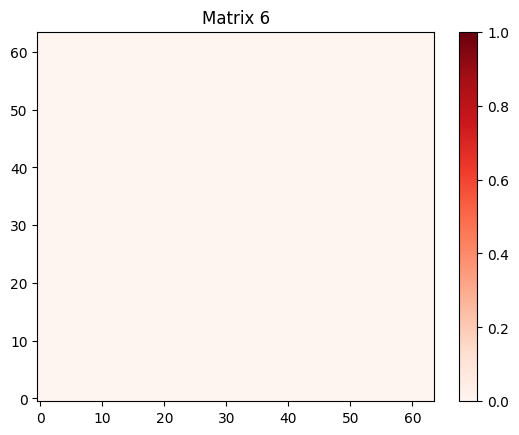

Matrix 7, values: 0.0


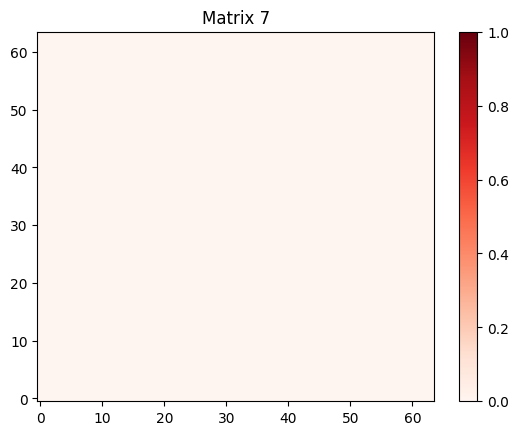

Matrix 8, values: 0.0


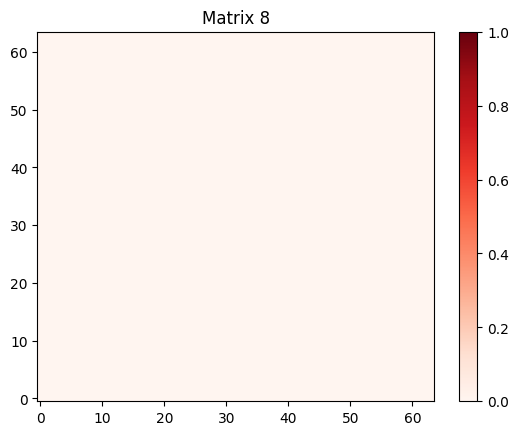

Matrix 9, values: 0.0


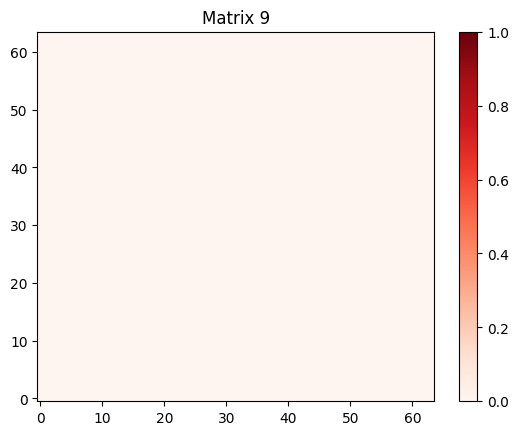

Matrix 10, values: 0.0


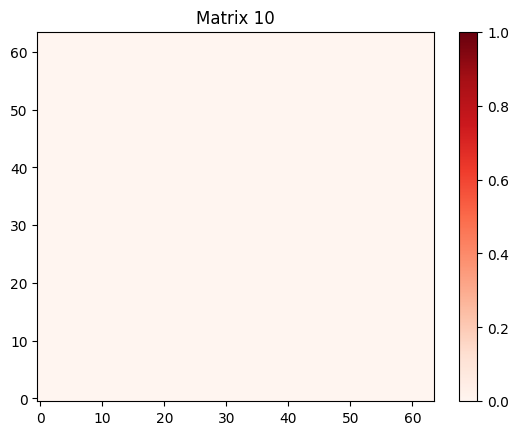

Matrix 11, values: 0.0


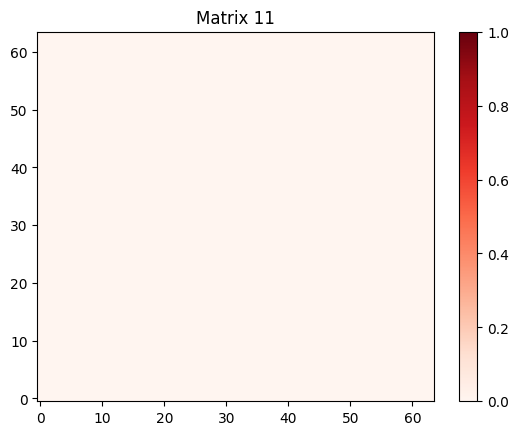

Matrix 12, values: 0.0


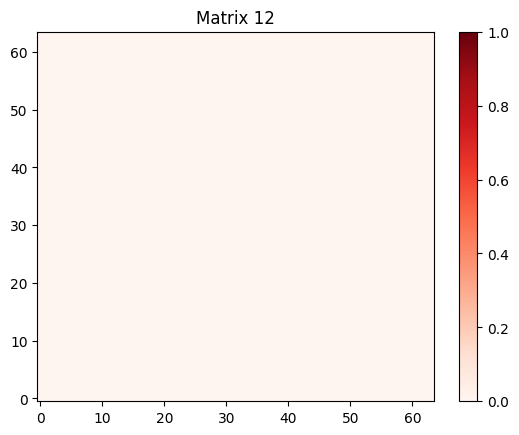

Matrix 13, values: 0.0


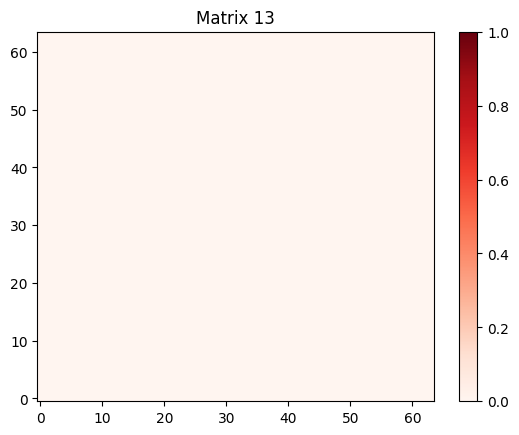

Matrix 14, values: 0.0


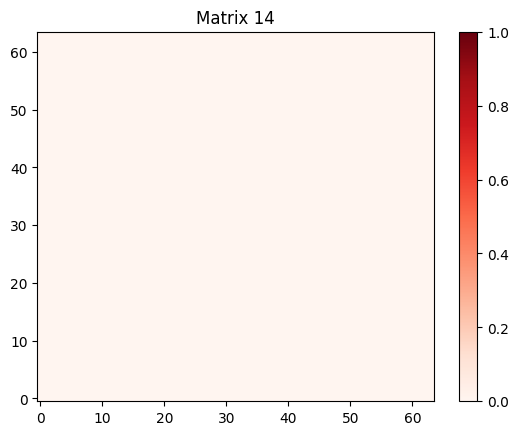

Matrix 15, values: 0.0


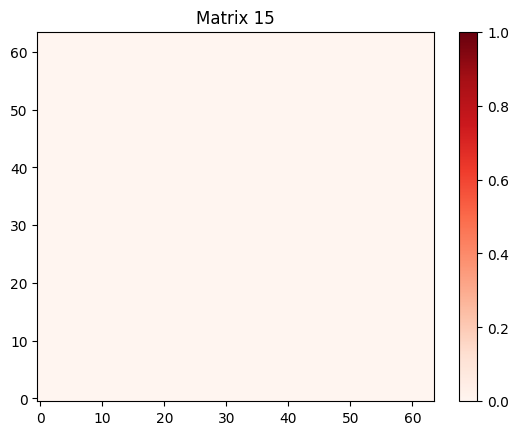

Matrix 16, values: 0.0


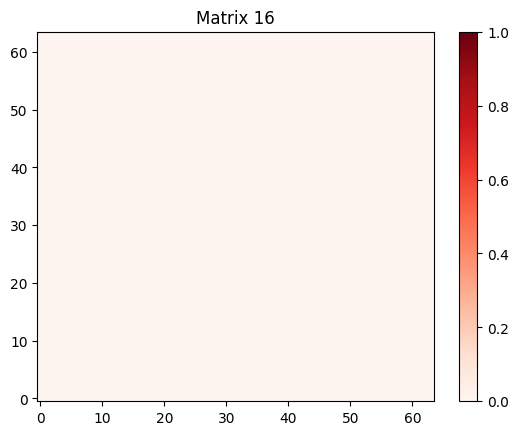

Matrix 17, values: 0.0


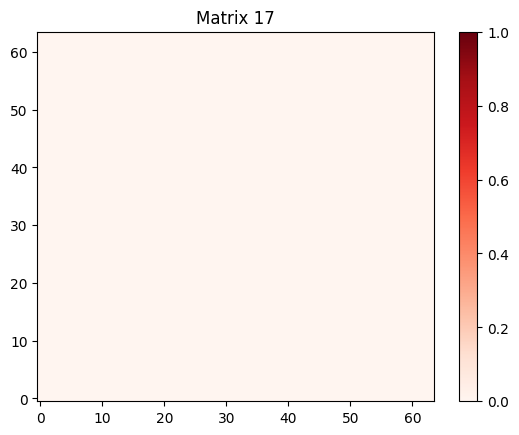

Matrix 18, values: 0.0


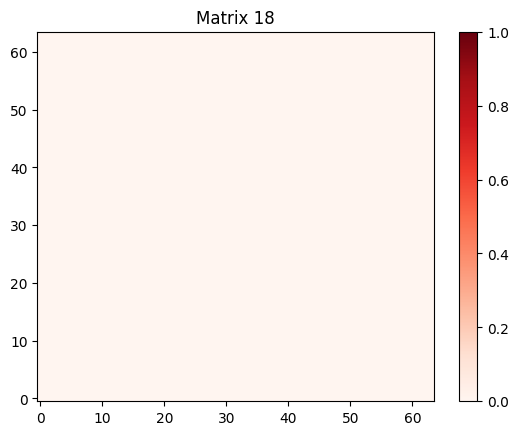

Matrix 19, values: 0.0


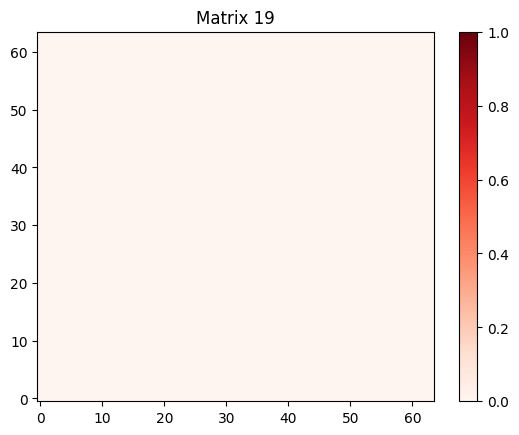

Matrix 20, values: 0.0


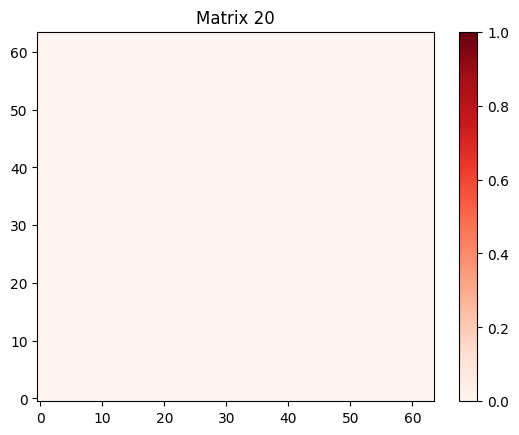

Matrix 21, values: 3.0


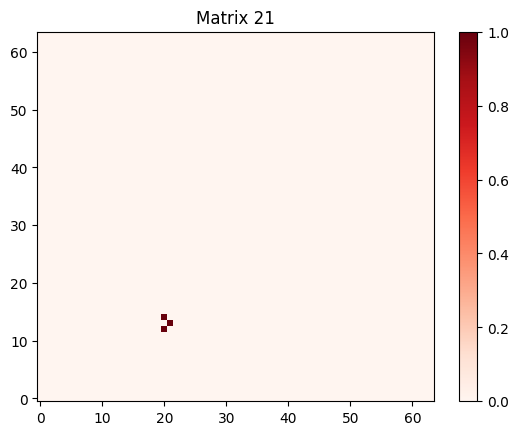

Matrix 22, values: 1.0


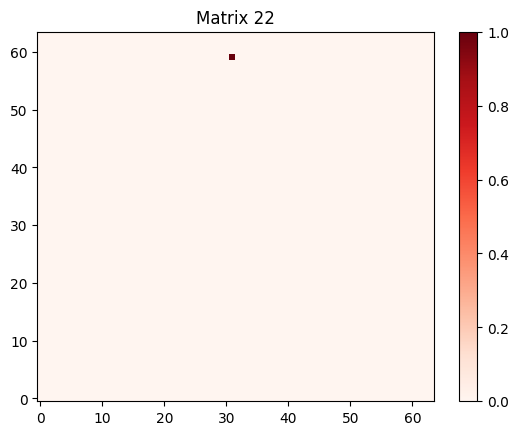

Matrix 23, values: 0.0


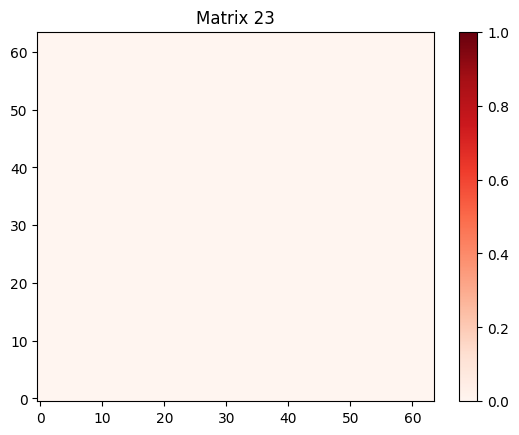

Matrix 24, values: 0.0


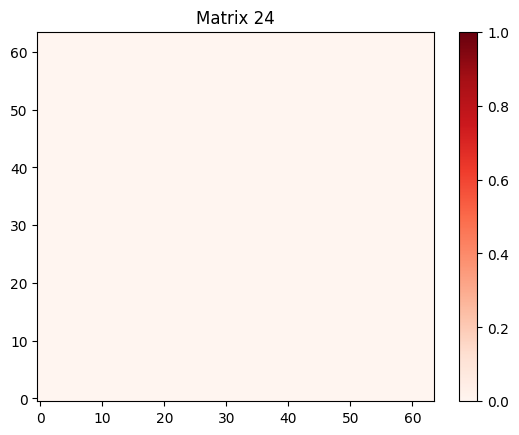

Matrix 25, values: 0.0


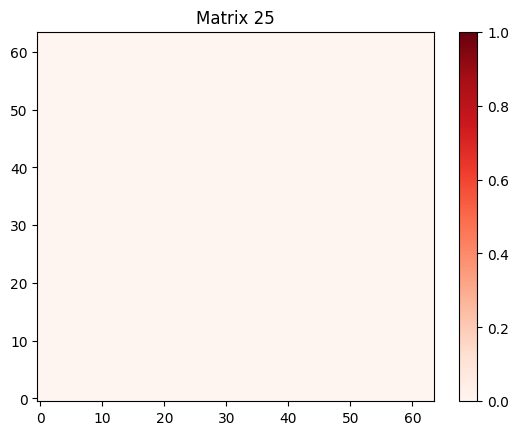

Matrix 26, values: 1.0


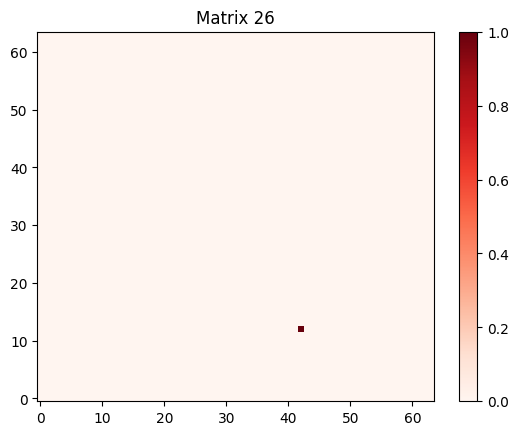

Matrix 27, values: 0.0


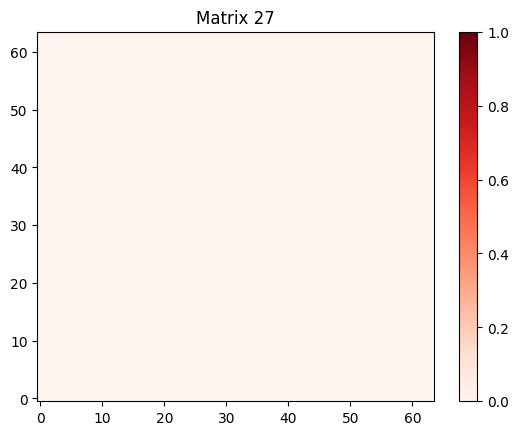

Matrix 28, values: 1.0


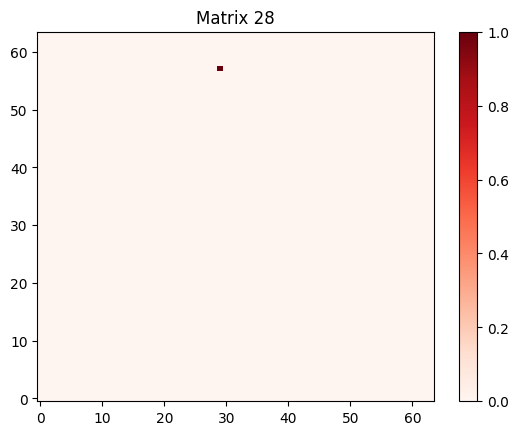

Matrix 29, values: 0.0


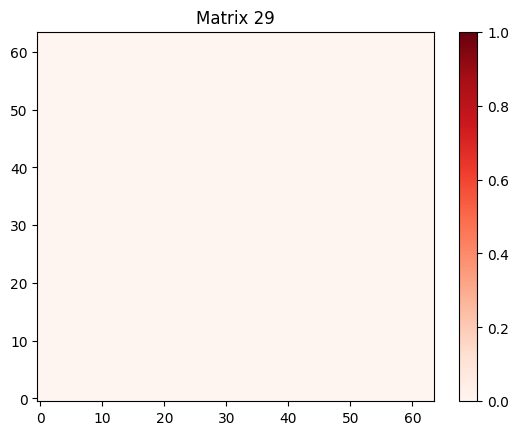

Matrix 30, values: 0.0


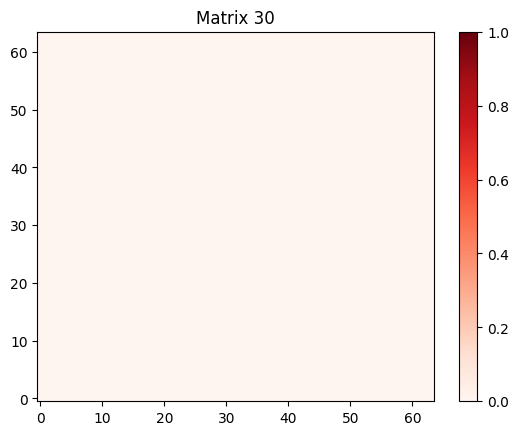

Matrix 31, values: 0.0


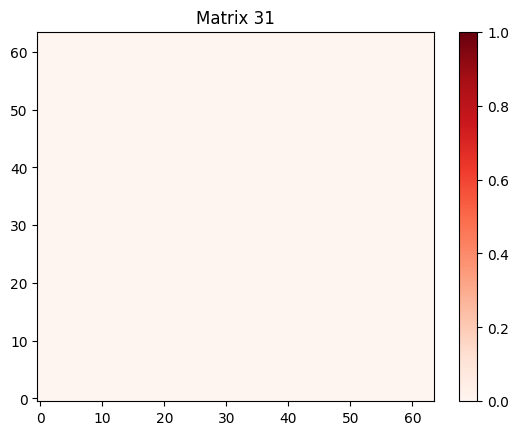

Matrix 32, values: 0.0


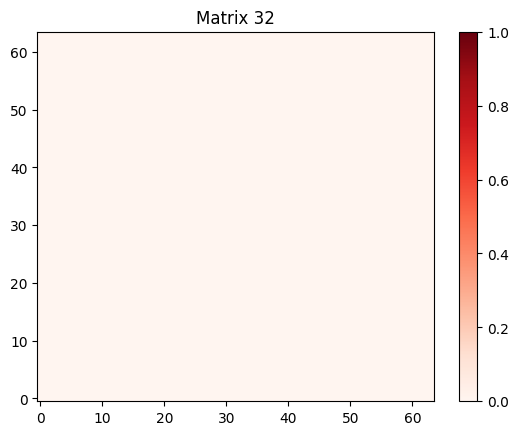

Matrix 33, values: 1.0


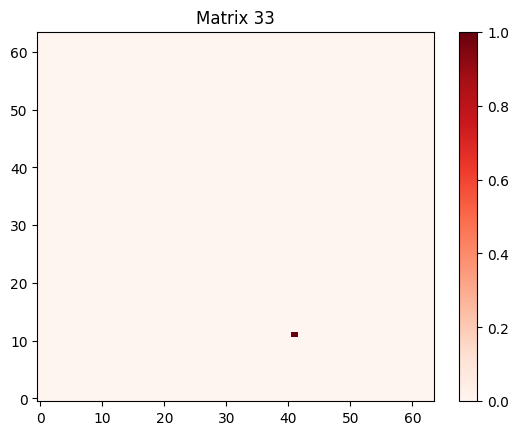

Matrix 34, values: 0.0


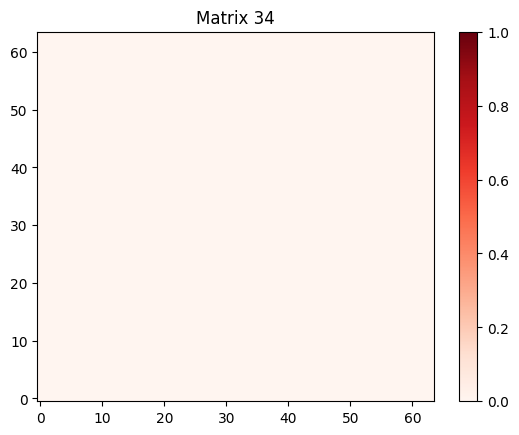

Matrix 35, values: 0.0


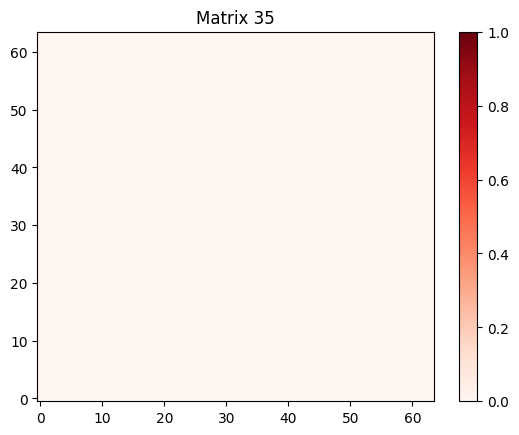

Matrix 36, values: 1.0


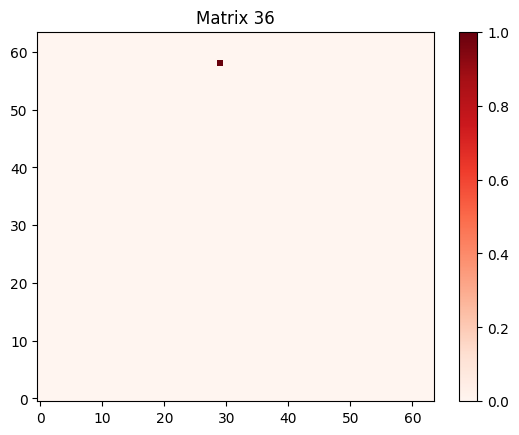

Matrix 37, values: 0.0


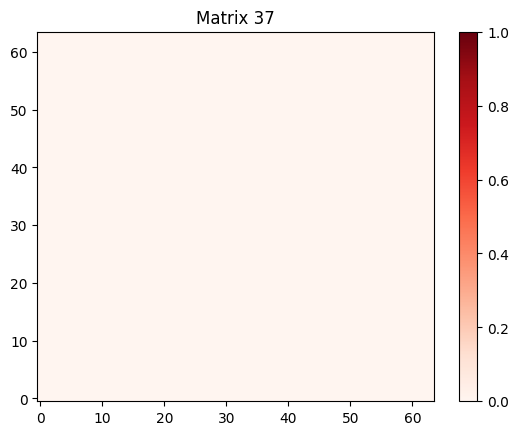

Matrix 38, values: 0.0


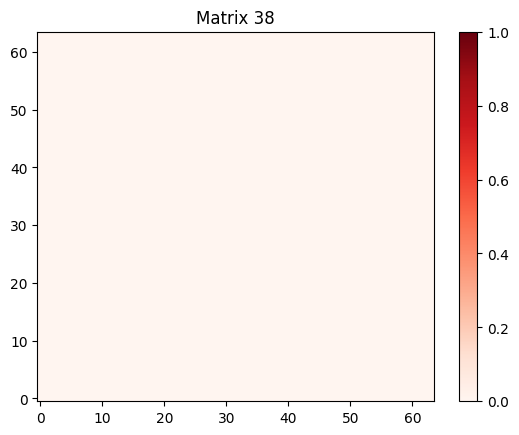

Matrix 39, values: 0.0


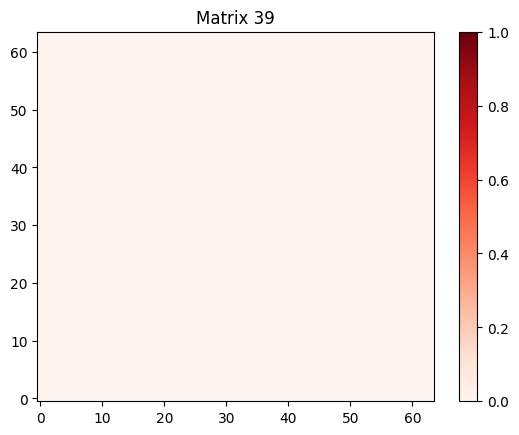

Matrix 40, values: 1.0


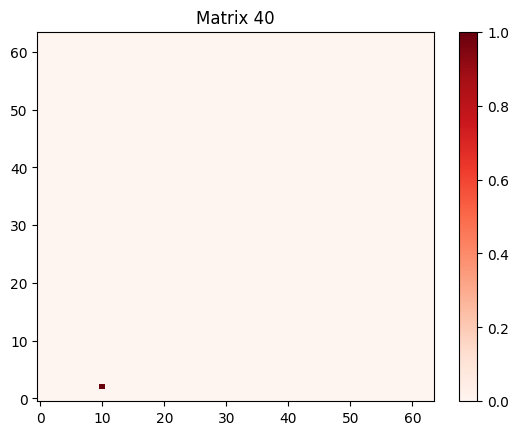

Matrix 41, values: 0.0


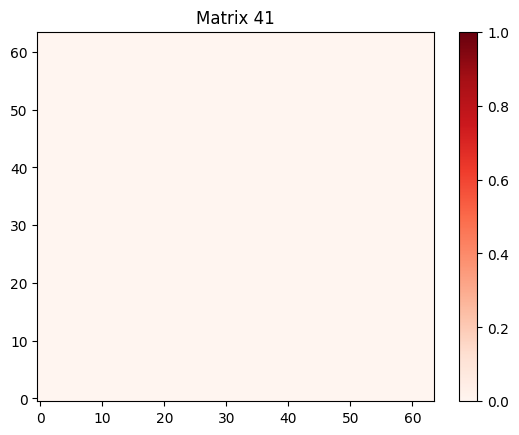

Matrix 42, values: 0.0


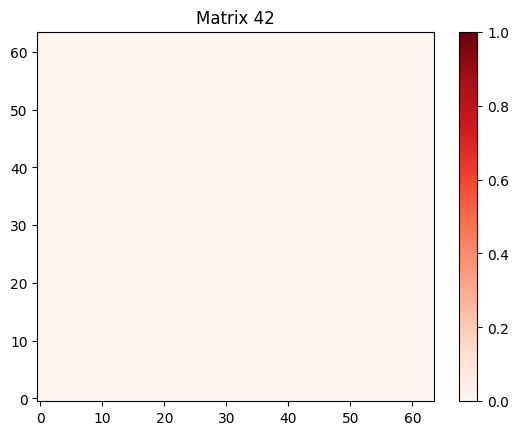

Matrix 43, values: 0.0


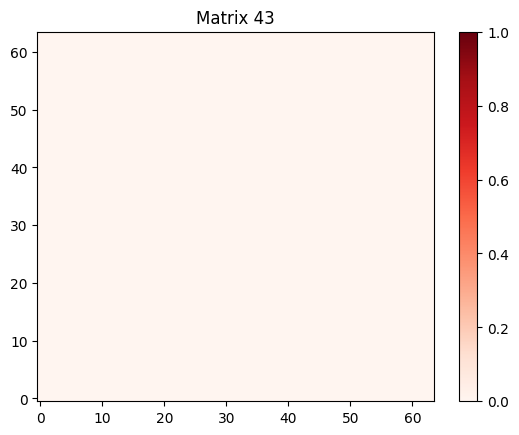

Matrix 44, values: 0.0


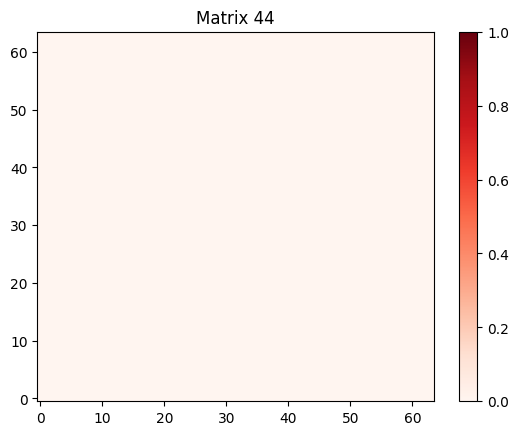

Matrix 45, values: 0.0


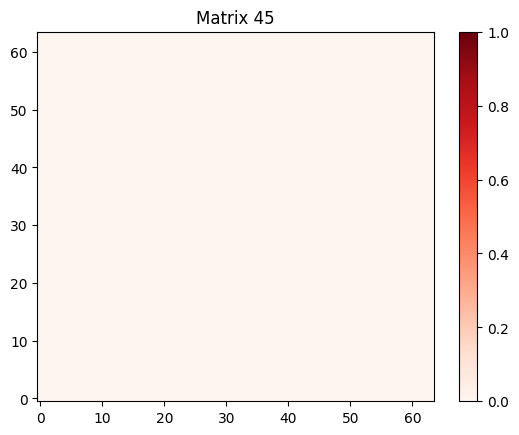

Matrix 46, values: 0.0


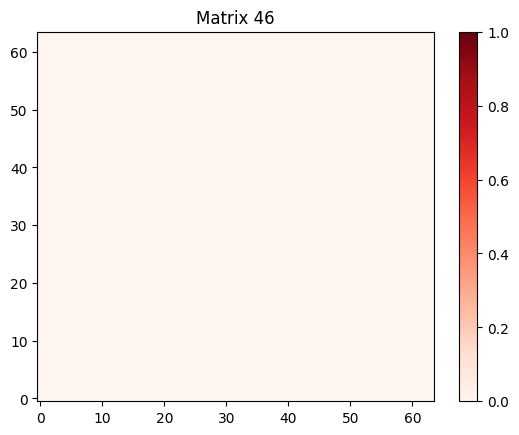

Matrix 47, values: 0.0


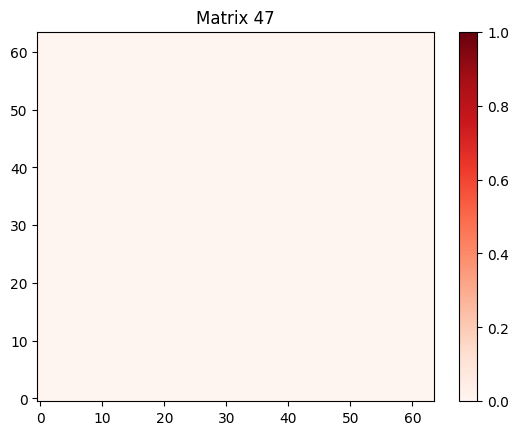

Matrix 48, values: 0.0


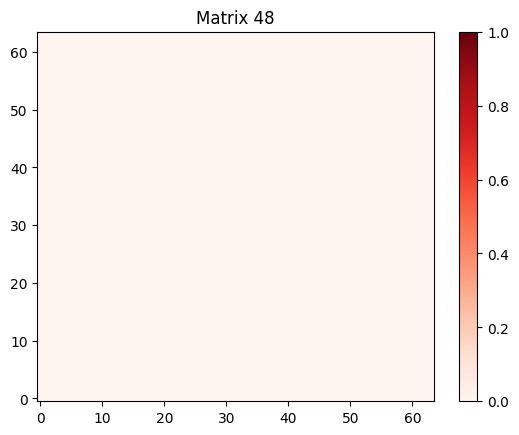

Matrix 49, values: 0.0


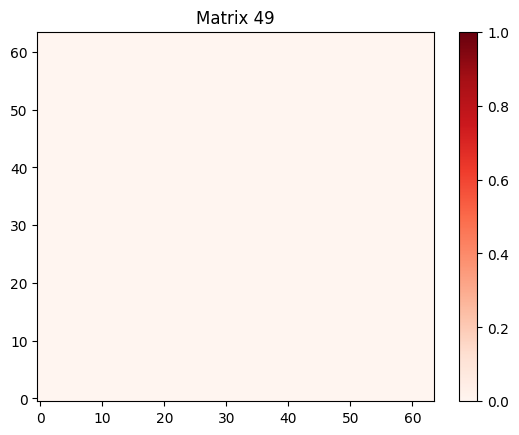

Matrix 50, values: 0.0


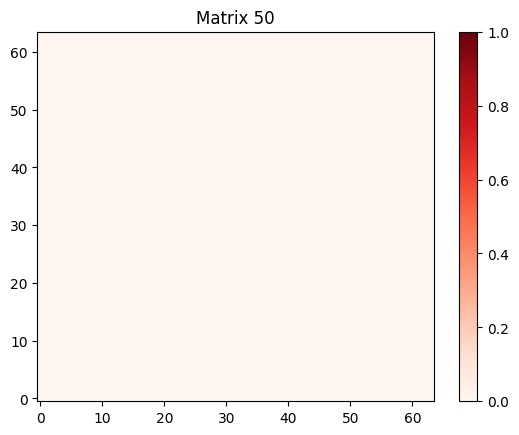

Matrix 51, values: 0.0


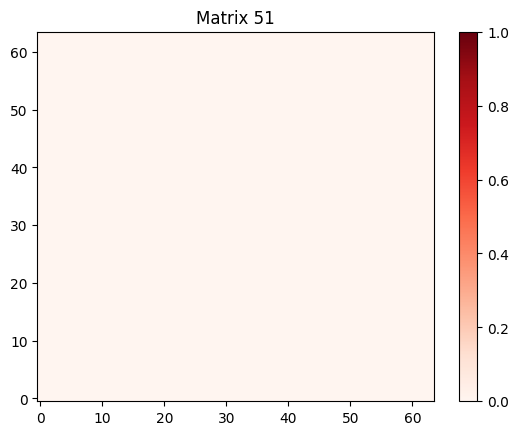

Matrix 52, values: 0.0


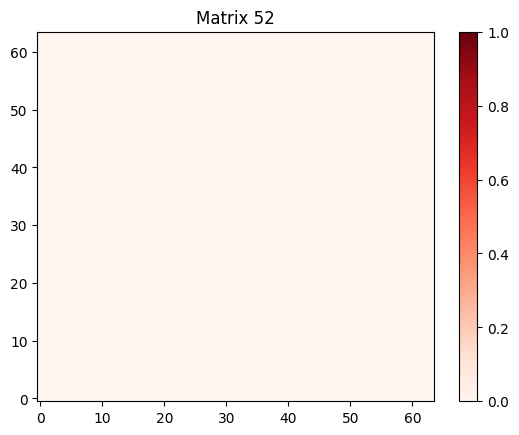

Matrix 53, values: 0.0


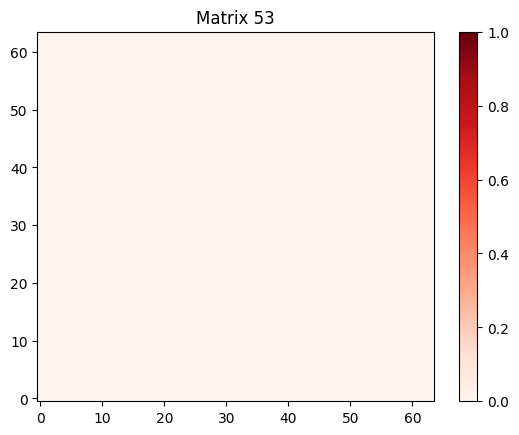

Matrix 54, values: 0.0


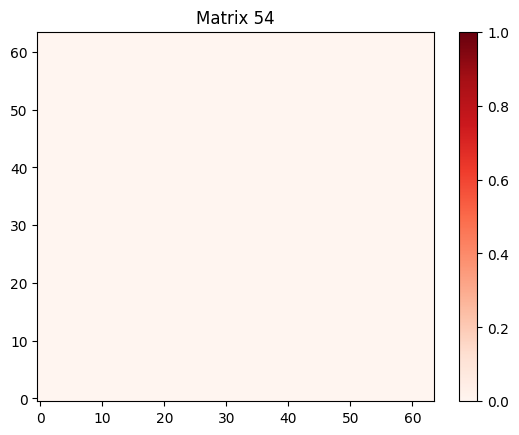

Matrix 55, values: 0.0


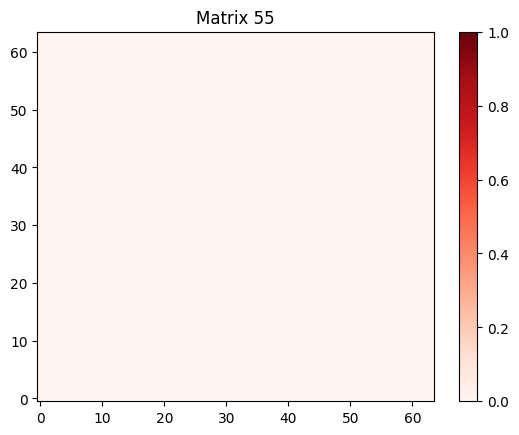

Matrix 56, values: 0.0


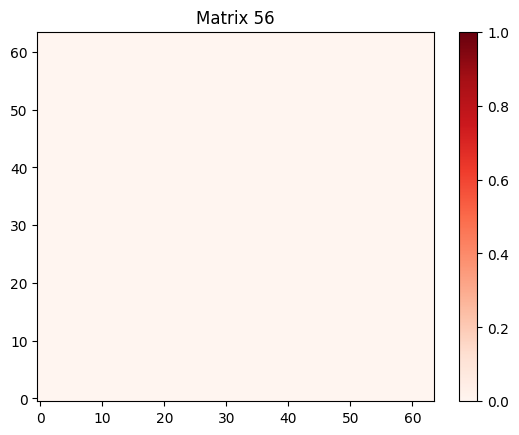

Matrix 57, values: 3.0


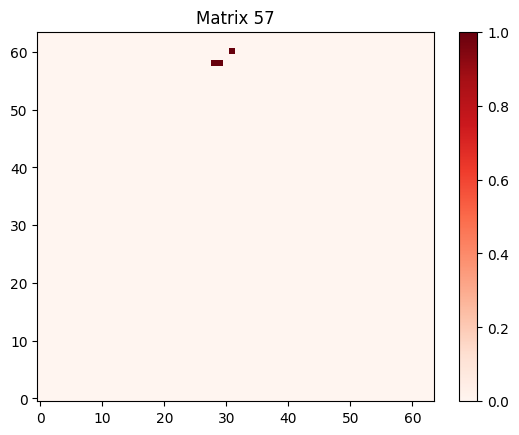

Matrix 58, values: 0.0


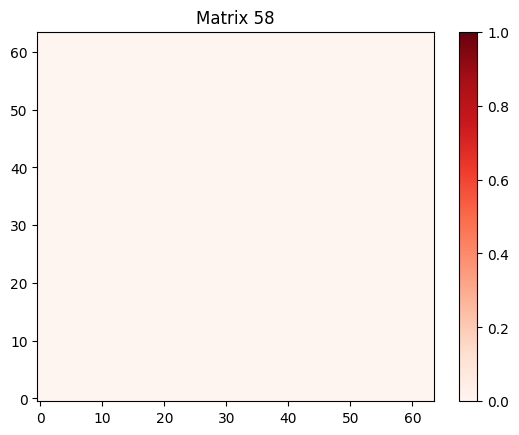

Matrix 59, values: 0.0


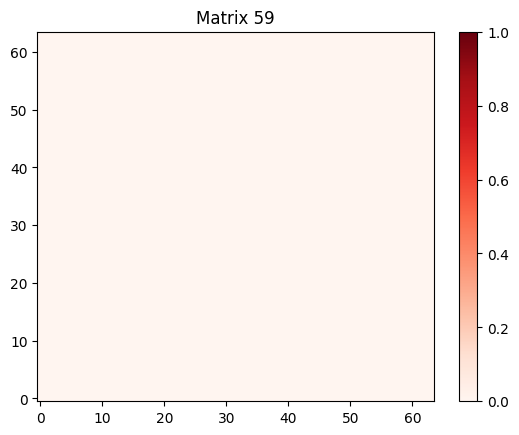

Matrix 60, values: 0.0


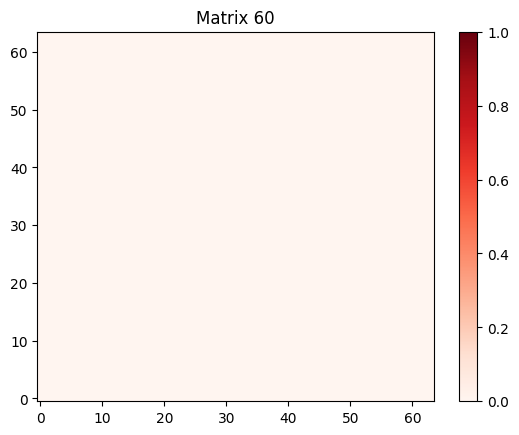

Matrix 61, values: 0.0


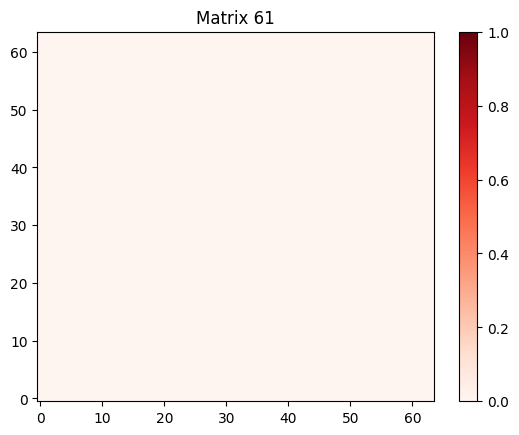

Matrix 62, values: 0.0


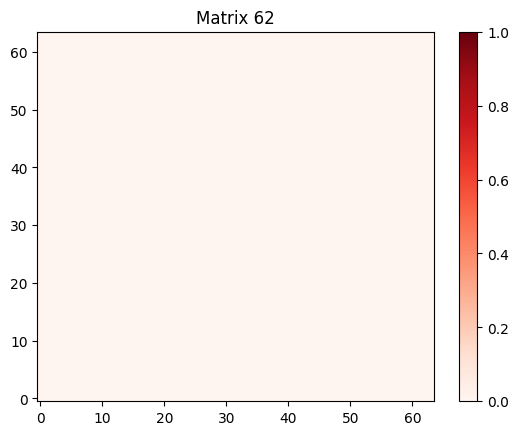

Matrix 63, values: 0.0


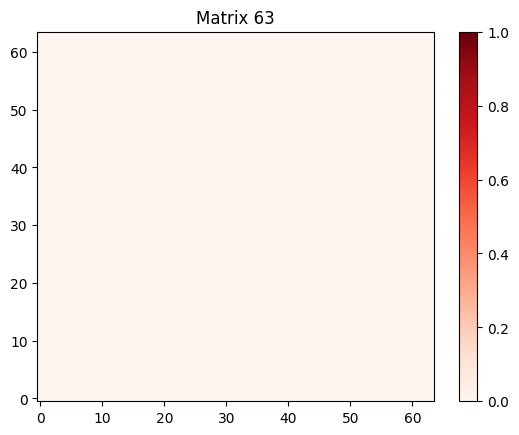

Matrix 64, values: 0.0


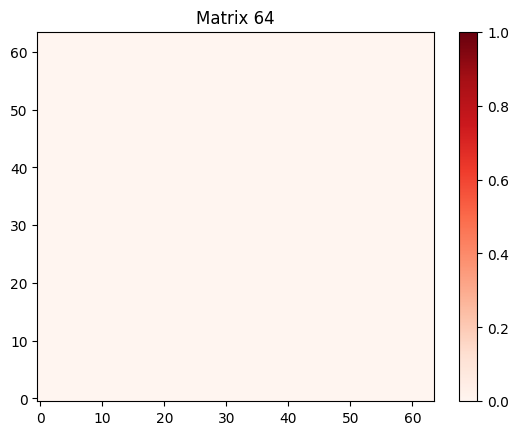

Matrix 65, values: 0.0


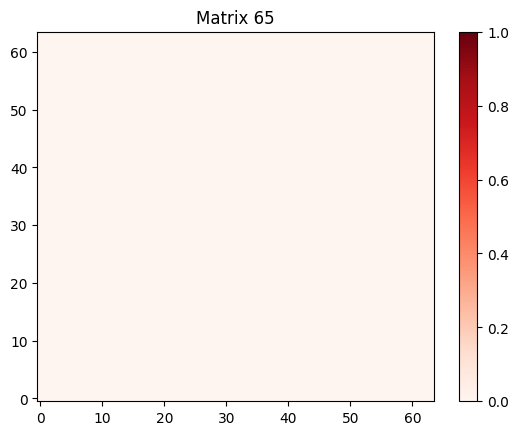

Matrix 66, values: 0.0


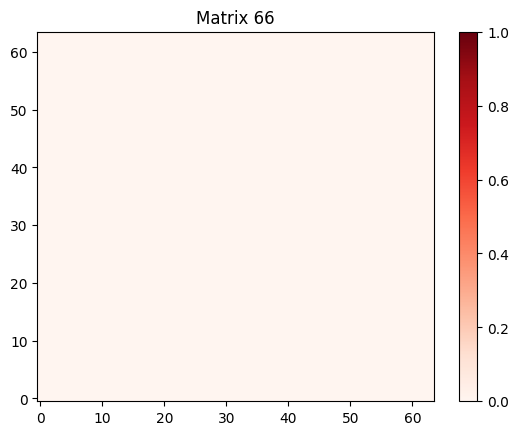

Matrix 67, values: 0.0


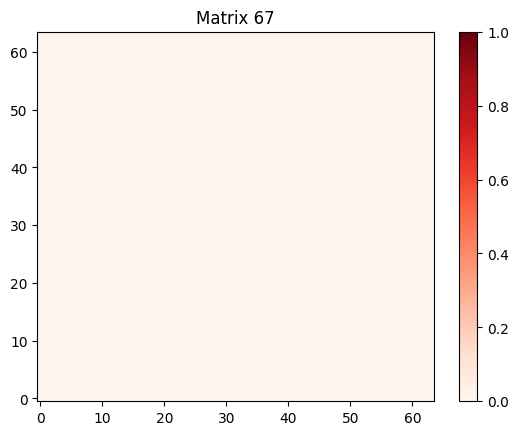

Matrix 68, values: 0.0


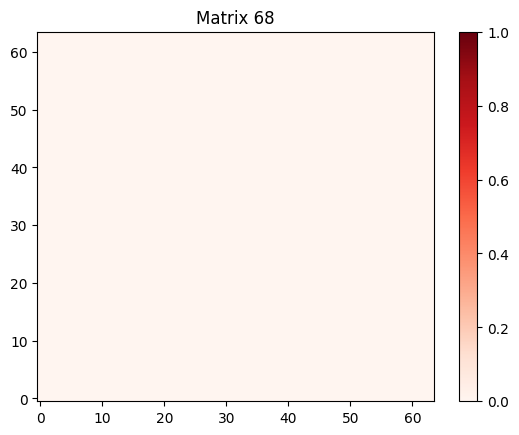

Matrix 69, values: 1.0


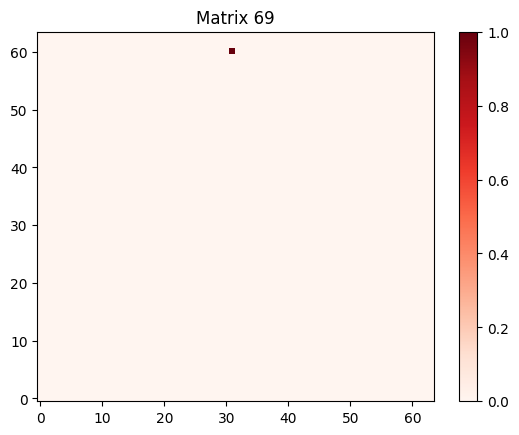

Matrix 70, values: 0.0


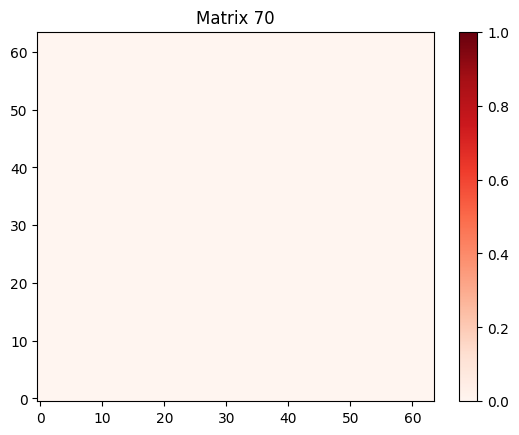

Matrix 71, values: 0.0


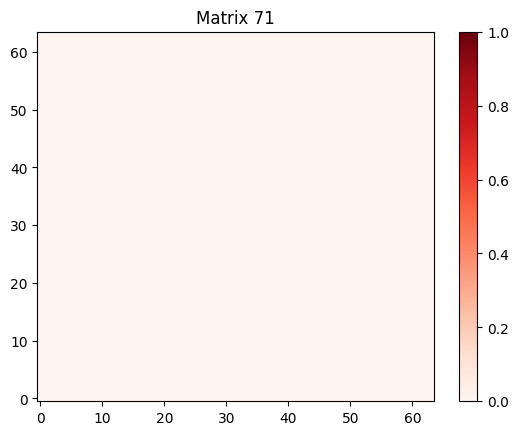

Matrix 72, values: 0.0


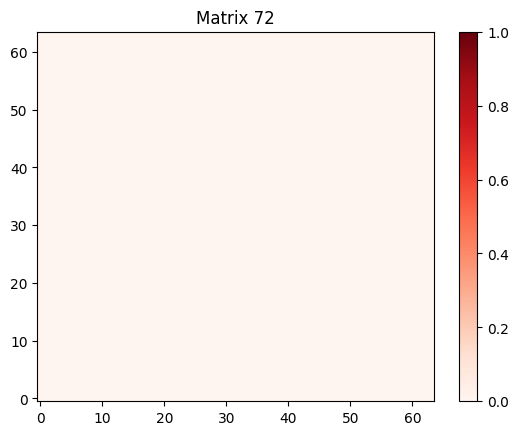

Matrix 73, values: 1.0


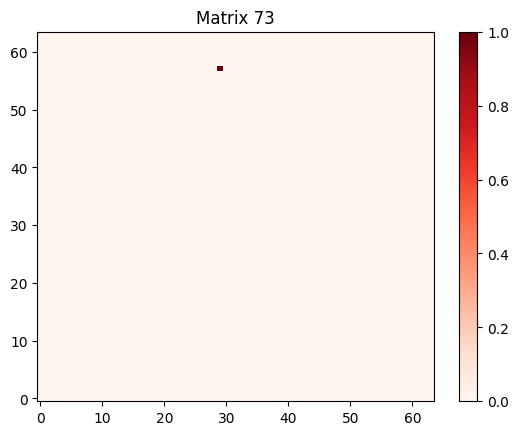

Matrix 74, values: 0.0


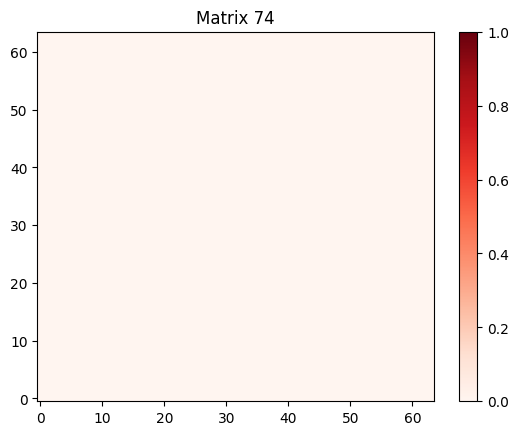

Matrix 75, values: 0.0


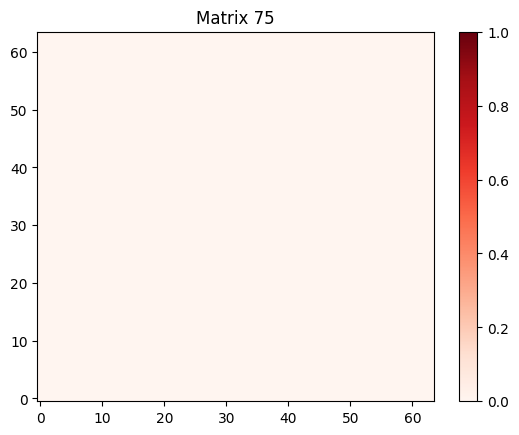

Matrix 76, values: 1.0


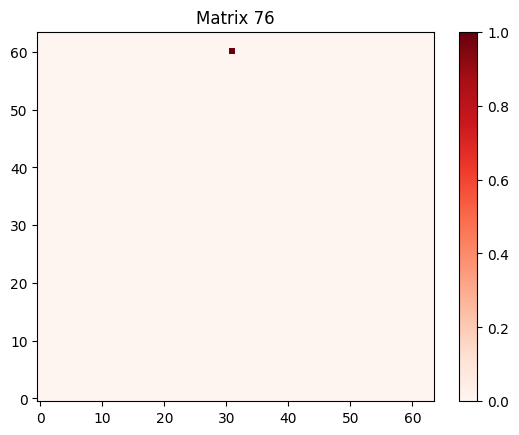

Matrix 77, values: 2.0


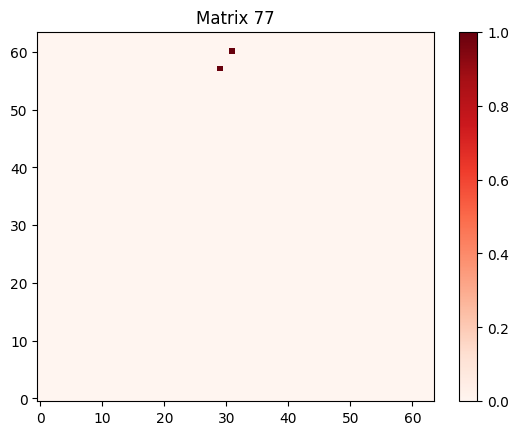

Matrix 78, values: 0.0


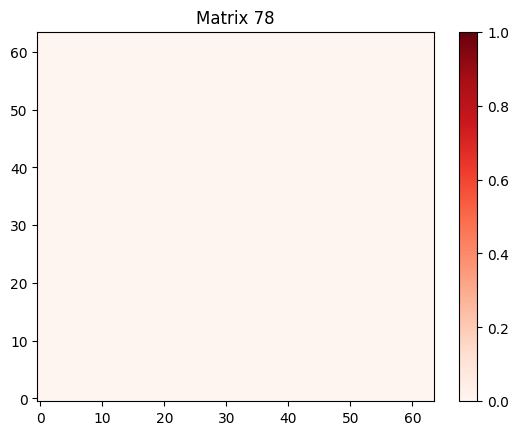

Matrix 79, values: 0.0


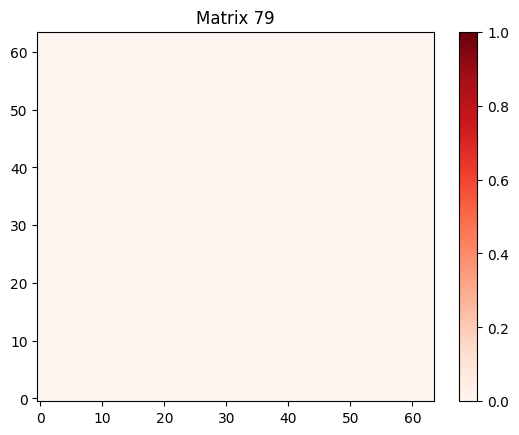

Matrix 80, values: 0.0


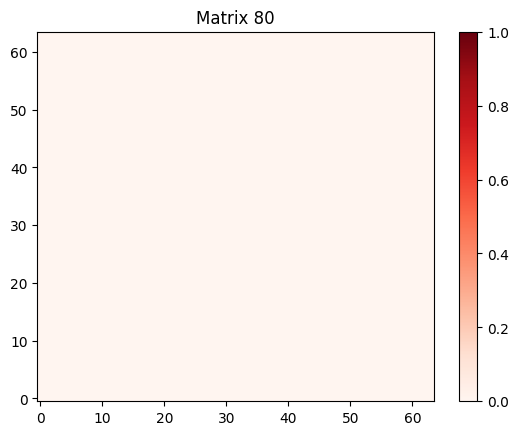

Matrix 81, values: 0.0


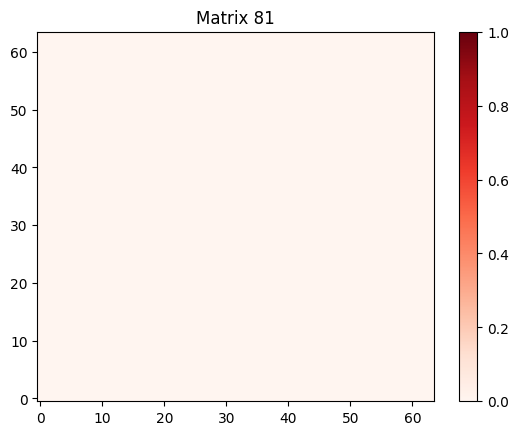

Matrix 82, values: 0.0


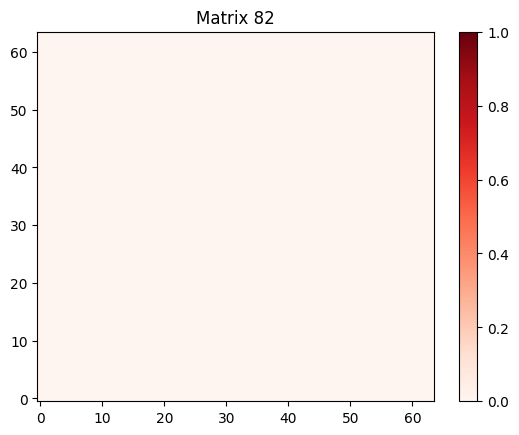

Matrix 83, values: 6.0


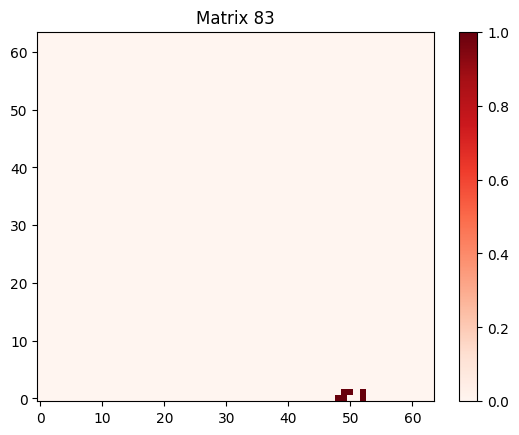

Matrix 84, values: 6.0


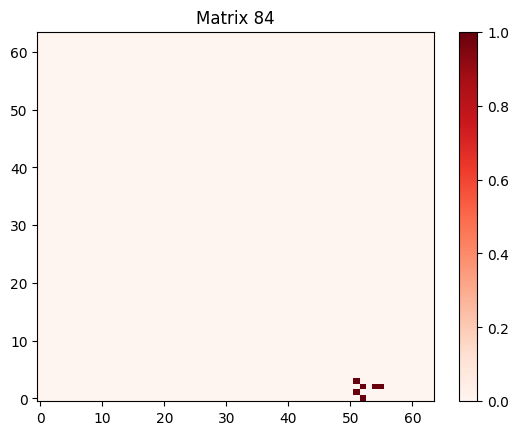

Matrix 85, values: 3.0


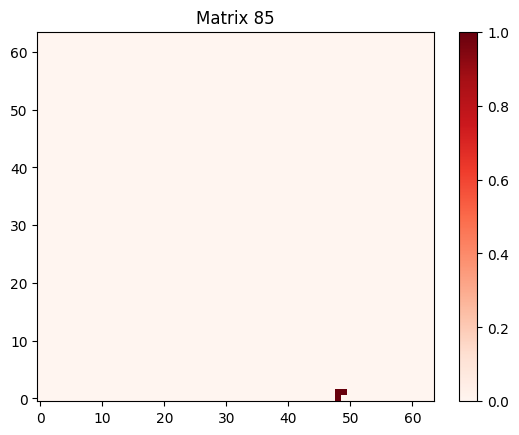

Matrix 86, values: 0.0


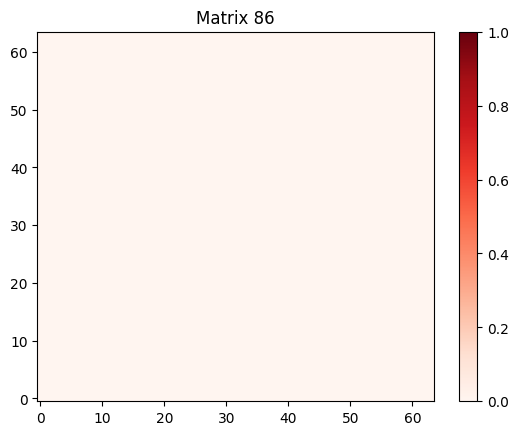

Matrix 87, values: 0.0


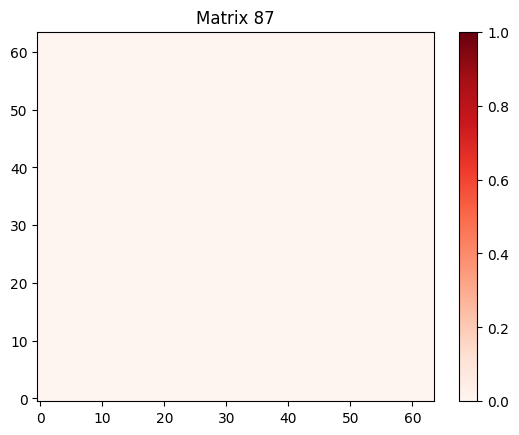

Matrix 88, values: 0.0


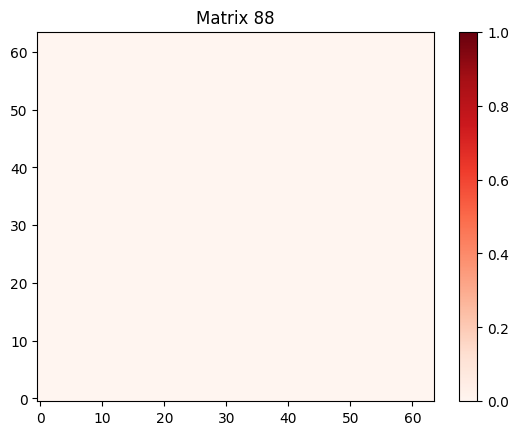

Matrix 89, values: 0.0


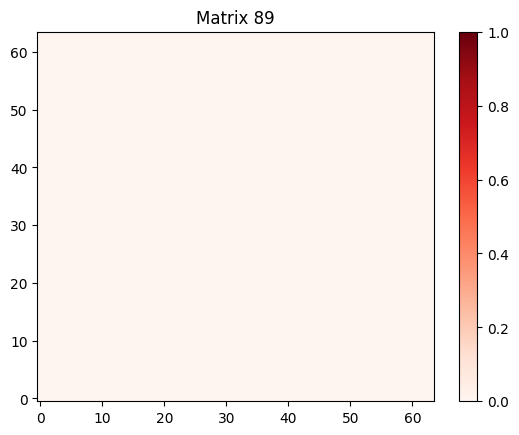

Matrix 90, values: 0.0


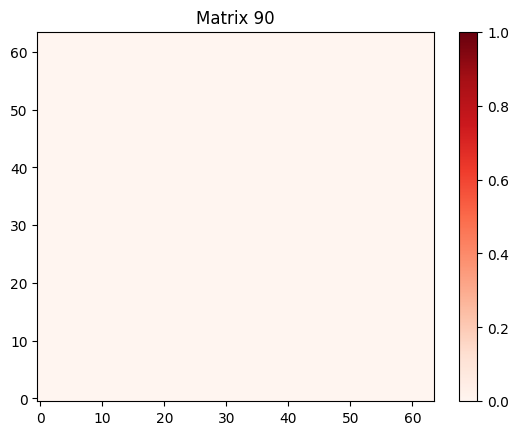

Matrix 91, values: 0.0


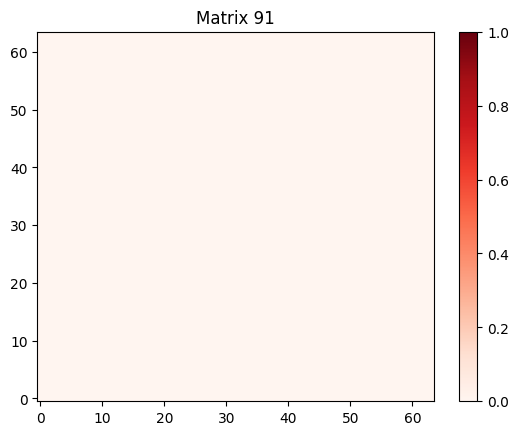

Matrix 92, values: 0.0


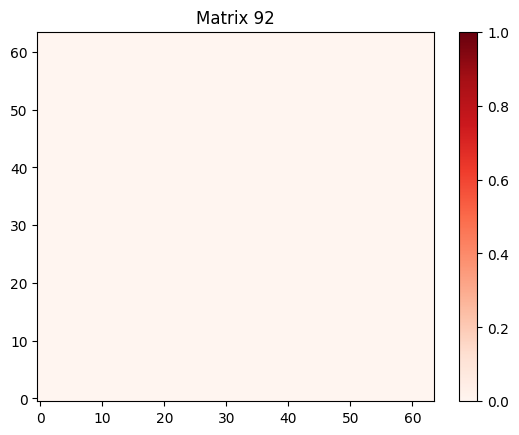

Matrix 93, values: 1.0


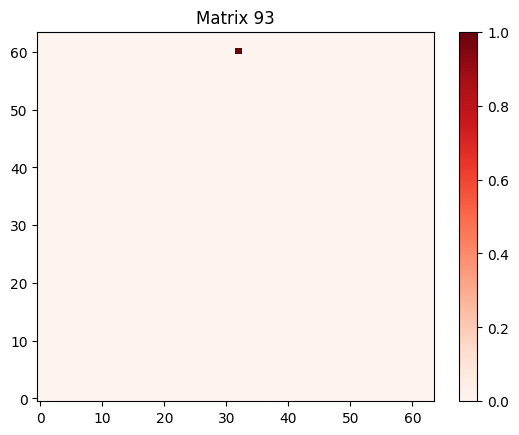

Matrix 94, values: 0.0


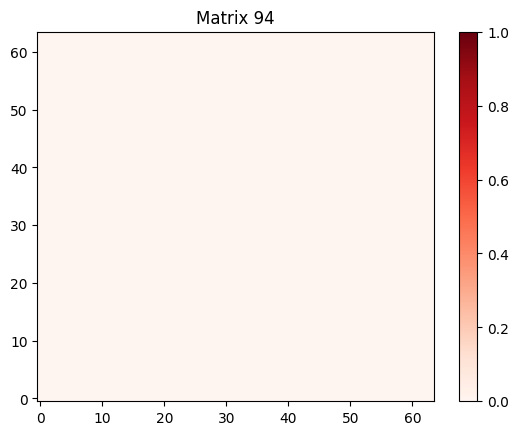

Matrix 95, values: 0.0


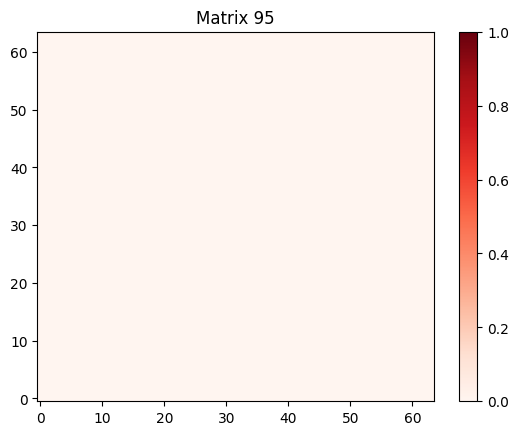

Matrix 96, values: 0.0


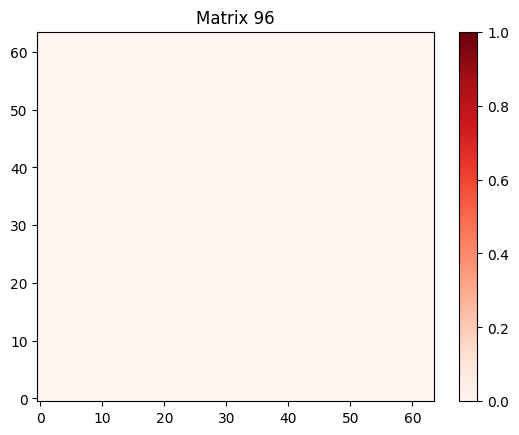

Matrix 97, values: 0.0


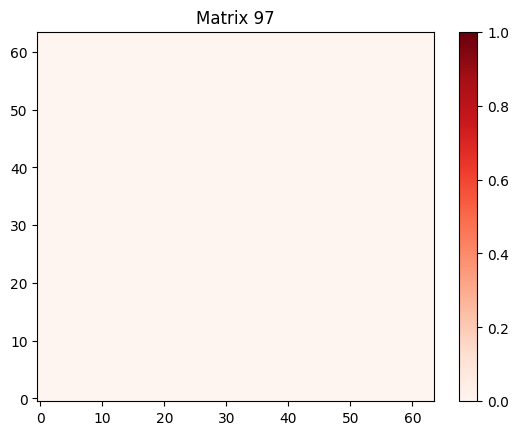

Matrix 98, values: 0.0


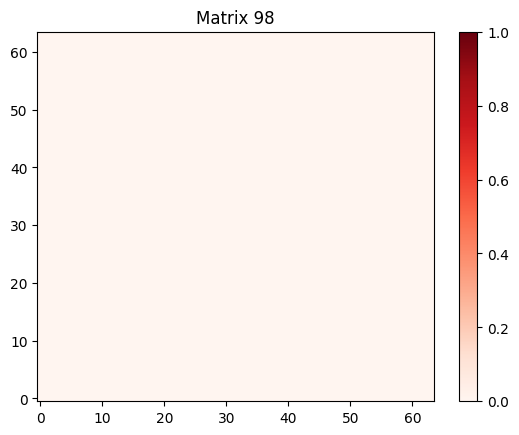

Matrix 99, values: 1.0


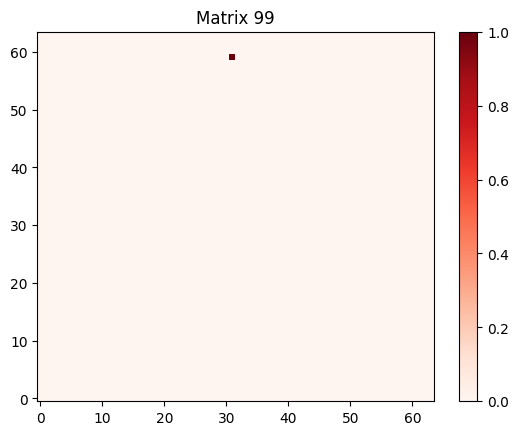

Matrix 100, values: 0.0


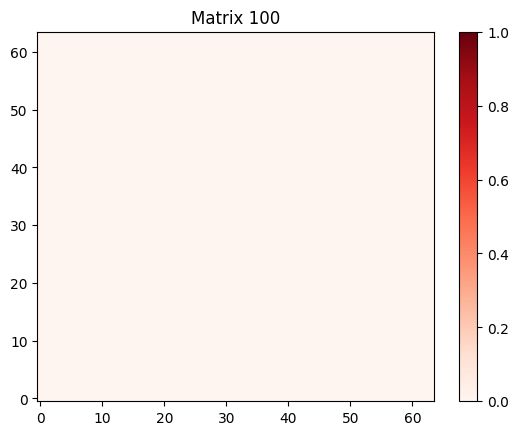

Matrix 101, values: 0.0


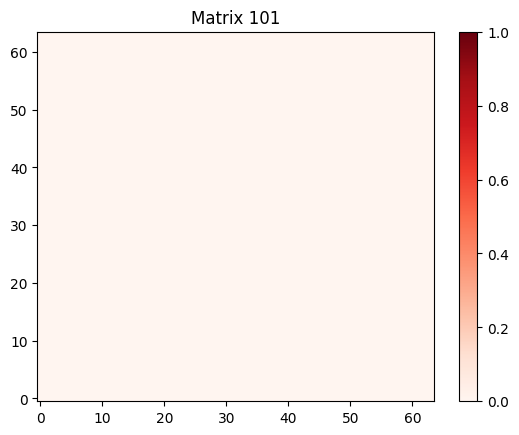

Matrix 102, values: 0.0


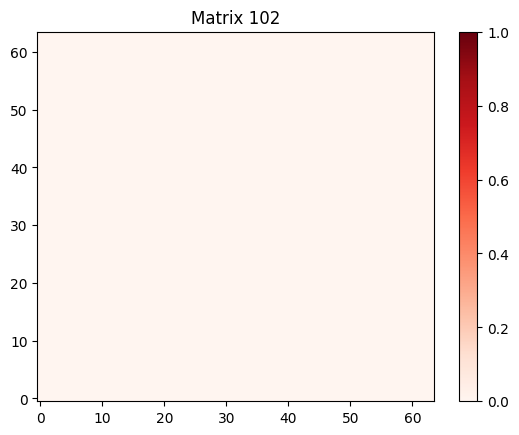

Matrix 103, values: 0.0


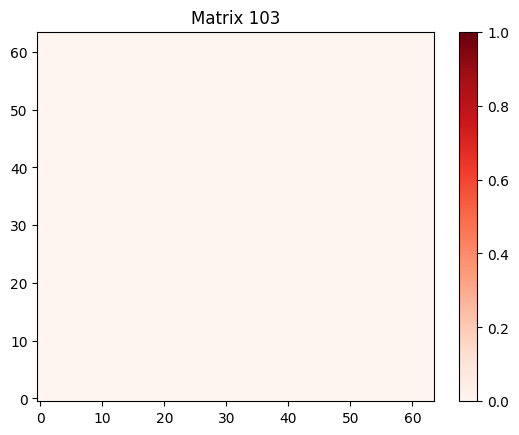

Matrix 104, values: 0.0


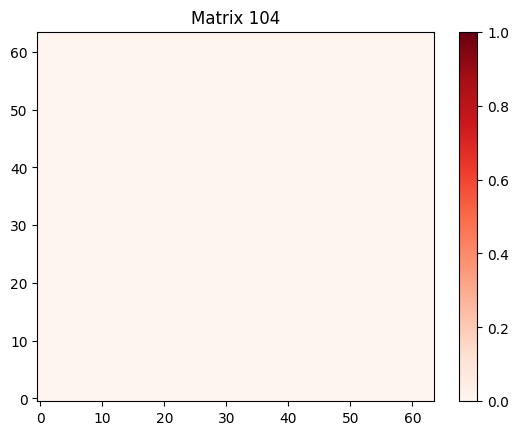

Matrix 105, values: 13.0


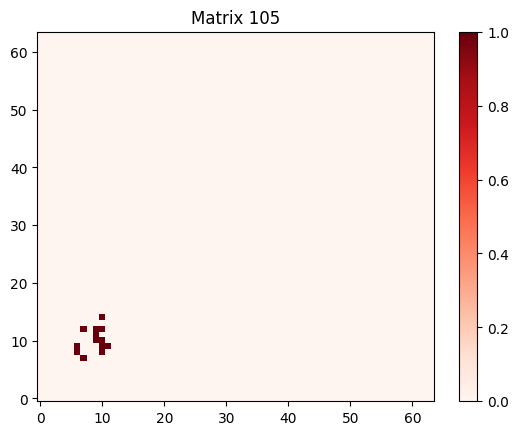

Matrix 106, values: 0.0


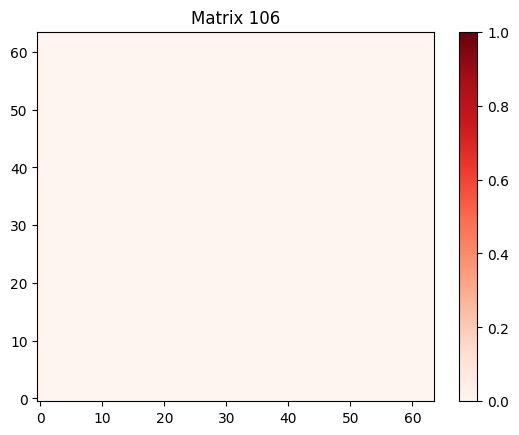

Matrix 107, values: 0.0


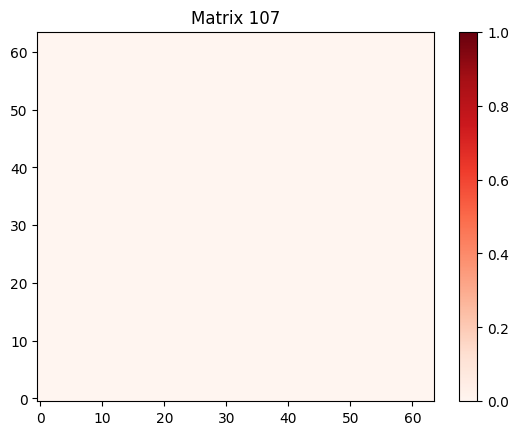

Matrix 108, values: 0.0


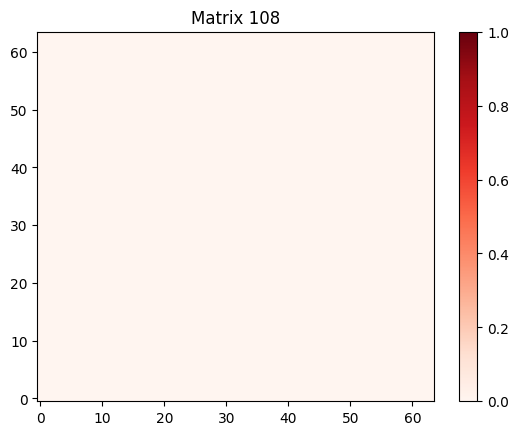

Matrix 109, values: 0.0


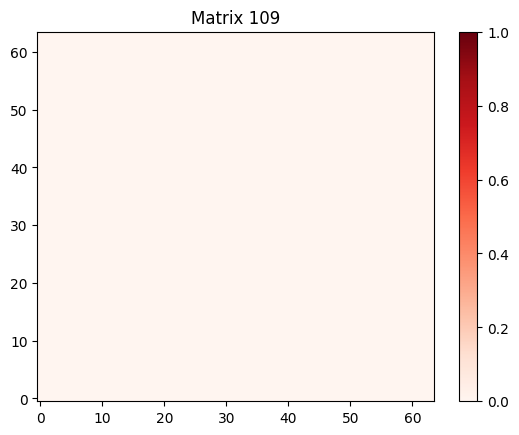

Matrix 110, values: 0.0


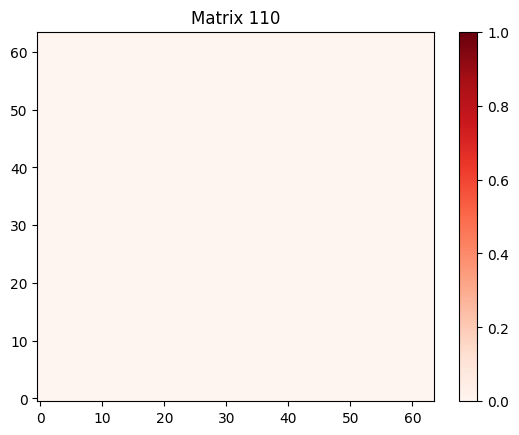

Matrix 111, values: 0.0


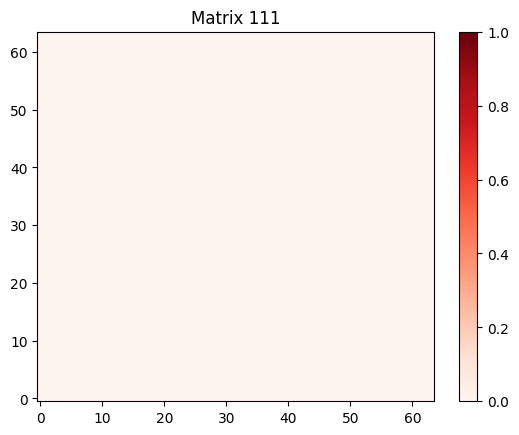

Matrix 112, values: 0.0


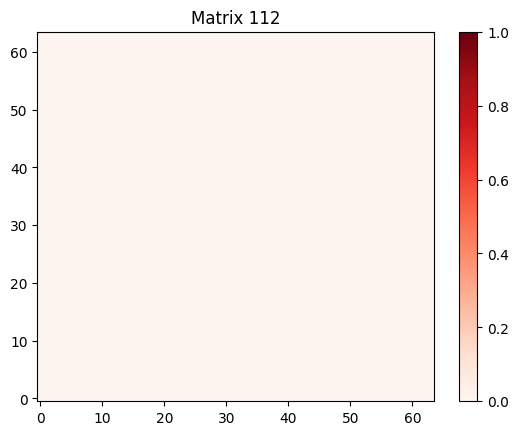

Matrix 113, values: 0.0


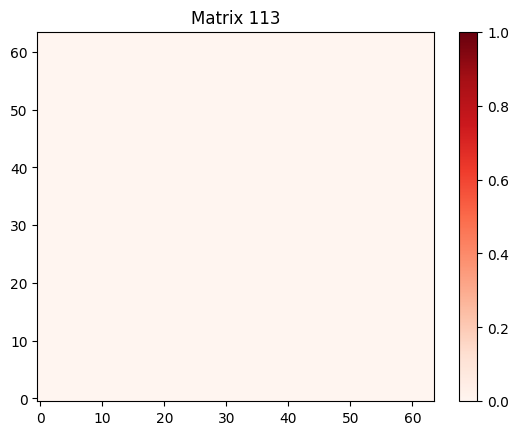

Matrix 114, values: 0.0


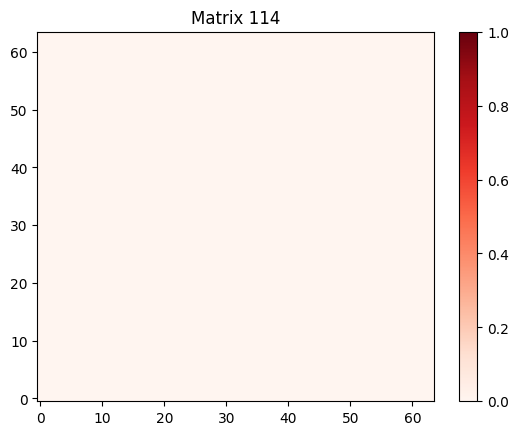

Matrix 115, values: 0.0


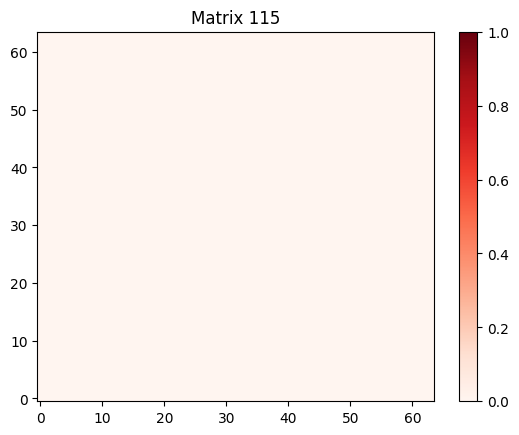

Matrix 116, values: 1.0


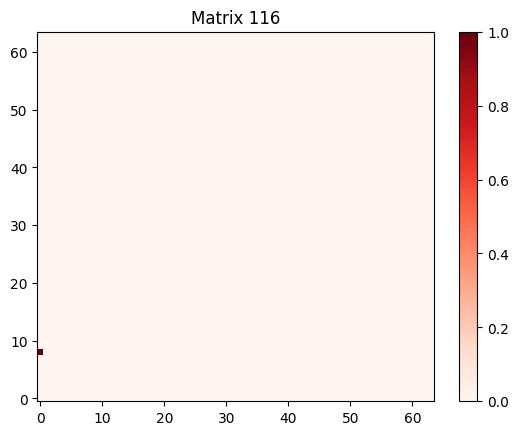

Matrix 117, values: 0.0


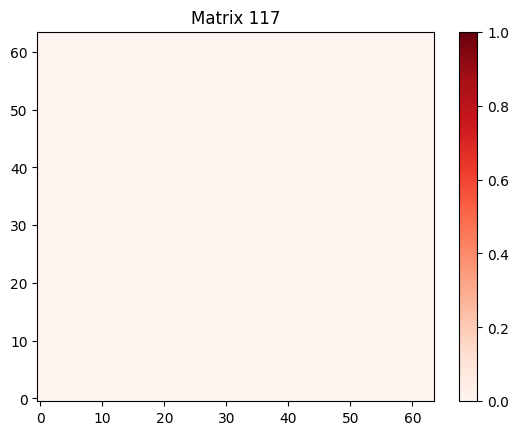

Matrix 118, values: 0.0


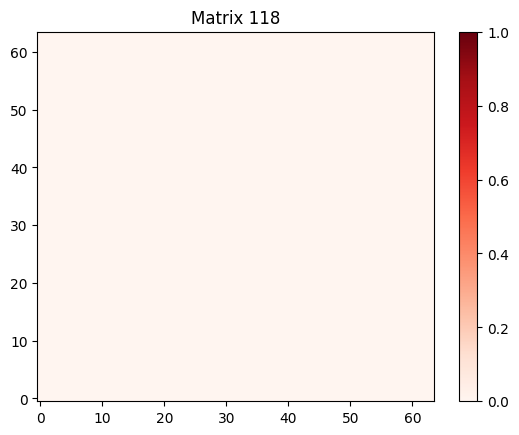

Matrix 119, values: 0.0


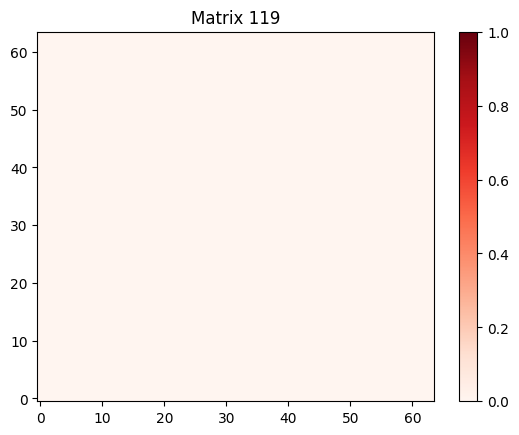

Matrix 120, values: 0.0


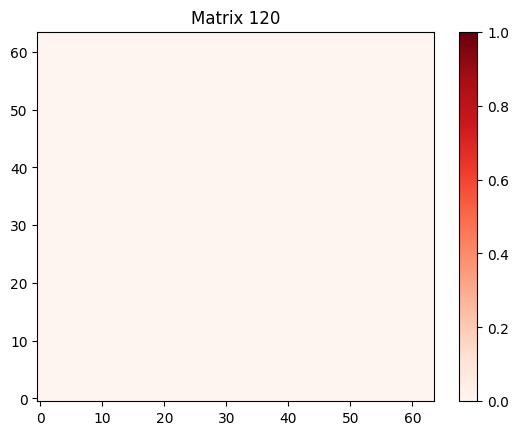

Matrix 121, values: 0.0


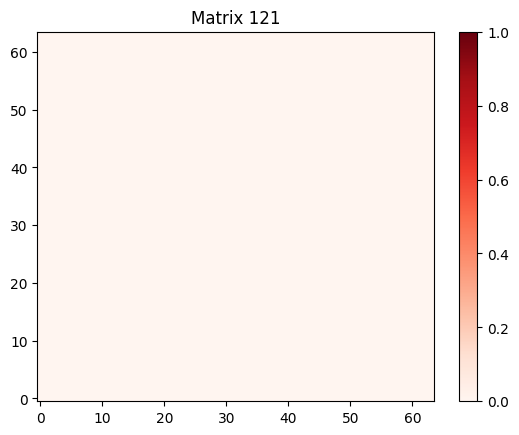

Matrix 122, values: 0.0


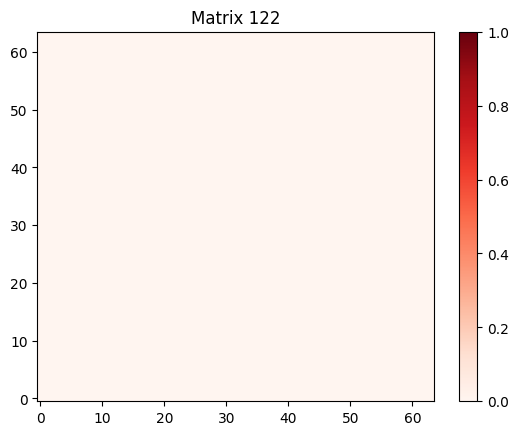

Matrix 123, values: 0.0


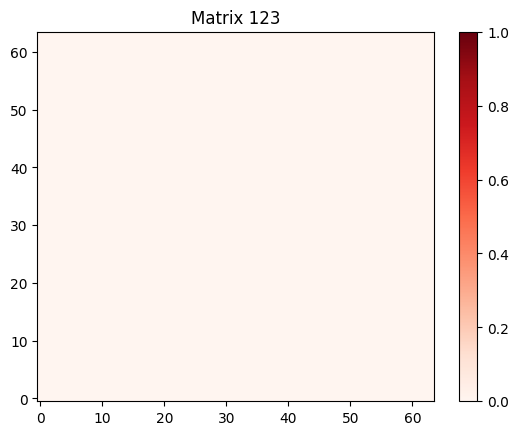

Matrix 124, values: 2.0


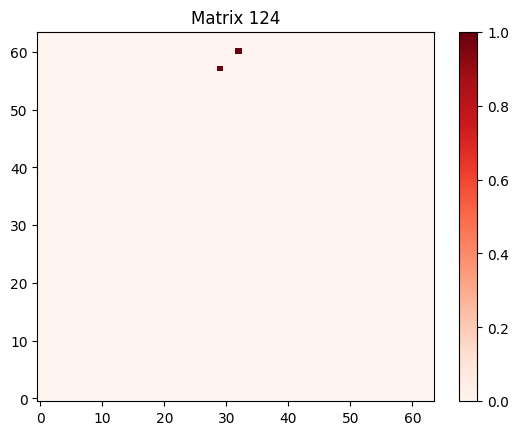

Matrix 125, values: 0.0


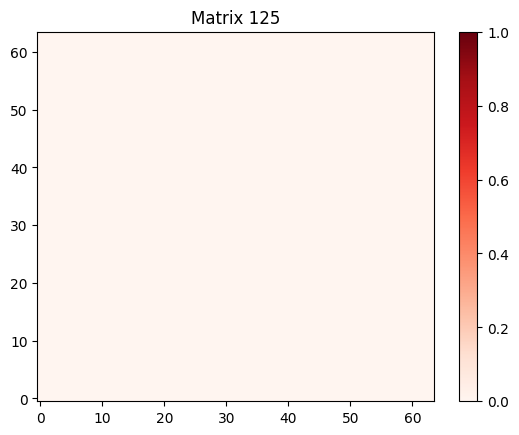

Matrix 126, values: 0.0


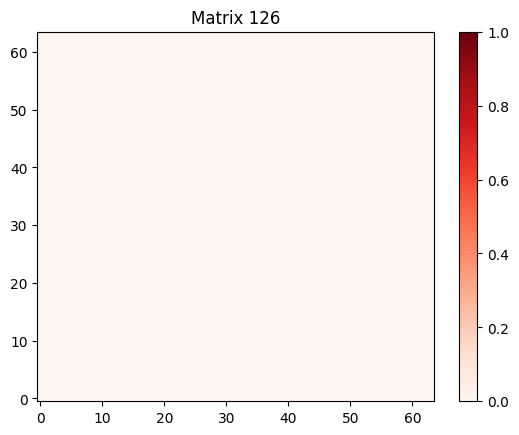

Matrix 127, values: 0.0


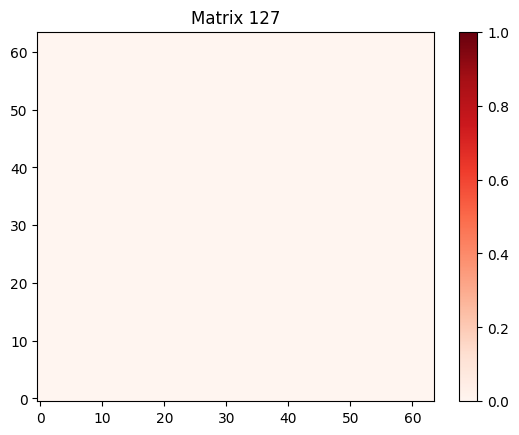

Matrix 128, values: 0.0


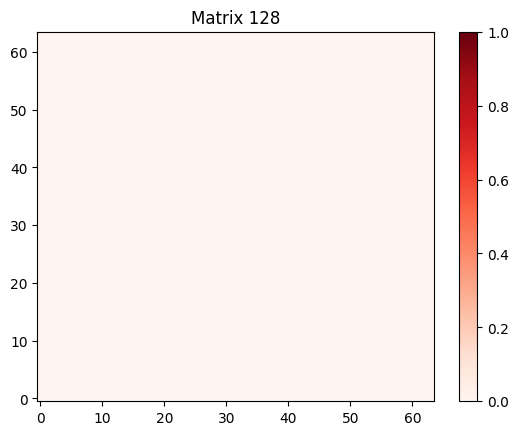

Matrix 129, values: 0.0


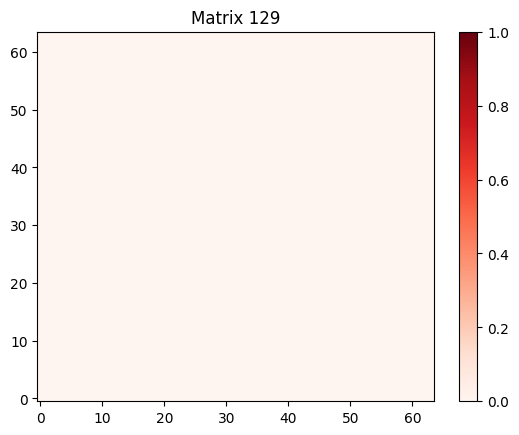

Matrix 130, values: 0.0


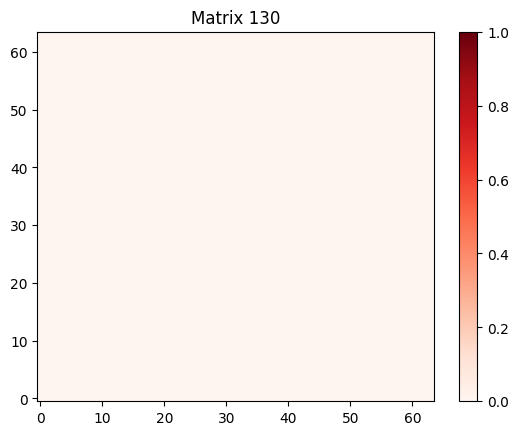

Matrix 131, values: 0.0


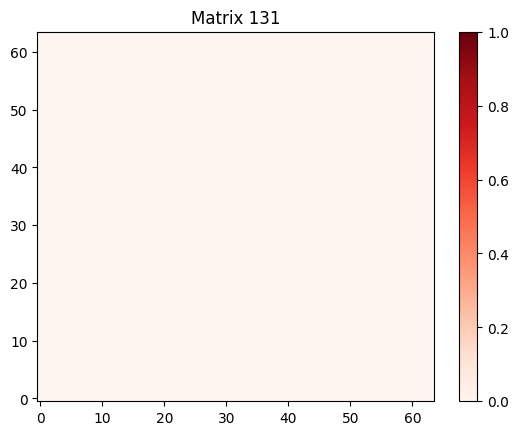

Matrix 132, values: 0.0


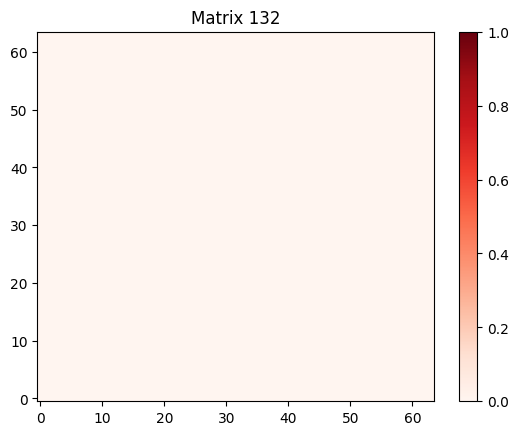

Matrix 133, values: 1.0


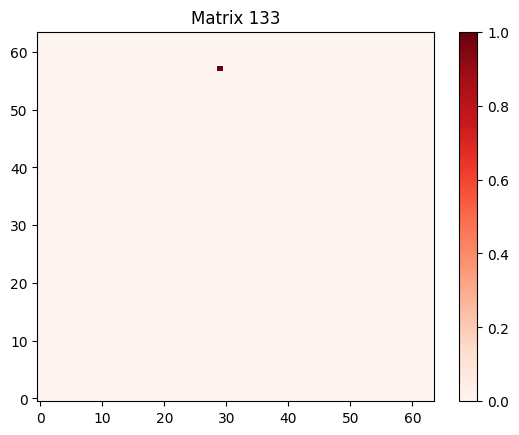

Matrix 134, values: 0.0


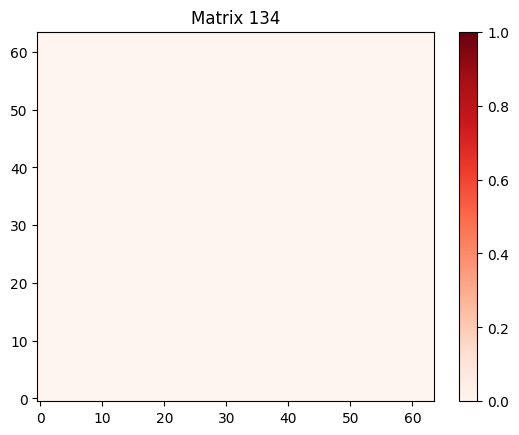

Matrix 135, values: 0.0


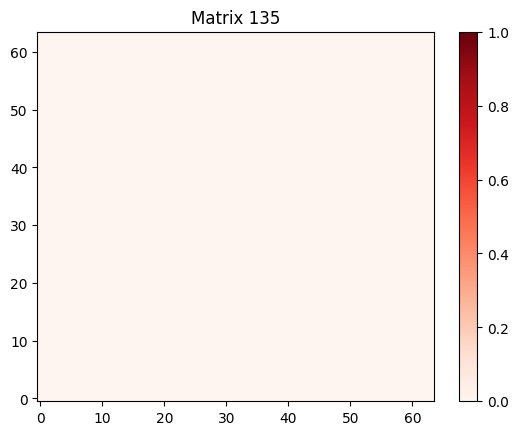

Matrix 136, values: 0.0


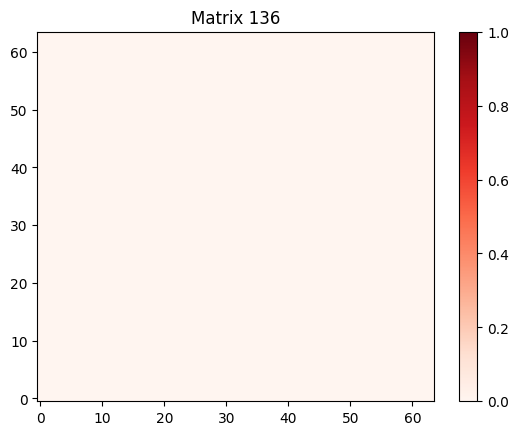

Matrix 137, values: 0.0


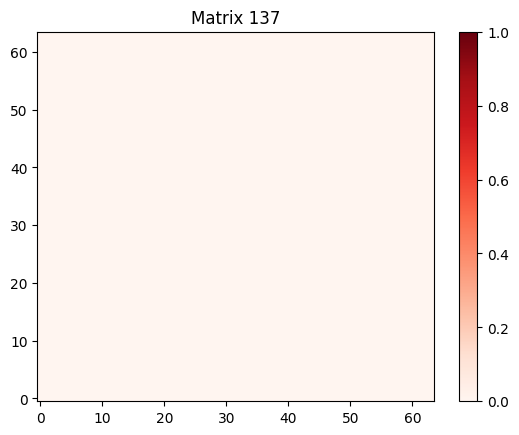

Matrix 138, values: 0.0


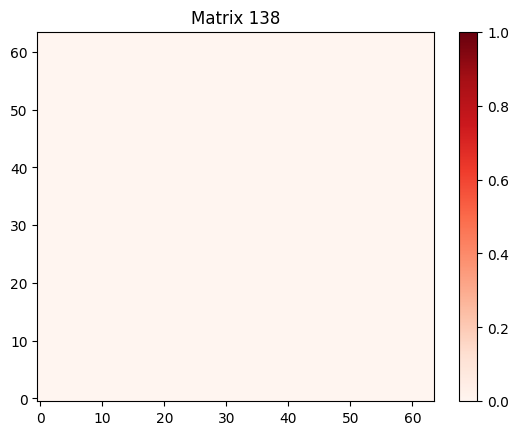

Matrix 139, values: 0.0


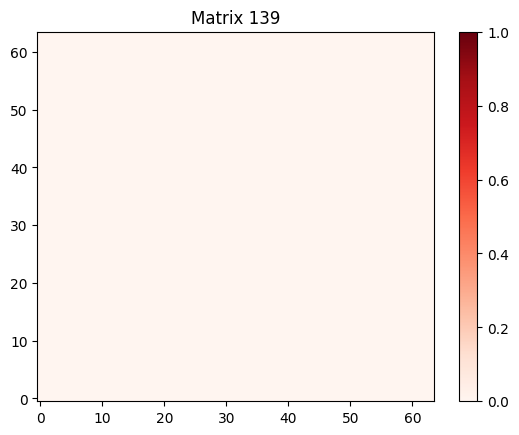

Matrix 140, values: 0.0


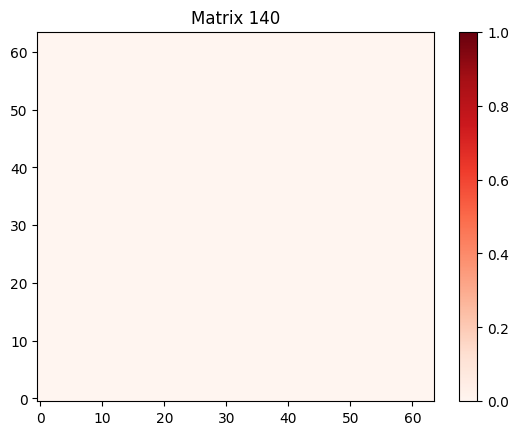

Matrix 141, values: 0.0


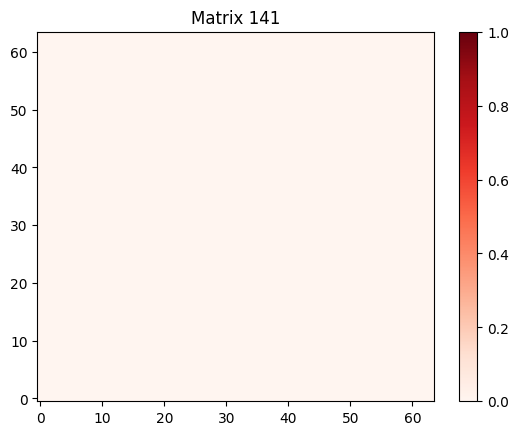

Matrix 142, values: 0.0


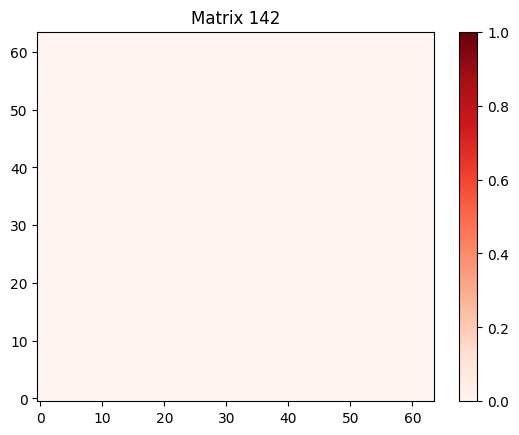

Matrix 143, values: 0.0


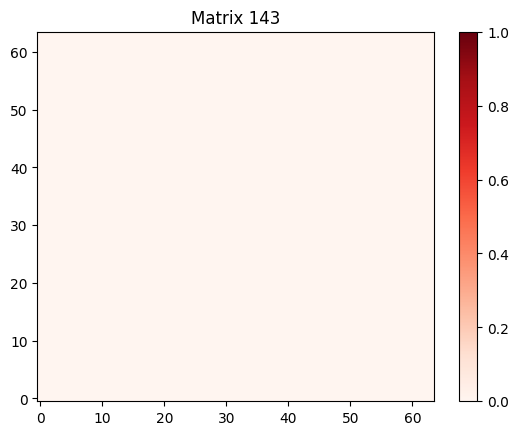

Matrix 144, values: 0.0


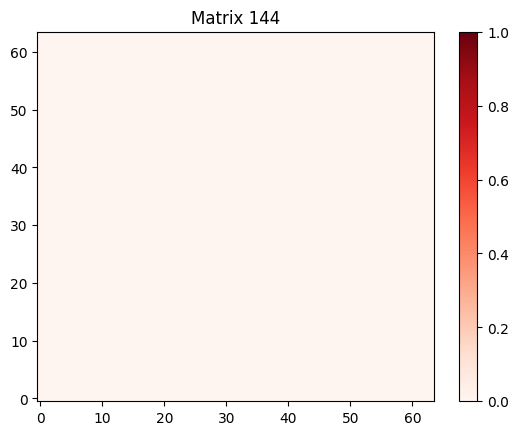

Matrix 145, values: 0.0


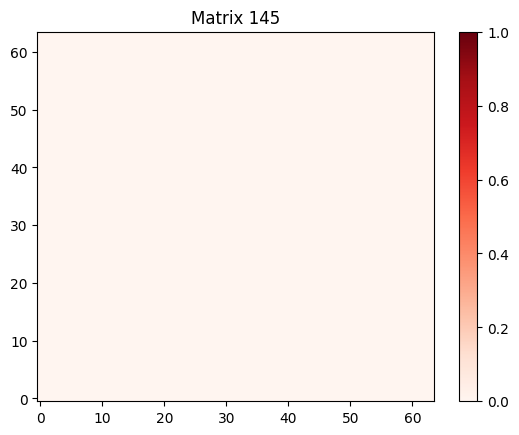

Matrix 146, values: 0.0


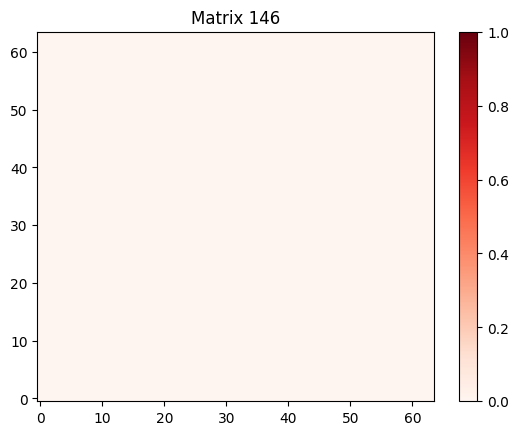

Matrix 147, values: 0.0


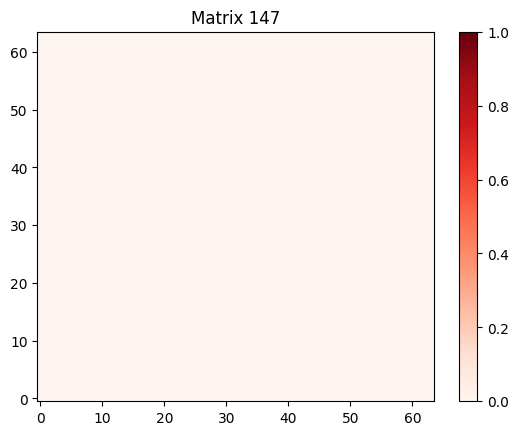

Matrix 148, values: 0.0


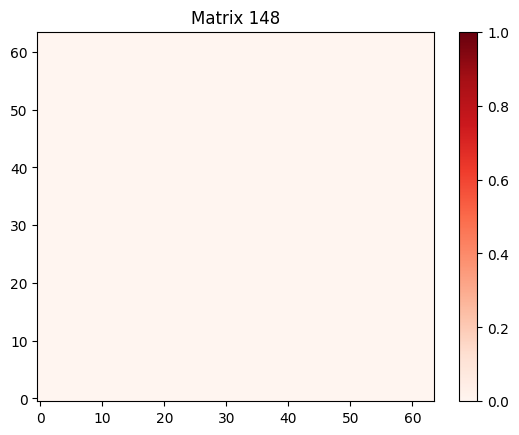

Matrix 149, values: 0.0


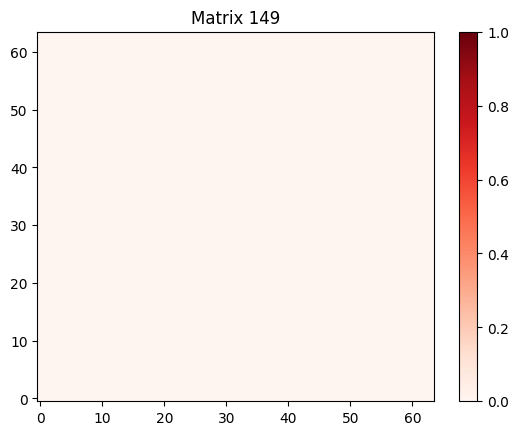

Matrix 150, values: 0.0


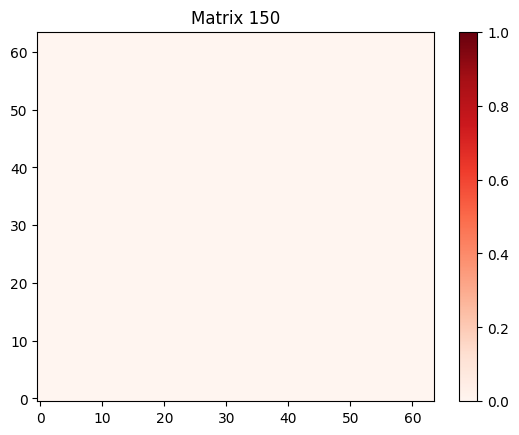

Matrix 151, values: 0.0


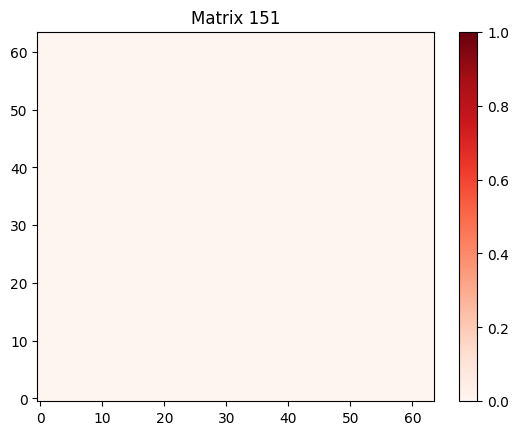

Matrix 152, values: 0.0


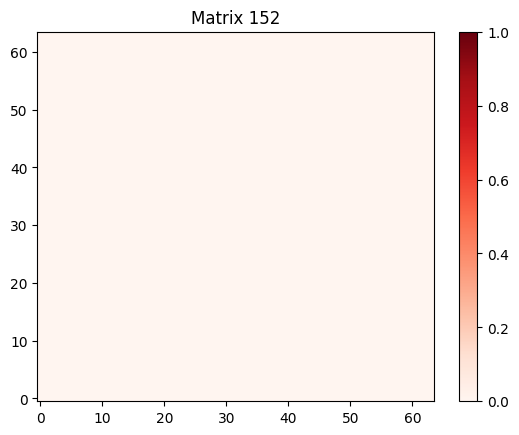

Matrix 153, values: 0.0


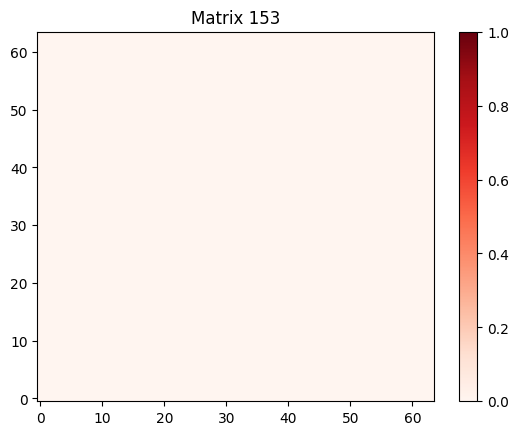

Matrix 154, values: 0.0


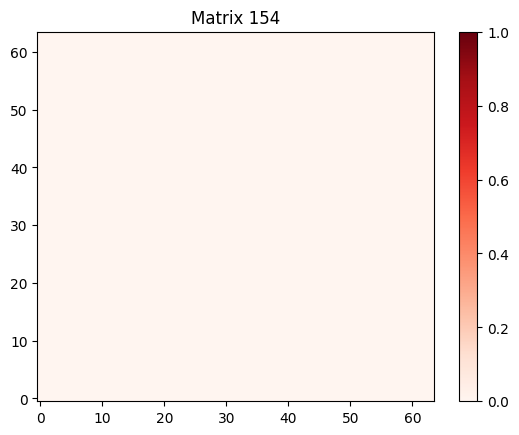

Matrix 155, values: 0.0


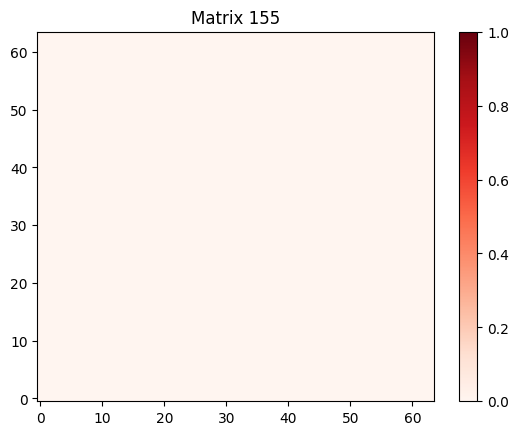

Matrix 156, values: 0.0


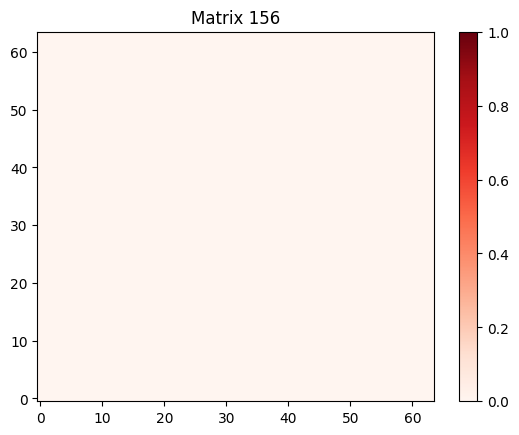

Matrix 157, values: 0.0


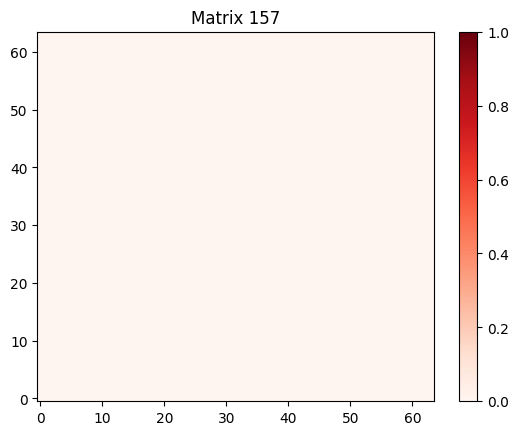

Matrix 158, values: 0.0


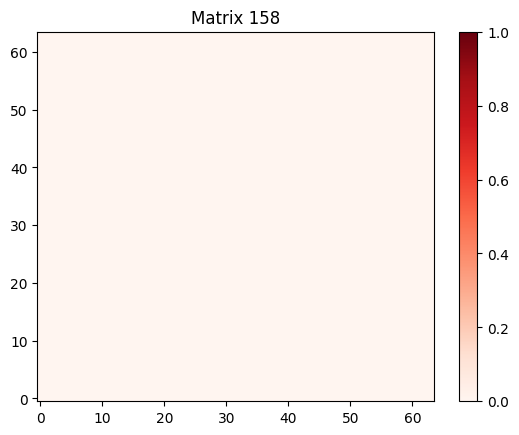

Matrix 159, values: 0.0


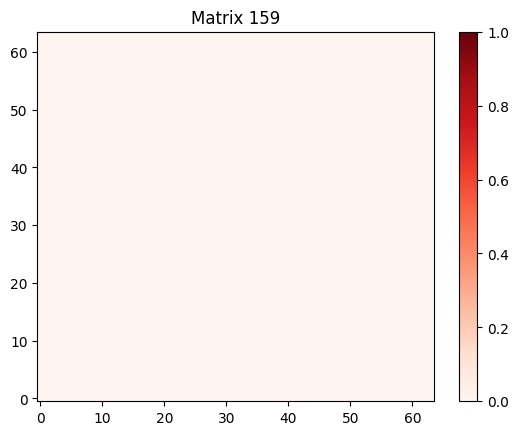

Matrix 160, values: 0.0


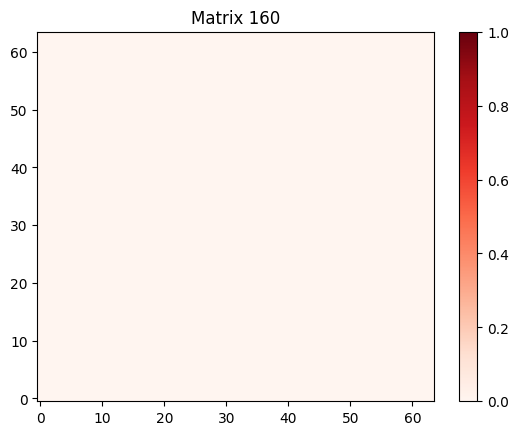

Matrix 161, values: 0.0


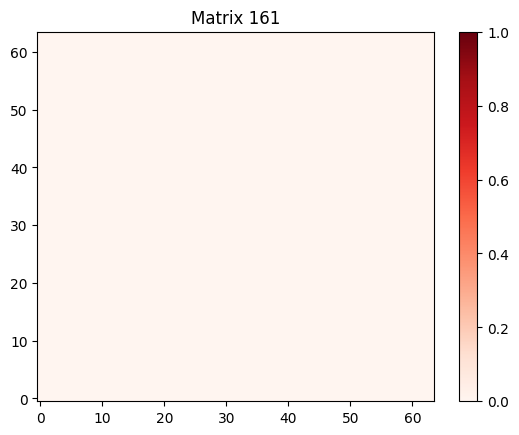

Matrix 162, values: 0.0


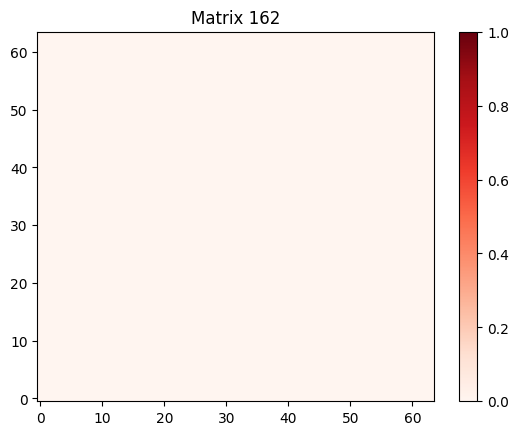

Matrix 163, values: 0.0


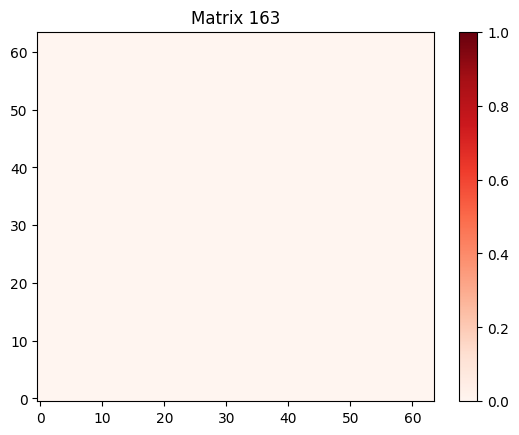

Matrix 164, values: 0.0


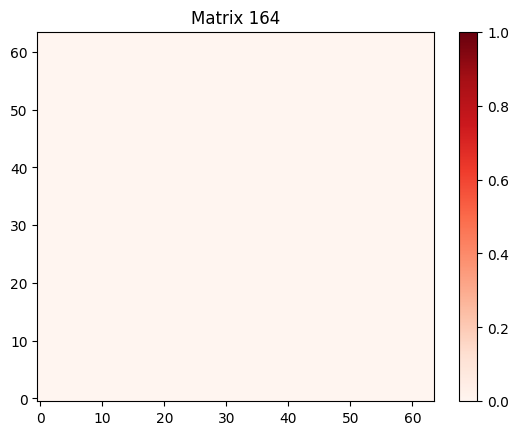

Matrix 165, values: 0.0


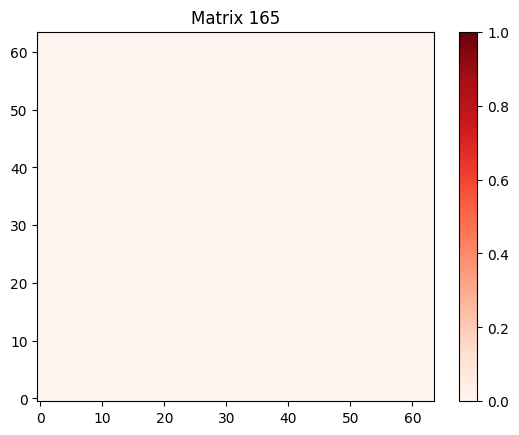

Matrix 166, values: 0.0


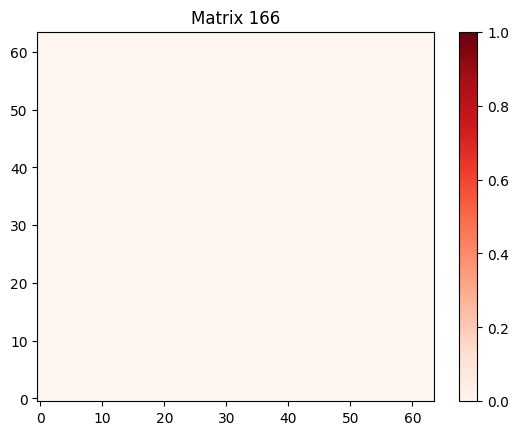

Matrix 167, values: 0.0


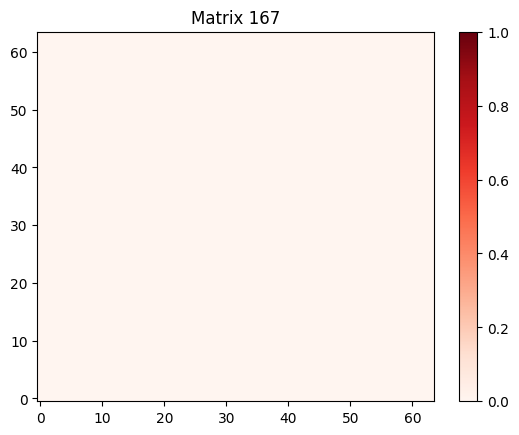

Matrix 168, values: 0.0


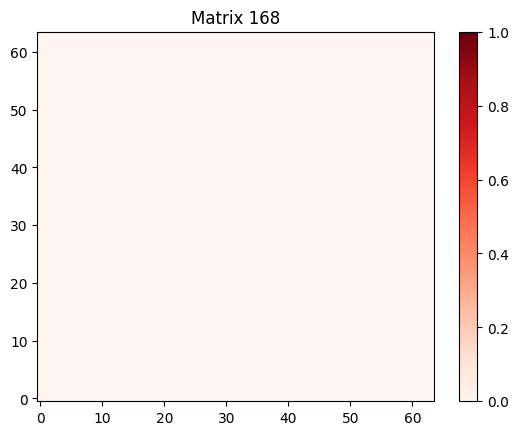

Matrix 169, values: 1.0


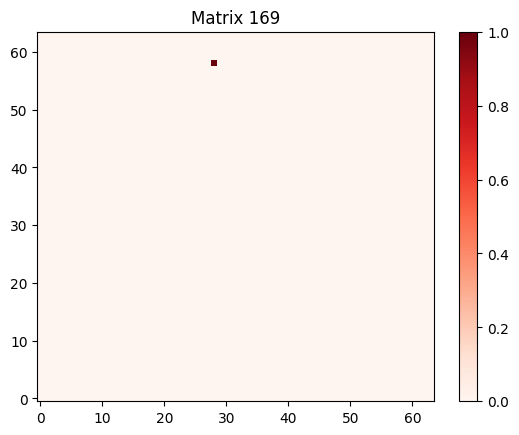

Matrix 170, values: 0.0


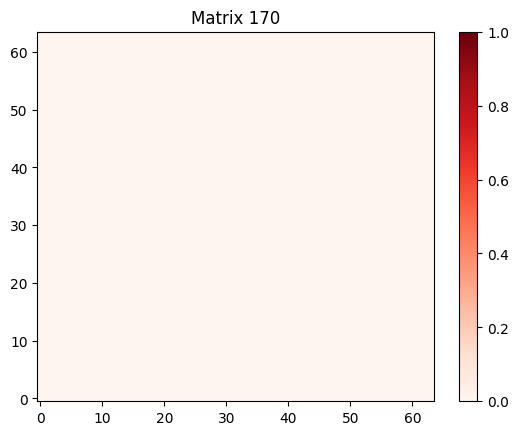

Matrix 171, values: 0.0


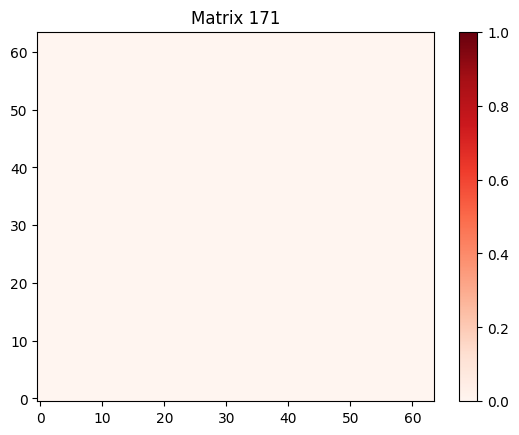

Matrix 172, values: 0.0


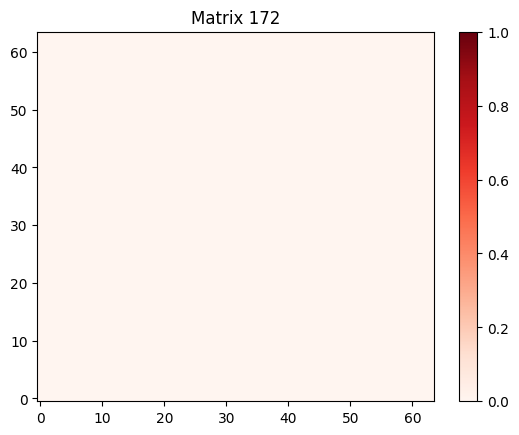

Matrix 173, values: 0.0


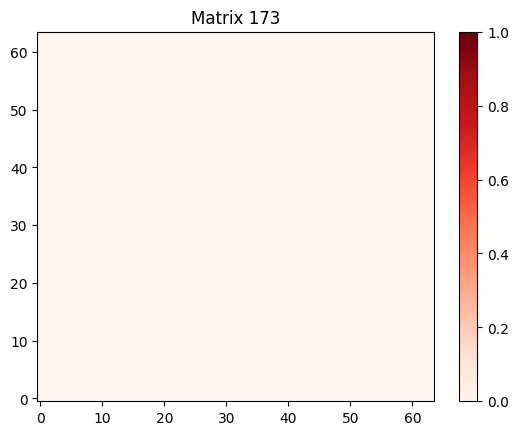

Matrix 174, values: 1.0


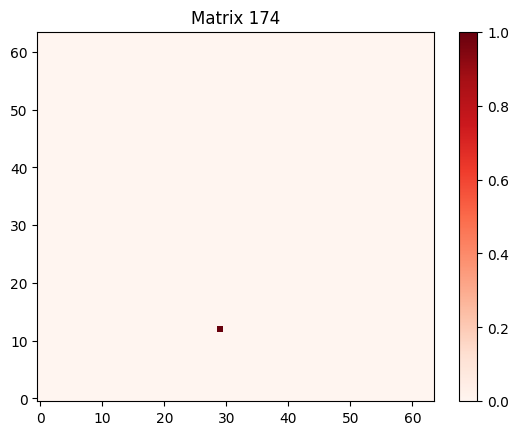

Matrix 175, values: 0.0


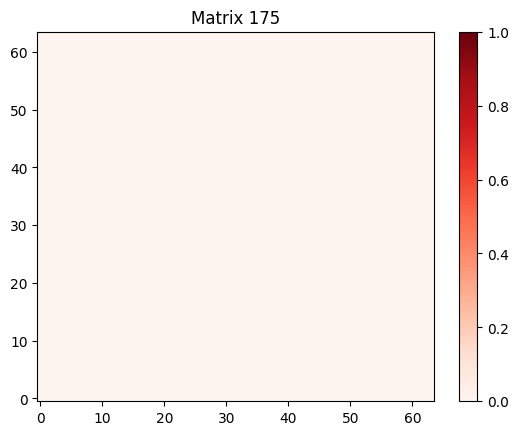

Matrix 176, values: 2.0


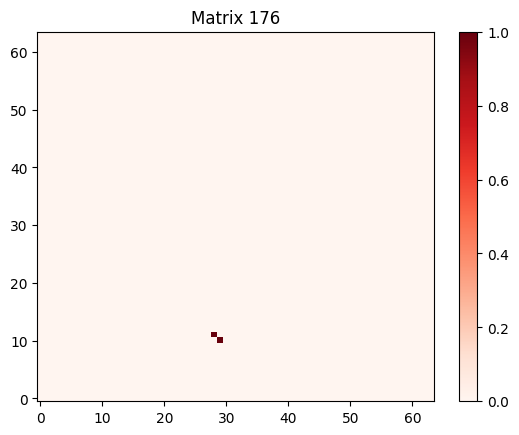

Matrix 177, values: 1.0


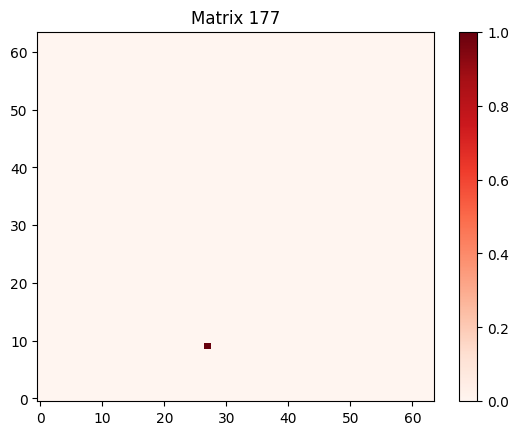

Matrix 178, values: 3.0


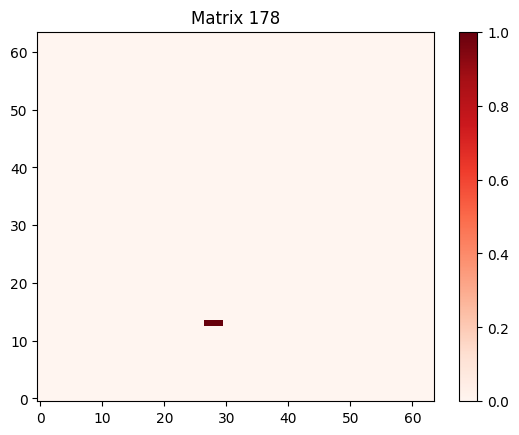

Matrix 179, values: 7.0


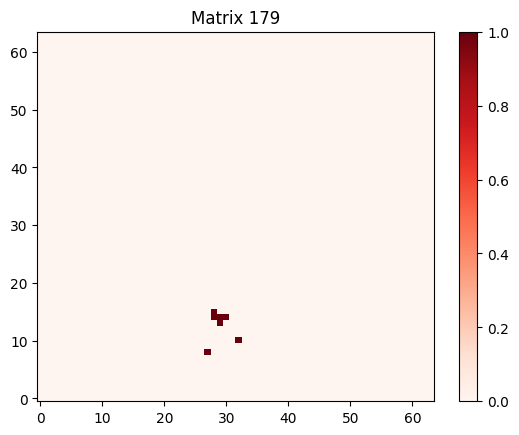

Matrix 180, values: 2.0


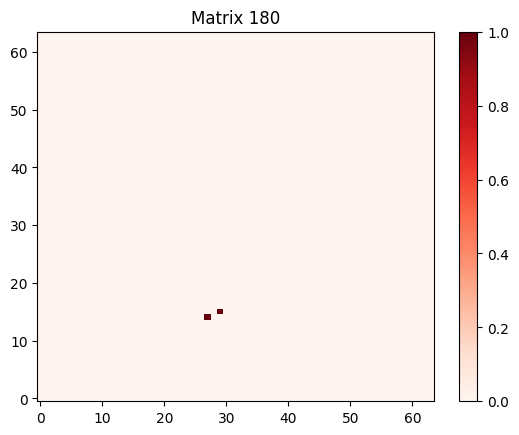

In [ ]:
# Print all the matr
for i, matrix in enumerate(matrices[-180:]):
    print(f"Matrix {i+1}, values: {matrix.sum()}")
    plt.imshow(matrix, cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(f"Matrix {i+1}")
    plt.show()



**Generation of stories**

With the images, stories of 5 (This can be modified depending on the case) sequential images are generated which will serve in some prediction model since the images have a sequence.


In [ ]:
historial=[]
for i in range(len(matrices)-4):
    historial.append([matrices[i], matrices[i+1],matrices[i+2],matrices[i+3], matrices[i+4]])
np.shape(historial)

(2761, 5, 64, 64)

**Results of the process**
In this example the following is obtained.

(2761, 5, 64, 64)

(samples, images, lines, columns)

The 2761 represents the sequences that we have, in this case there are 98.

Each sequence is made up of 5 images, normally in articles they are called frames.

Each image is 64x64 in size.

This set of images could already be used in some predictive models

**Saving the results**

In [ ]:
np.save('historial_1D', historial)

# **Construction and Training of a ConvLSTM Model for Prediction of Geotemporal Sequences**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

**The files with the matrices for training are loaded**

In [ ]:
%%time
dataset = np.load("historial_1D.npy")

CPU times: user 2.88 ms, sys: 145 ms, total: 148 ms
Wall time: 147 ms


**Form of data**

The data set consists of 2761 sequences of 5 64x64 images.*texto en cursiva*

In [ ]:
dataset.shape

(2761, 5, 64, 64)

In [ ]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape

(2761, 5, 64, 64, 1)

The data is normalized between 0 and 1 (In this example it is not necessary since the maximum possible value is 1)

80% of the data is used for training and another 20% for validation

In [ ]:
# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (2208, 4, 64, 64, 1), (2208, 4, 64, 64, 1)
Validation Dataset Shapes: (553, 4, 64, 64, 1), (553, 4, 64, 64, 1)


**Visualization of an example sequence**

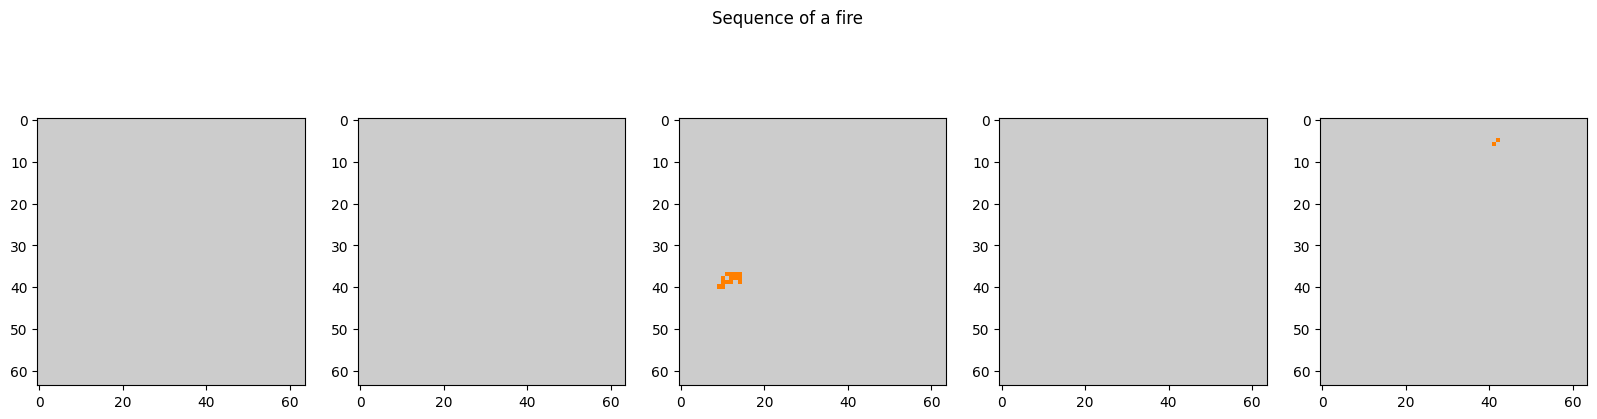

In [ ]:
import matplotlib.colors as mcolors

# Find sequences that have at least one matrix with a fire and the size of each fire
indices_with_fires = [(i, max(matrix.sum() for matrix in seq)) for i, seq in enumerate(train_dataset) if any(matrix.sum() > 0 for matrix in seq)]

# If there are no sequences with fires, terminate the script here
if not indices_with_fires:
    print("No sequences with fires.")
else:
    # Sort the sequences by the size of the largest fire in each and select the largest one
    indices_with_fires.sort(key=lambda x: x[1], reverse=True)
    data_choice, _ = indices_with_fires[0]

    # Create a custom colormap: light gray for background and orange for fire
    colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
    n_bins = 100
    cmap_name = 'custom1'
    custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Display the matrices of the selected sequence
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle('Sequence of a fire')
    for i, ax in enumerate(axes):
        ax.imshow(train_dataset[data_choice][i], cmap=custom_cmap, vmin=0, vmax=1)
    plt.show()




**Model construction**

The construction of a neural network model is designed for spatiotemporal data, likely using TensorFlow's Keras API. The model begins with an input layer that has a flexible frame size, specified as (None, *x_train.shape[2:]), meaning it can handle a batch of 5D tensors with varying time steps. Three ConvLSTM2D layers follow, each equipped with Batch Normalization. These layers are specifically tailored to handle spatiotemporal data, capturing both spatial and temporal patterns. The kernel sizes for these ConvLSTM2D layers are 5x5, 3x3, and 1x1, respectively, and each uses 64 filters. A final Conv3D layer is used to produce spatiotemporal output with a single channel. The model is then compiled using binary cross-entropy as the loss function and Adam as the optimizer.

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

**Model Summary**

The output from model.summary() describes a convolutional LSTM neural network designed for spatiotemporal data analysis. The architecture consists of an Input Layer, three ConvLSTM2D layers interspersed with two Batch Normalization layers, and a final Conv3D layer. The model is capable of handling 5D input tensors, specifically formatted as (None, None, 64, 64, 1), and it contains a total of 746,689 parameters, with 2.85 MB as its approximate size. The ConvLSTM2D layers are specialized in capturing both spatial and temporal features, while the Batch Normalization layers help stabilize the learning process.

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 64, 64, 1   0         
                             )]                                  
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 64, 64, 64   416256    
                             )                                   
                                                                 
 batch_normalization (Batch  (None, None, 64, 64, 64   256       
 Normalization)              )                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 64, 64, 64   295168    
                             )                                   
                                                                 
 batch_normalization_1 (Bat  (None, None, 64, 64, 64   256   

**The model is trained**

The code snippet is for training a machine learning model using Keras and then evaluating its performance on a validation set. The script employs early stopping and learning rate reduction as callbacks to improve training efficiency. It specifies training hyperparameters, such as the number of epochs and batch size, and then fits the model to the training data. Post-training, the script predicts labels for the validation data. These predictions are then flattened and thresholded to classify them as either 0 or 1. Finally, the precision and recall metrics are calculated using scikit-learn's functions, offering an evaluation of the model's performance on the validation set.

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

from sklearn.metrics import precision_score, recall_score

# Generate predictions for the validation set
try:
    y_val_pred = model.predict(x_val)
except Exception as e:
    print(f"Error during prediction: {e}")

# Flatten the labels and predictions to calculate precision and recall
y_val_true = y_val.flatten()
y_val_pred = y_val_pred.flatten()

# Set a threshold to classify predictions as 0 or 1
threshold = 0.5
y_val_pred = (y_val_pred > threshold).astype(int)

# Calculate precision and recall
precision = precision_score(y_val_true, y_val_pred)
recall = recall_score(y_val_true, y_val_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Epoch 1/20
442/442 [==============================] - 98s 180ms/step - loss: 0.0134 - val_loss: 9.4130e-04 - lr: 0.0010
Epoch 2/20
442/442 [==============================] - 79s 179ms/step - loss: 2.4777e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/20
442/442 [==============================] - 78s 177ms/step - loss: 2.0018e-04 - val_loss: 1.8015e-04 - lr: 0.0010
Epoch 4/20
442/442 [==============================] - 88s 199ms/step - loss: 1.1742e-04 - val_loss: 1.0353e-04 - lr: 0.0010
Epoch 5/20
442/442 [==============================] - 79s 178ms/step - loss: 8.8506e-05 - val_loss: 7.8512e-05 - lr: 0.0010
Epoch 6/20
442/442 [==============================] - 78s 177ms/step - loss: 8.0142e-05 - val_loss: 7.5239e-05 - lr: 0.0010
Epoch 7/20
442/442 [==============================] - 79s 178ms/step - loss: 7.2987e-05 - val_loss: 8.1852e-05 - lr: 0.0010
Epoch 8/20
442/442 [==============================] - 79s 179ms/step - loss: 7.1553e-05 - val_loss: 7.4233e-05 - lr: 0.0010
Epoch 9/20
442/4


The code snippet is designed to evaluate a machine learning model's performance on a validation dataset. It begins by attempting to generate predictions for the validation set x_val using the trained model. If an error occurs during this step, it will be caught and printed. Following this, both the true labels y_val and the predicted labels y_val_pred are flattened to 1D arrays. A threshold of 0.5 is then applied to classify the continuous-valued predictions as either 0 or 1. Finally, the model's performance is quantified using the precision and recall metrics, calculated from the flattened true and predicted labels. The values for precision and recall are then printed out for review.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Generate predictions for the validation set
try:
    y_val_pred = model.predict(x_val)
except Exception as e:
    print(f"Error during prediction: {e}")

# Flatten the labels and predictions to calculate precision and recall
y_val_true = y_val.flatten()
y_val_pred = y_val_pred.flatten()

# Set a threshold to classify predictions as 0 or 1
threshold = 0.5
y_val_pred = (y_val_pred > threshold).astype(int)

# Calculate precision and recall
precision = precision_score(y_val_true, y_val_pred)
recall = recall_score(y_val_true, y_val_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")


18/18 [==============================] - 4s 250ms/step
Precision: 0.9856115107913669
Recall: 0.681592039800995


# **Fire Simulation and Prediction with ConvLSTM Model**

**The model is used to predict the 5 images and is visualized. Here we need to put something to catch a fire**

The code snippet aims to simulate a more realistic sequence of a fire spreading over time on a 64x64 grid. The fire starts at the center of the grid and propagates over five time steps. Specifically, the fire is initialized at the cell (32, 32) on the grid. The fire then spreads to adjacent cells based on certain conditions. The "Propagate the fire" section uses nested loops to iterate through each cell to check if it's on fire (== 1). If it is, the fire spreads to adjacent cells within a 5x5 square centered on that cell. The spread is stochastic, controlled by a random number generator; the fire will spread to an adjacent cell only if a randomly generated number is greater than 0.5. Finally, the script uses Matplotlib to visualize the fire's growth over the five time steps.

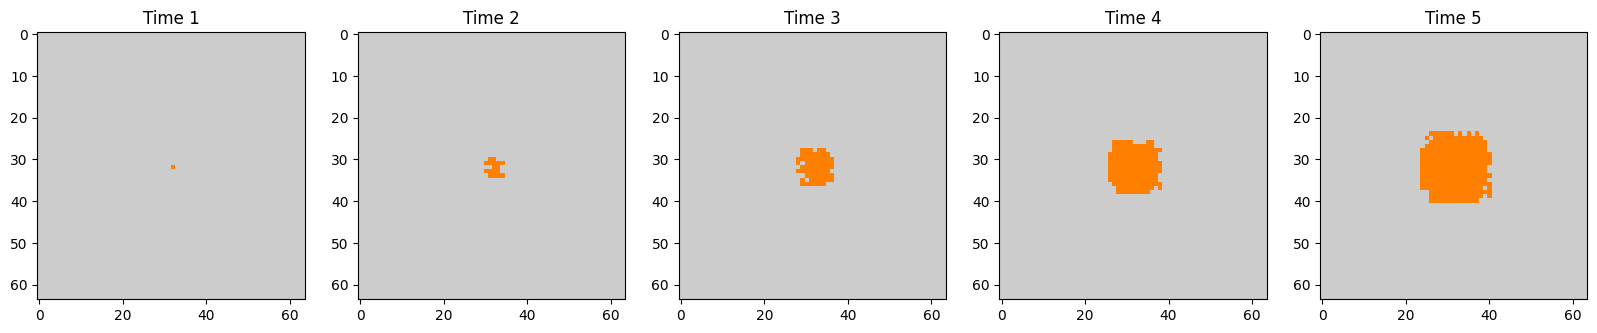

In [ ]:
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt

# Generate a more realistic fire sequence with a larger fire based on user feedback.
fire_sequence_large = np.zeros((5, 64, 64))

# Initialize the fire at the center
fire_sequence_large[0, 32, 32] = 1

# Propagate the fire
for t in range(1, 5):
    fire_sequence_large[t] = fire_sequence_large[t-1].copy()
    for i in range(64):
        for j in range(64):
            if fire_sequence_large[t-1, i, j] == 1:
                # Spread the fire to adjacent cells with some randomness
                for x in range(max(0, i-2), min(64, i+3)):
                    for y in range(max(0, j-2), min(64, j+3)):
                        if np.random.rand() > 0.5:
                            fire_sequence_large[t, x, y] = 1

# Create a custom colormap: light gray for background and orange for fire
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the sequence
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(fire_sequence_large[i], cmap=custom_cmap, vmin=0, vmax=1)
    axes[i].set_title(f"Time {i+1}")
plt.show()


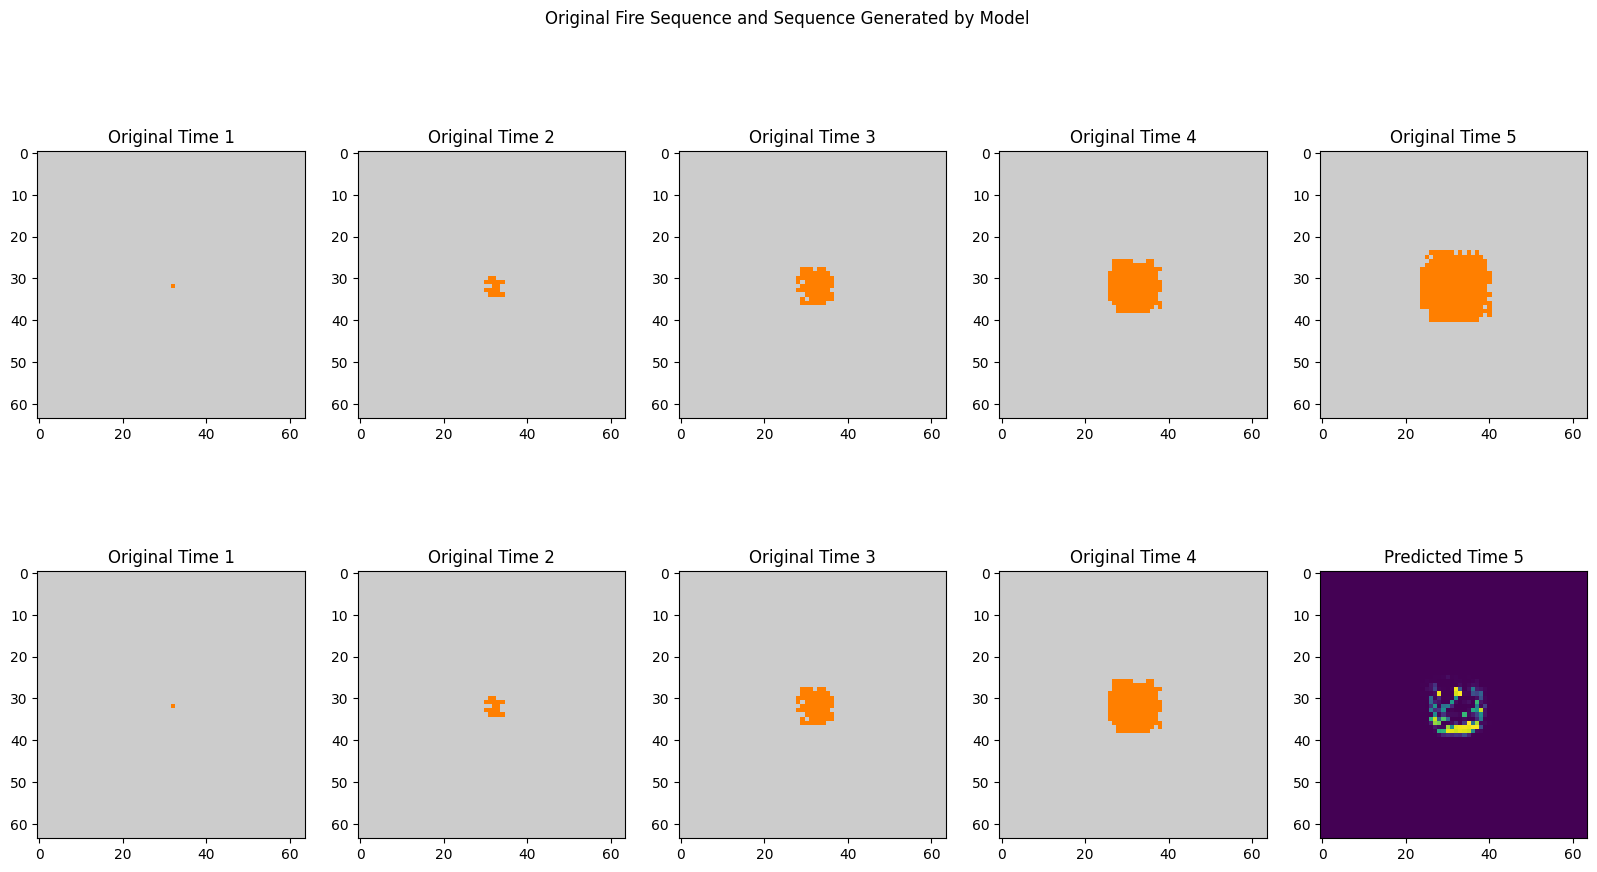

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from tensorflow import keras

# Create a custom colormap: light gray for background and orange for fire
colors = [(0.8, 0.8, 0.8), (1, 0.5, 0)]  # Light Gray to Orange
n_bins = 100
cmap_name = 'custom1'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Make sure 'fire_sequence_large' and 'model' are defined
if 'fire_sequence_large' in locals() and 'model' in locals():
    # ... (Your code for data preparation and model prediction would go here)

    # Create a new figure with custom grid layout
    fig = plt.figure(figsize=(20, 10))  # Made the figure taller
    gs = gridspec.GridSpec(2, 5)  # 2 rows and 5 columns now
    fig.suptitle('Original Fire Sequence and Sequence Generated by Model')

    # The first row for the original frames
    axes_original = [plt.subplot(gs[i]) for i in range(5)]
    for i, ax in enumerate(axes_original):
        ax.imshow(fire_sequence_large[i], cmap=custom_cmap, vmin=0, vmax=1)
        ax.set_title('Original Time {}'.format(i+1))

    # The second row for the predicted frames
    axes_predicted = [plt.subplot(gs[i+5]) for i in range(5)]
    for i, ax in enumerate(axes_predicted):
        cmap_choice = custom_cmap if i != 4 else 'viridis'
        title_choice = 'Original Time' if i != 4 else 'Predicted Time'
        ax.imshow(frames[i], cmap=cmap_choice, vmin=0, vmax=1)
        ax.set_title('{} {}'.format(title_choice, i+1))

    plt.show()
else:
    print("Variables 'fire_sequence_large' and/or 'model' are not defined.")









* In the first line is the original sequence of 5 images.
* In the second there are 4 original frames and the 5 represents the prediction that the model predicted.
* The only modification I make to the prediction is to apply a limit to define the value in each area to be 0 or 1 to be able to visualize it in a better way.
* The prediction depends on how the data has been entered, if each matrix in the sequence represents one day of data, then the prediction would be for the next day based on the previous 4 days.








